## TELECOM CHURN CASE STUDY

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate.

Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn. We will prepare various models to get best accuracy score and identify important KPIs.

### DATA UNDERSTANDING AND PREPARATION

In [301]:
## Importing Necessary libraries

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import statsmodels.api as sm


from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [33]:
## Importing provided training and test dataset

telecom = pd.read_csv('train.csv')
telecom_test = pd.read_csv('test.csv')

In [6]:
## Changing column display settings for better visibility

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

In [12]:
## Viewing imported dataset
telecom.head(3)

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014  31.277   
1            6/30/2014            7/31/2014            8/31/2014   0.000   
2            6/30/2014            7/31/2014            8/31/2014  60.806   

    arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009   7.527        48.58       124.38         1.29         32.24   
1  122.787  42.953         0.00         0.00         0.00          0.00   
2  103.176   0.000         0.53        15.93         0.00         53.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33            0.0            0.0            0.0   
1         25.99         30.89            0.0            0.0            0.0   
2         82.05          0.00            0.0            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            0.0            0.0            0.0              2.23   
1            0.0            0.0            0.0              0.00   
2            0.0            0.0            0.0              0.53   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33               0.0               0.0               0.0   
1              0.00               0.0               0.0               0.0   
2              0.00               0.0               0.0               0.0   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              1.01             18.75             80.61               0.0   
1              0.00              0.00              0.00               0.0   
2              0.00             28.94             82.05               0.0   

   std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   

   std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  \
0               0.0               0.0         65.09        204.99   
1               0.0               0.0          0.00          0.00   
2               0.0               0.0         28.94         84.99   

   std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
0          1.01           0.0           0.0           0.0          8.20   
1          0.00           0.0           0.0           0.0          0.00   
2          0.00           0.0           0.0           0.0          2.89   

   spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
0          0.63          0.00         0.38          0.0          0.0   
1         

In [10]:
## Viewing imported test dataset
telecom_test.head(3)

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58               0.0   
1            377.26              0.73              0.00               0.0   
2              0.00              0.00              0.00               0.0   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0               0.0              0.03         43.01   
1               0.0               0.0              0.00        549.86   
2               0.0               0.0              0.00          0.00   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43               6.9               0.0   
1        639.29        397.11               0.0               0.0   
2          0.00          0.00               0.0               0.0   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              2.05             42.03              7.68             26.43   
1              0.00              0.00             23.76             17.68   
2              0.00              0.00              0.00              0.00   

   std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   

   std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  \
0               0.0               0.0         48.93          7.68   
1               0.0               0.0          0.00         23.76   
2               0.0               0.0          0.00          0.00   

   std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
0         28.48           0.0           0.0           0.0           0.0   
1         17.68           0.0           0.0           0.8           0.0   
2          0.00           0.0           0.0           0.0           0.0   

   spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
0           0.0          0.03          0.0          0.0          

In [14]:
## Checking data shape
telecom.shape

(69999, 172)

In [16]:
## Checking different column data types and attributed

telecom.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

In [44]:
## Checking statistical properties of data.

telecom.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

In [35]:
## Subsetting the data into important columns which seems relevant to business need
## Here we have mostly selected all the recharge amounts, minutes of usage, different pack details used by user, revenue, aon and target variable if user churned or not.

telecom_filtered = telecom[['id','arpu_6','arpu_7','arpu_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                            'total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6',
                            'max_rech_amt_7','max_rech_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','count_rech_2g_6','count_rech_2g_7',
                            'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8',
                            'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7',
                            'vol_3g_mb_8','night_pck_user_6',	'night_pck_user_7',	'night_pck_user_8',	'monthly_2g_6',	'monthly_2g_7',	'monthly_2g_8',	'sachet_2g_6',	'sachet_2g_7',	'sachet_2g_8',	'monthly_3g_6',	'monthly_3g_7',	'monthly_3g_8',	'sachet_3g_6',	'sachet_3g_7',	'sachet_3g_8',	'fb_user_6','fb_user_7','fb_user_8','aon','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','churn_probability']]

In [37]:
## transforming test set in same way as train set.


telecom_test_filtered = telecom_test[['id','arpu_6','arpu_7','arpu_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                            'total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6',
                            'max_rech_amt_7','max_rech_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','count_rech_2g_6','count_rech_2g_7',
                            'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8',
                            'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7',
                            'vol_3g_mb_8','night_pck_user_6',	'night_pck_user_7',	'night_pck_user_8',	'monthly_2g_6',	'monthly_2g_7',	'monthly_2g_8',	'sachet_2g_6',	'sachet_2g_7',	'sachet_2g_8',	'monthly_3g_6',	'monthly_3g_7',	'monthly_3g_8',	'sachet_3g_6',	'sachet_3g_7',	'sachet_3g_8',	'fb_user_6','fb_user_7','fb_user_8','aon','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g']]

In [52]:
telecom_filtered.head(3)

id  arpu_6   arpu_7  arpu_8  total_og_mou_6  total_og_mou_7  \
0   0  31.277   87.009   7.527           81.21          221.68   
1   1   0.000  122.787  42.953            0.00           30.73   
2   2  60.806  103.176   0.000           56.49           99.36   

   total_og_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
0            3.63           11.84           53.04           40.56   
1           31.66            3.44           39.44           25.04   
2            0.00          124.29           33.83           36.64   

   total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  \
0                 3                 2                 2                77   
1                 3                 4                 5                 0   
2                 2                 4                 2                70   

   total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  \
0                65                10              65              65   
1               145                50               0             145   
2               120                 0              70              70   

   max_rech_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  \
0              10                NaN                NaN                NaN   
1              50                NaN                1.0                NaN   
2               0                NaN                NaN                NaN   

   count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  \
0              NaN              NaN              NaN              NaN   
1              NaN              0.0              NaN              NaN   
2              NaN              NaN              NaN              NaN   

   count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  \
0              NaN              NaN                 NaN                 NaN   
1              1.0              NaN                 NaN               145.0   
2              NaN              NaN                 NaN                 NaN   

   av_rech_amt_data_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  \
0                 NaN        NaN        NaN        NaN        NaN        NaN   
1                 NaN        NaN     122.07        NaN        NaN     122.08   
2                 NaN        NaN        NaN        NaN        NaN        NaN   

   arpu_2g_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  \
0        NaN          0.0         0.00          0.0          0.0         0.00   
1        NaN          0.0       352.91          0.0          0.0         3.96   
2        NaN          0.0         0.00          0.0          0.0         0.00   

   vol_3g_mb_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  \
0          0.0               NaN               NaN               NaN   
1          0.0               NaN               0.0               NaN   
2          0.0               NaN               NaN               NaN   

   monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  \
0             0             0             0            0            0   
1             0             0             0            0            0   
2             0             0             0            0            0   

   sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  \
0            0             0             0             0            0   
1            0             0             1             0            0   
2            0             0             0             0            0   

   sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  \
0            0            0        NaN        NaN        NaN  1958   
1            0            0        NaN        1.0        NaN   710   
2            0            0        NaN        NaN        NaN   882   

   aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0         0.0         0.0         0.0                  0  
1         0.0   

In [56]:
telecom_test_filtered.head(3)

id   arpu_6   arpu_7   arpu_8  total_og_mou_6  total_og_mou_7  \
0  69999   91.882   65.330   64.445           91.94           52.39   
1  70000  414.168  515.568  360.868          549.86          663.06   
2  70001  329.844  434.884  746.239            0.00            0.00   

   total_og_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
0           57.94           41.73           43.56           36.26   
1          415.59          296.33          339.64          281.66   
2            0.00            0.00            0.00            0.00   

   total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  \
0                 5                 5                 4               103   
1                 5                 4                 5               500   
2                 6                 9                 5               500   

   total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  \
0                90                60              50              30   
1               500               500             250             250   
2              1000              1000             300             500   

   max_rech_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  \
0              30                NaN                NaN                NaN   
1             250                NaN                NaN                NaN   
2             500                NaN                NaN                NaN   

   count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  \
0              NaN              NaN              NaN              NaN   
1              NaN              NaN              NaN              NaN   
2              NaN              NaN              NaN              NaN   

   count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  \
0              NaN              NaN                 NaN                 NaN   
1              NaN              NaN                 NaN                 NaN   
2              NaN              NaN                 NaN                 NaN   

   av_rech_amt_data_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  \
0                 NaN        NaN        NaN        NaN        NaN        NaN   
1                 NaN        NaN        NaN        NaN        NaN        NaN   
2                 NaN        NaN        NaN        NaN        NaN        NaN   

   arpu_2g_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  \
0        NaN          0.0          0.0          0.0          0.0          0.0   
1        NaN          0.0          0.0          0.0          0.0          0.0   
2        NaN          0.0          0.0          0.0          0.0          0.0   

   vol_3g_mb_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  \
0          0.0               NaN               NaN               NaN   
1          0.0               NaN               NaN               NaN   
2          0.0               NaN               NaN               NaN   

   monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  \
0             0             0             0            0            0   
1             0             0             0            0            0   
2             0             0             0            0            0   

   sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  \
0            0             0             0             0            0   
1            0             0             0             0            0   
2            0             0             0             0            0   

   sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  \
0            0            0        NaN        NaN        NaN  1692   
1            0            0        NaN        NaN        NaN  2533   
2            0            0        NaN        NaN        NaN   277   

   aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        0.00        0.00        0.00  
1        0.00        0.00        0.00

In [22]:
print(telecom_filtered.shape)
print(telecom_test_filtered.shape)

(69999, 66)
(30000, 65)


In [ ]:
## Test set doesn't have target variable churn probablity, hence it has columns one less that that of train.

#### HANDELLING MISSING VALUE

In [60]:
## Checing for null percentage in train set

100*telecom_filtered.isnull().mean()

id                     0.000000
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
total_og_mou_6         0.000000
total_og_mou_7         0.000000
total_og_mou_8         0.000000
total_ic_mou_6         0.000000
total_ic_mou_7         0.000000
total_ic_mou_8         0.000000
total_rech_num_6       0.000000
total_rech_num_7       0.000000
total_rech_num_8       0.000000
total_rech_amt_6       0.000000
total_rech_amt_7       0.000000
total_rech_amt_8       0.000000
max_rech_amt_6         0.000000
max_rech_amt_7         0.000000
max_rech_amt_8         0.000000
total_rech_data_6     74.902499
total_rech_data_7     74.478207
total_rech_data_8     73.689624
count_rech_2g_6       74.902499
count_rech_2g_7       74.478207
count_rech_2g_8       73.689624
count_rech_3g_6       74.902499
count_rech_3g_7       74.478207
count_rech_3g_8       73.689624
av_rech_amt_data_6    74.902499
av_rech_amt_data_7    74.478207
av_rech_amt_data_8    73.689624
arpu_3g_

In [64]:
## Checking for null percentage in test set

100*telecom_test_filtered.isnull().mean()

id                     0.000000
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
total_og_mou_6         0.000000
total_og_mou_7         0.000000
total_og_mou_8         0.000000
total_ic_mou_6         0.000000
total_ic_mou_7         0.000000
total_ic_mou_8         0.000000
total_rech_num_6       0.000000
total_rech_num_7       0.000000
total_rech_num_8       0.000000
total_rech_amt_6       0.000000
total_rech_amt_7       0.000000
total_rech_amt_8       0.000000
max_rech_amt_6         0.000000
max_rech_amt_7         0.000000
max_rech_amt_8         0.000000
total_rech_data_6     74.716667
total_rech_data_7     74.313333
total_rech_data_8     73.593333
count_rech_2g_6       74.716667
count_rech_2g_7       74.313333
count_rech_2g_8       73.593333
count_rech_3g_6       74.716667
count_rech_3g_7       74.313333
count_rech_3g_8       73.593333
av_rech_amt_data_6    74.716667
av_rech_amt_data_7    74.313333
av_rech_amt_data_8    73.593333
arpu_3g_

In [ ]:
## We can see both train and test set has some columns with more than 70% missing values.
## hence dropping these columns

In [39]:
## Dropping columns with less than 30% non missing values from train set.

telecom_filtered = telecom_filtered.dropna(axis=1,thresh=len(telecom_filtered)*0.3)

In [43]:
## Dropping columns with less than 30% non missing values from test set.

telecom_test_filtered = telecom_test_filtered.dropna(axis=1,thresh=len(telecom_test_filtered)*0.3)

In [45]:
100*telecom_filtered.isnull().mean()

id                   0.0
arpu_6               0.0
arpu_7               0.0
arpu_8               0.0
total_og_mou_6       0.0
total_og_mou_7       0.0
total_og_mou_8       0.0
total_ic_mou_6       0.0
total_ic_mou_7       0.0
total_ic_mou_8       0.0
total_rech_num_6     0.0
total_rech_num_7     0.0
total_rech_num_8     0.0
total_rech_amt_6     0.0
total_rech_amt_7     0.0
total_rech_amt_8     0.0
max_rech_amt_6       0.0
max_rech_amt_7       0.0
max_rech_amt_8       0.0
vol_2g_mb_6          0.0
vol_2g_mb_7          0.0
vol_2g_mb_8          0.0
vol_3g_mb_6          0.0
vol_3g_mb_7          0.0
vol_3g_mb_8          0.0
monthly_2g_6         0.0
monthly_2g_7         0.0
monthly_2g_8         0.0
sachet_2g_6          0.0
sachet_2g_7          0.0
sachet_2g_8          0.0
monthly_3g_6         0.0
monthly_3g_7         0.0
monthly_3g_8         0.0
sachet_3g_6          0.0
sachet_3g_7          0.0
sachet_3g_8          0.0
aon                  0.0
aug_vbc_3g           0.0
jul_vbc_3g           0.0


In [47]:
100*telecom_test_filtered.isnull().mean()

id                  0.0
arpu_6              0.0
arpu_7              0.0
arpu_8              0.0
total_og_mou_6      0.0
total_og_mou_7      0.0
total_og_mou_8      0.0
total_ic_mou_6      0.0
total_ic_mou_7      0.0
total_ic_mou_8      0.0
total_rech_num_6    0.0
total_rech_num_7    0.0
total_rech_num_8    0.0
total_rech_amt_6    0.0
total_rech_amt_7    0.0
total_rech_amt_8    0.0
max_rech_amt_6      0.0
max_rech_amt_7      0.0
max_rech_amt_8      0.0
vol_2g_mb_6         0.0
vol_2g_mb_7         0.0
vol_2g_mb_8         0.0
vol_3g_mb_6         0.0
vol_3g_mb_7         0.0
vol_3g_mb_8         0.0
monthly_2g_6        0.0
monthly_2g_7        0.0
monthly_2g_8        0.0
sachet_2g_6         0.0
sachet_2g_7         0.0
sachet_2g_8         0.0
monthly_3g_6        0.0
monthly_3g_7        0.0
monthly_3g_8        0.0
sachet_3g_6         0.0
sachet_3g_7         0.0
sachet_3g_8         0.0
aon                 0.0
aug_vbc_3g          0.0
jul_vbc_3g          0.0
jun_vbc_3g          0.0
dtype: float64

In [75]:
## We can see there are no more null values now in train or test set.

In [49]:
## We have filtered our data to 41 predictor variables now.

print(telecom_filtered.shape)
print(telecom_test_filtered.shape)

(69999, 42)
(30000, 41)


#### PERFORMING EDA & OUTLIER TREATMENT

In [96]:
## creating a dataset for visualization purpose named telecom_vis.
telecom_vis = telecom_filtered.drop(['id'], axis=1)

Text(0.5, 1.0, 'Pie Plot : Churn')

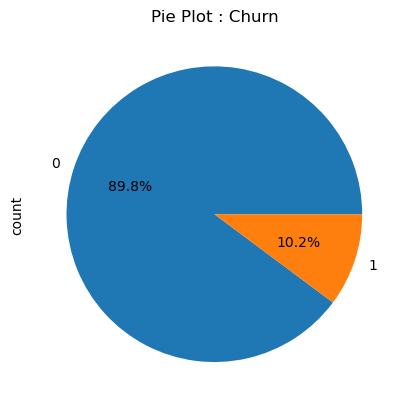

In [98]:
telecom_vis.churn_probability.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Plot : Churn')

We have 10% churn cases in our data, 90% are non churn.

In [106]:
telecom_vis.dtypes

arpu_6               float64
arpu_7               float64
arpu_8               float64
total_og_mou_6       float64
total_og_mou_7       float64
total_og_mou_8       float64
total_ic_mou_6       float64
total_ic_mou_7       float64
total_ic_mou_8       float64
total_rech_num_6       int64
total_rech_num_7       int64
total_rech_num_8       int64
total_rech_amt_6       int64
total_rech_amt_7       int64
total_rech_amt_8       int64
max_rech_amt_6         int64
max_rech_amt_7         int64
max_rech_amt_8         int64
vol_2g_mb_6          float64
vol_2g_mb_7          float64
vol_2g_mb_8          float64
vol_3g_mb_6          float64
vol_3g_mb_7          float64
vol_3g_mb_8          float64
monthly_2g_6           int64
monthly_2g_7           int64
monthly_2g_8           int64
sachet_2g_6            int64
sachet_2g_7            int64
sachet_2g_8            int64
monthly_3g_6           int64
monthly_3g_7           int64
monthly_3g_8           int64
sachet_3g_6            int64
sachet_3g_7   

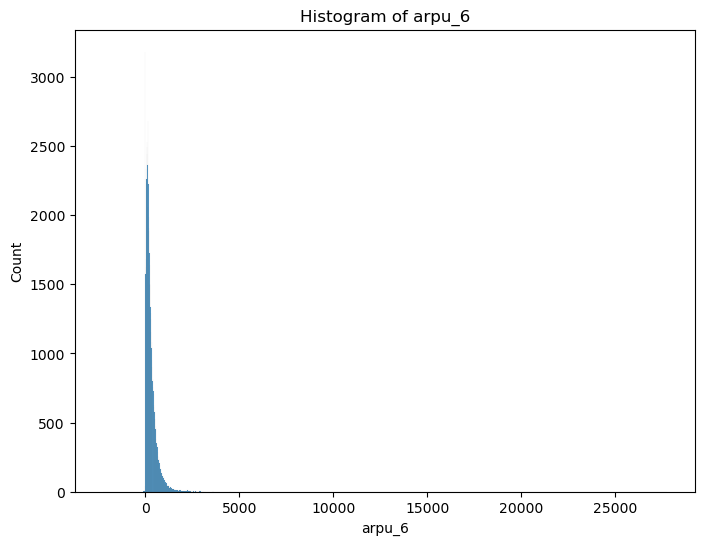

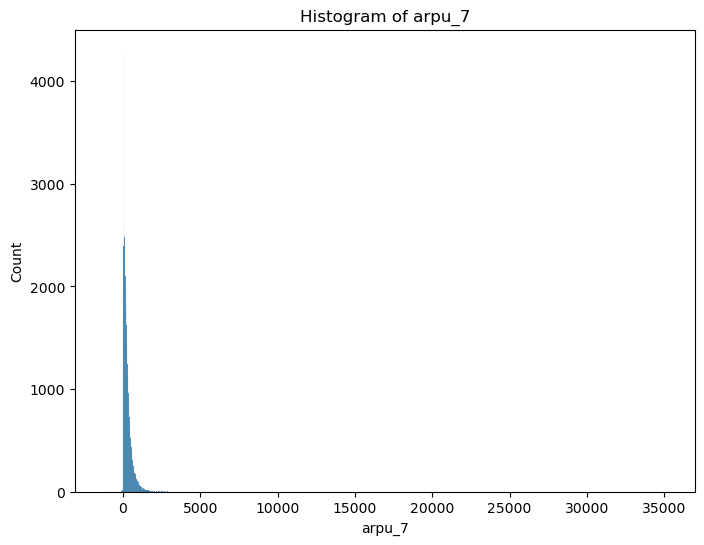

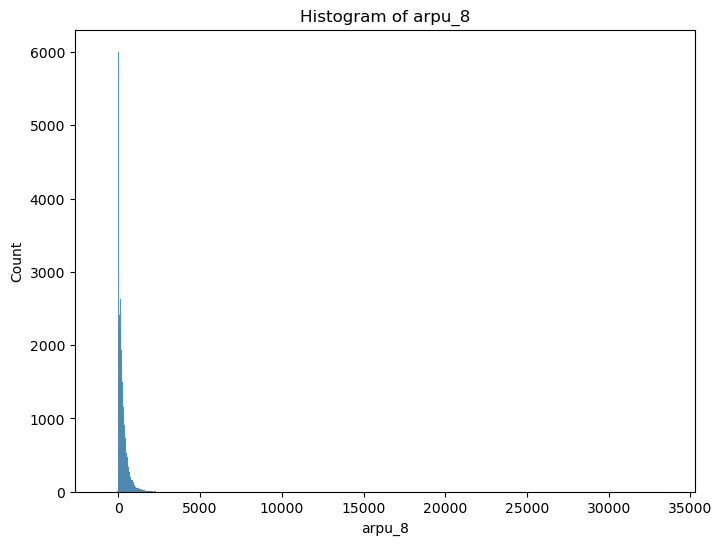

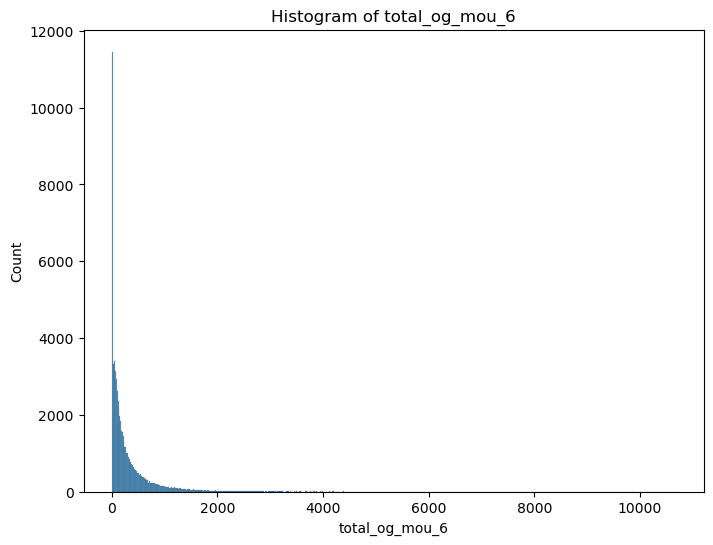

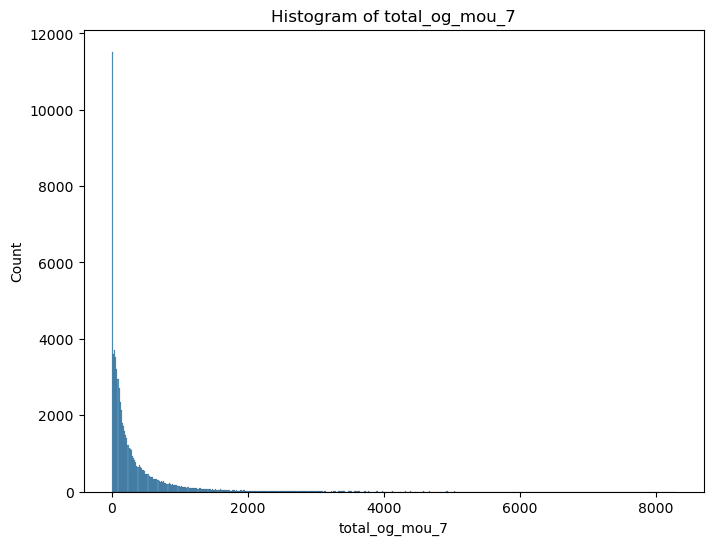

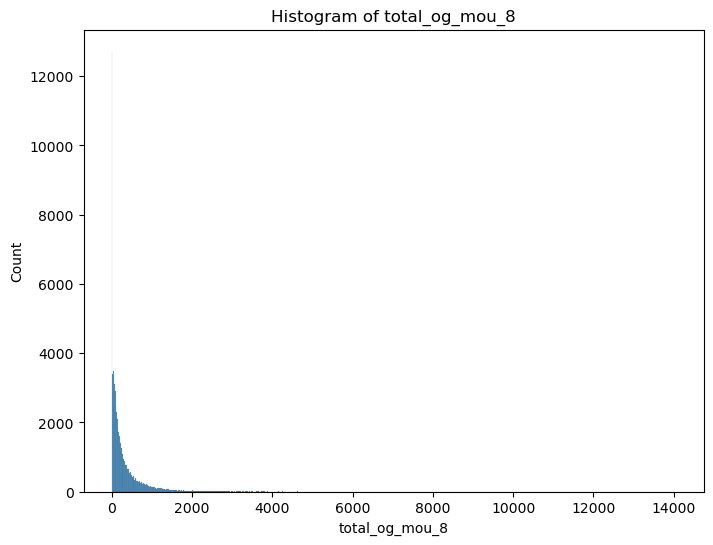

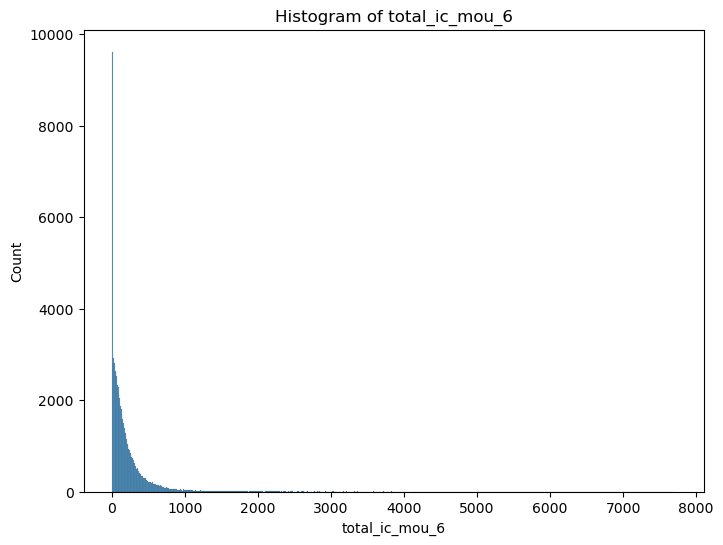

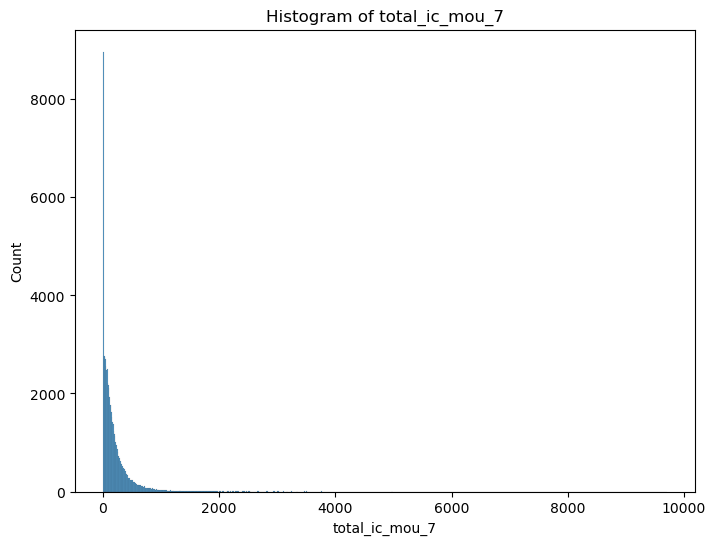

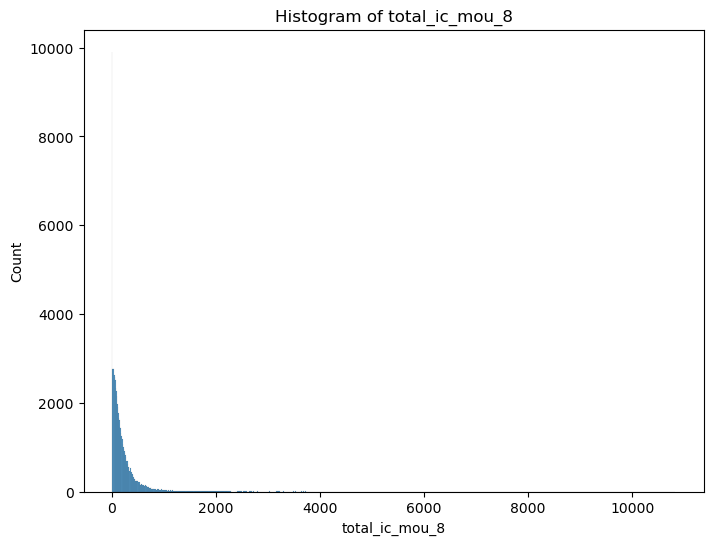

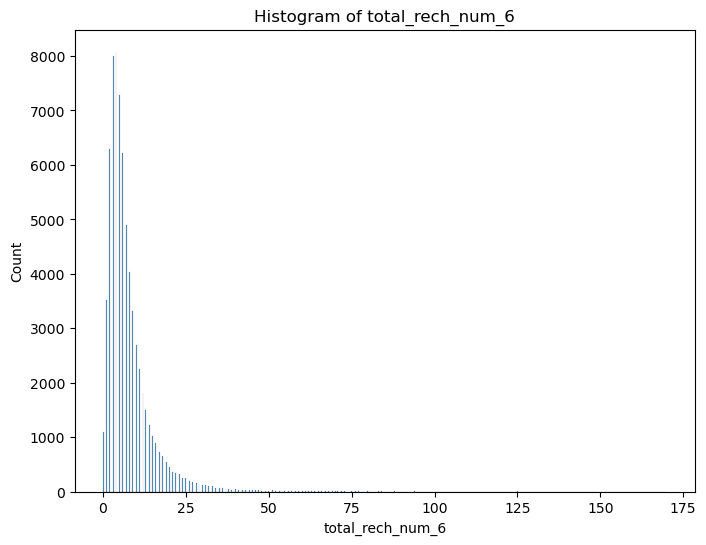

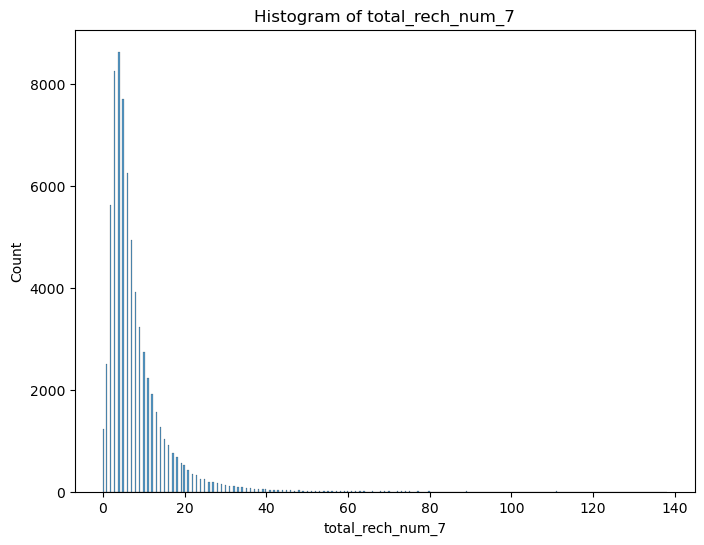

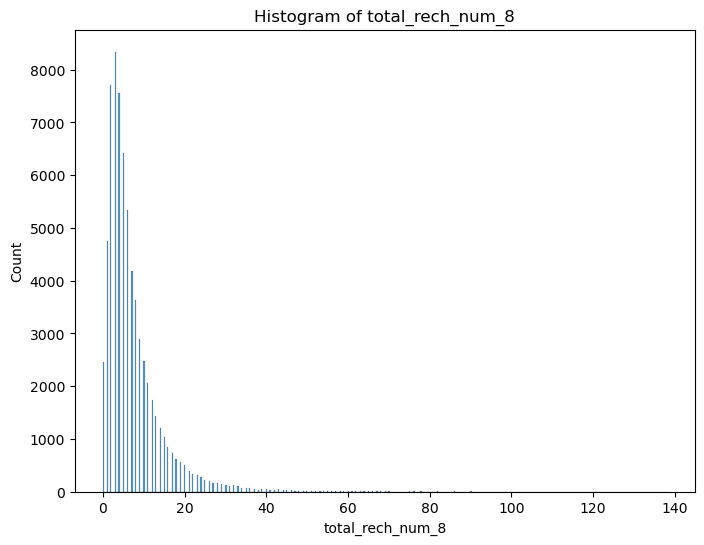

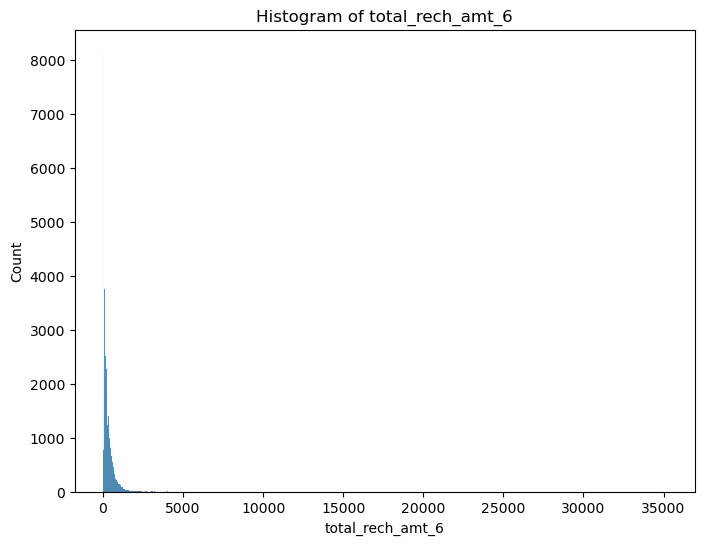

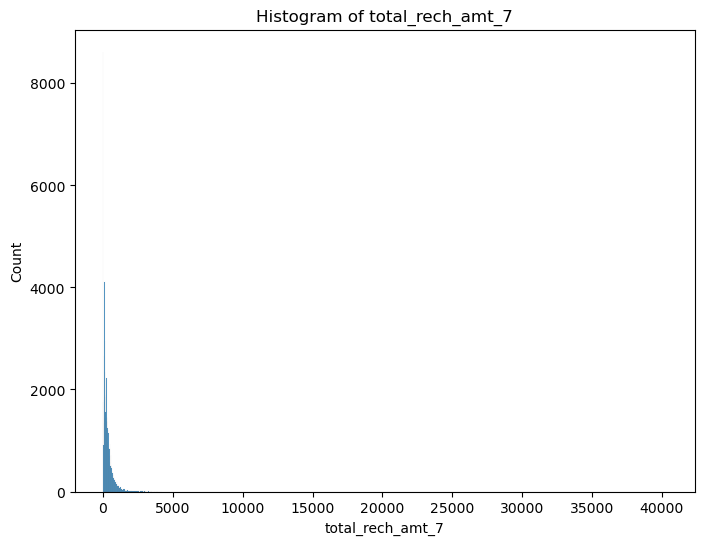

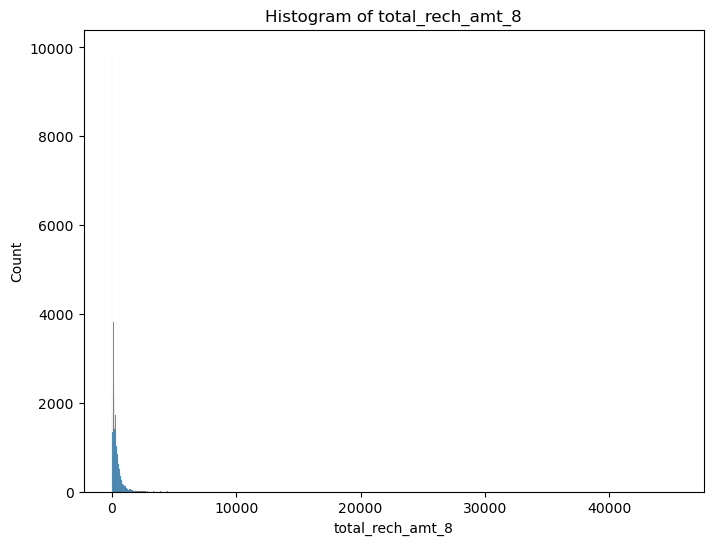

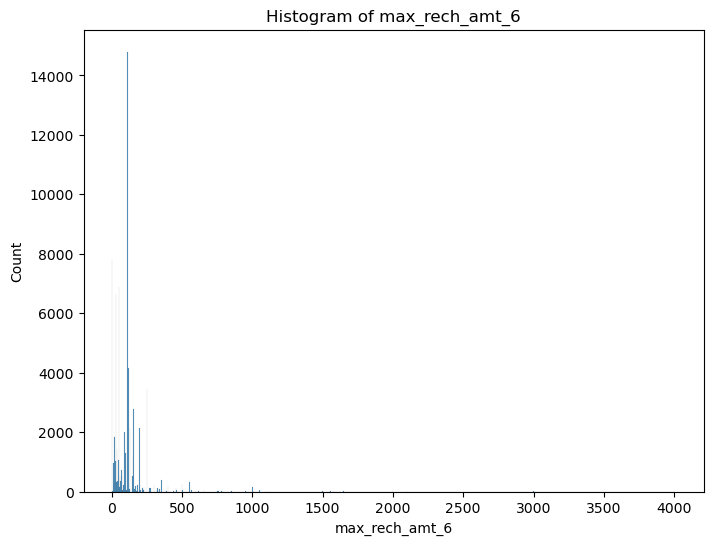

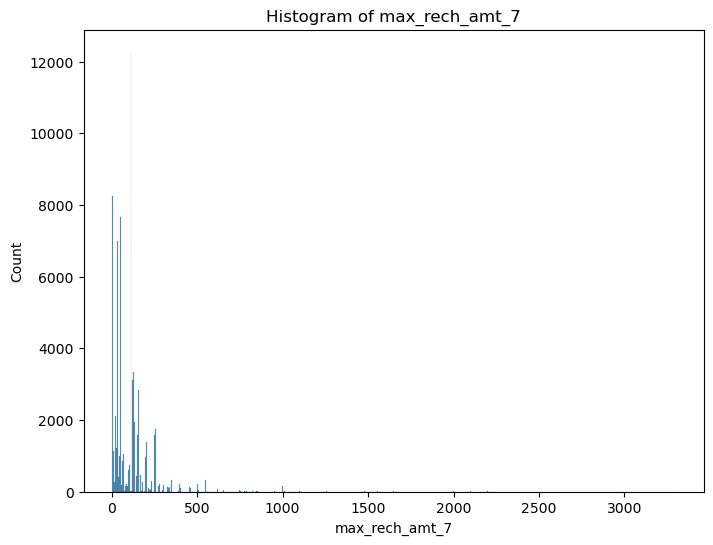

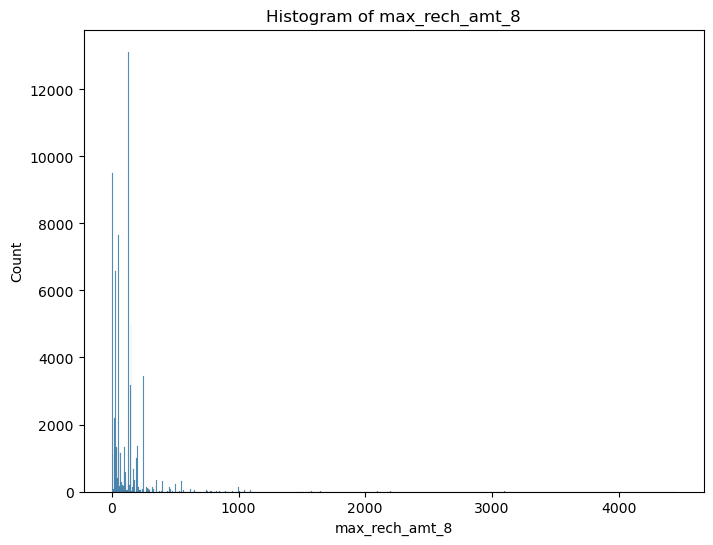

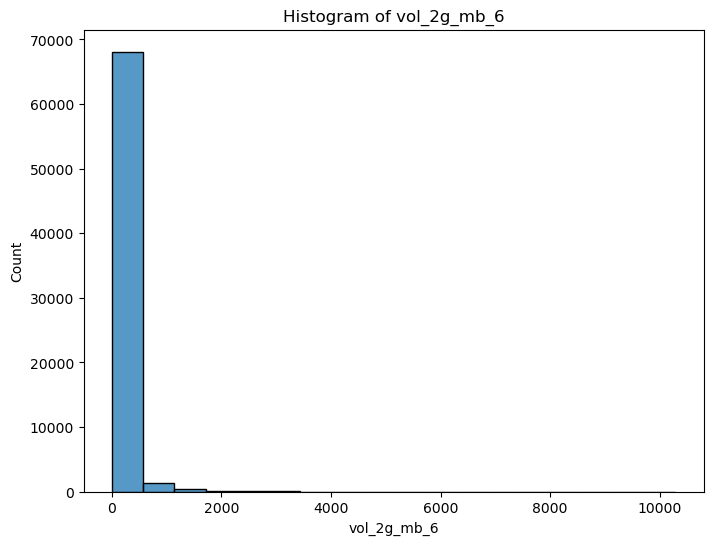

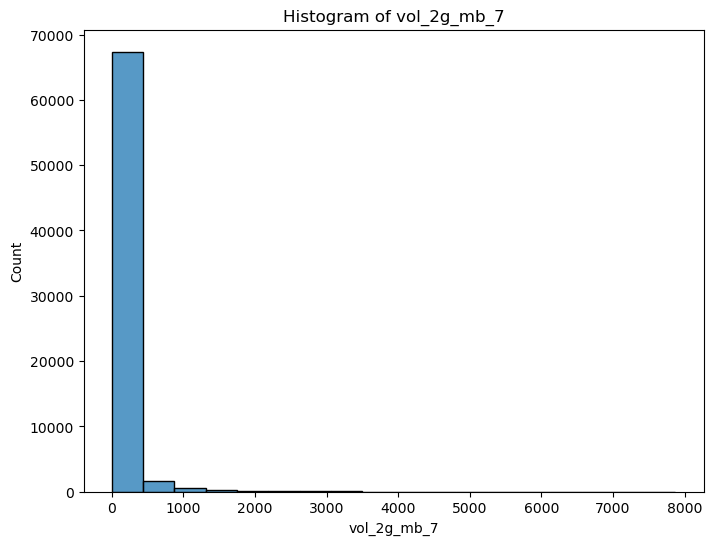

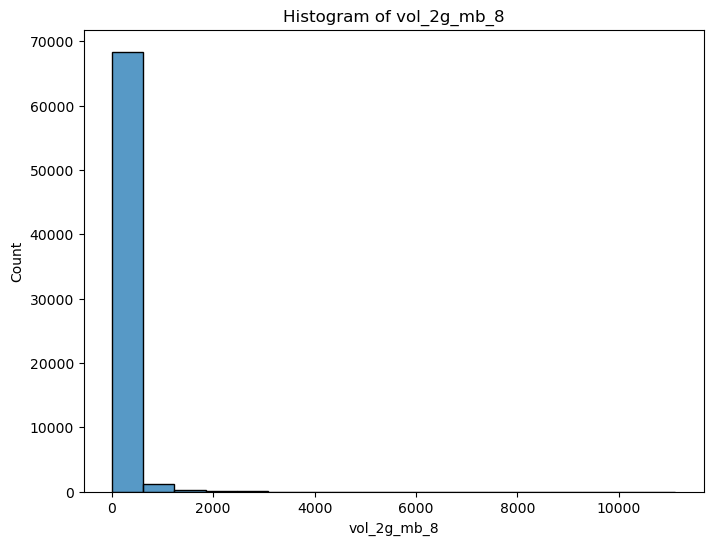

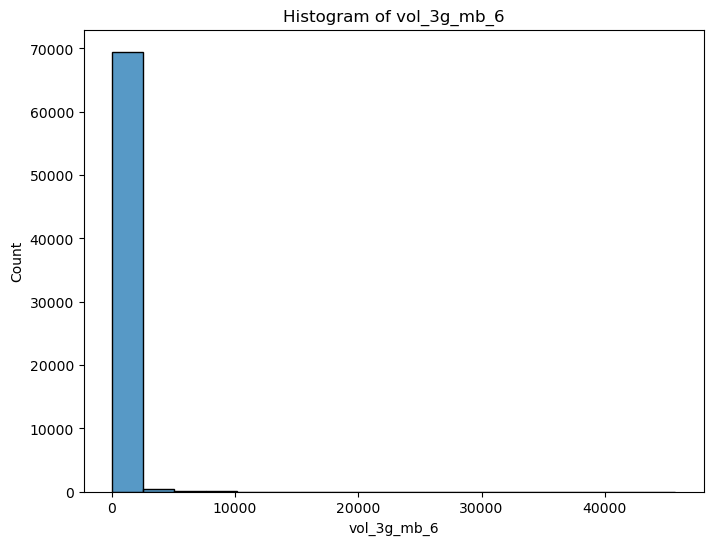

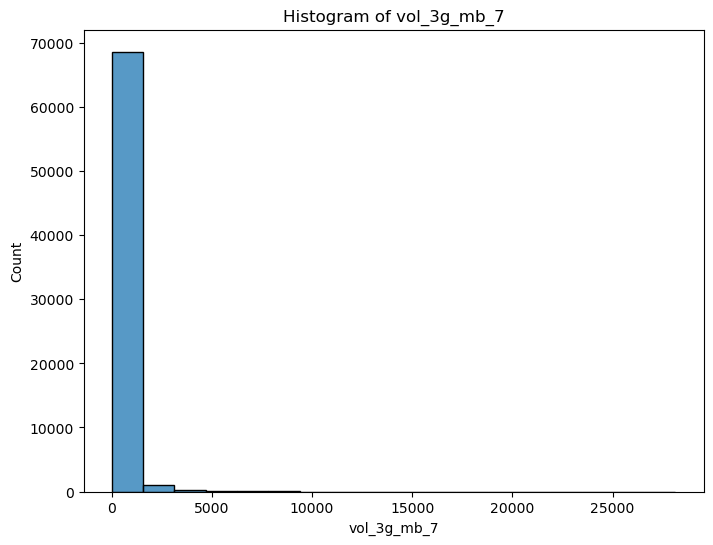

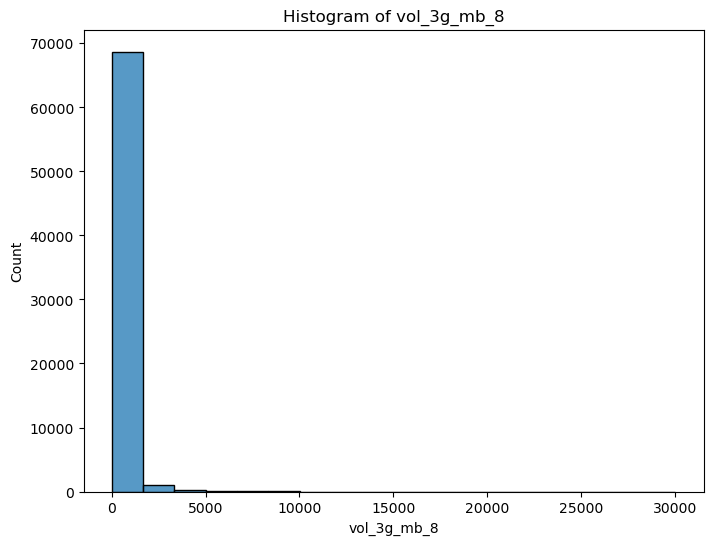

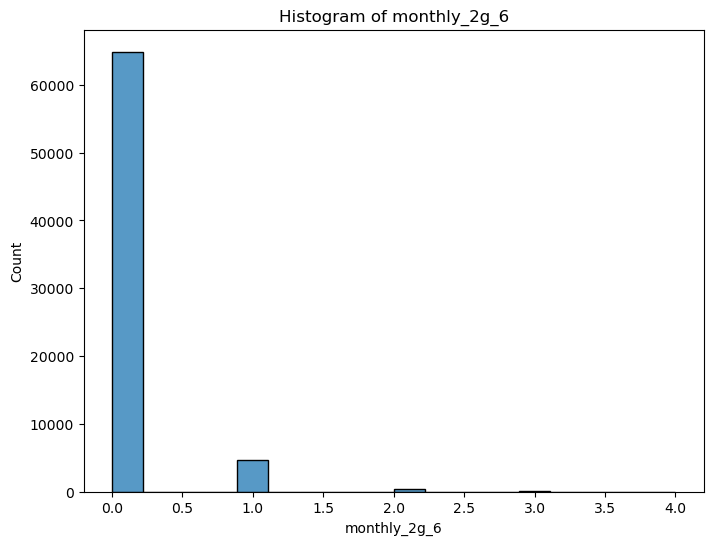

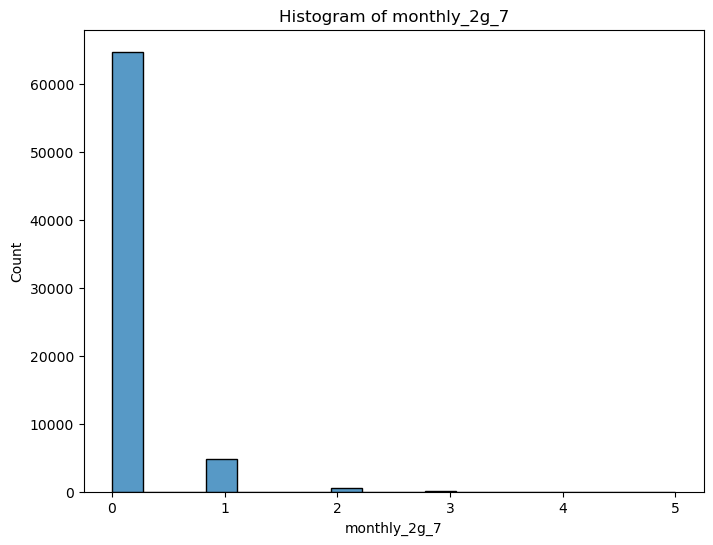

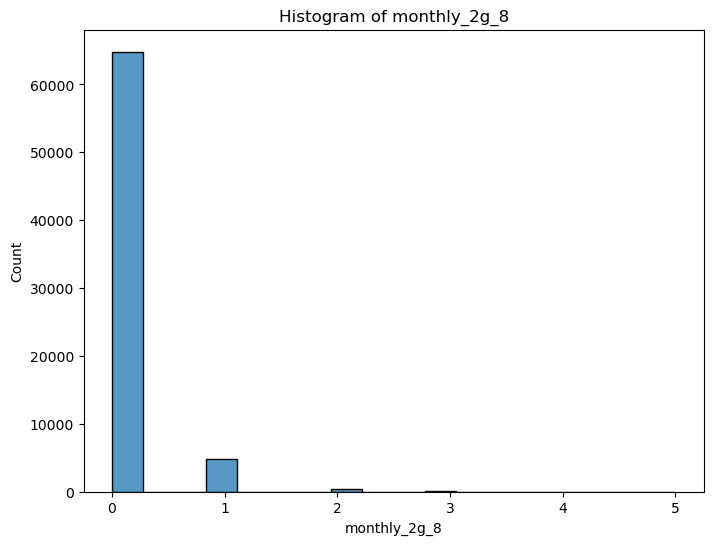

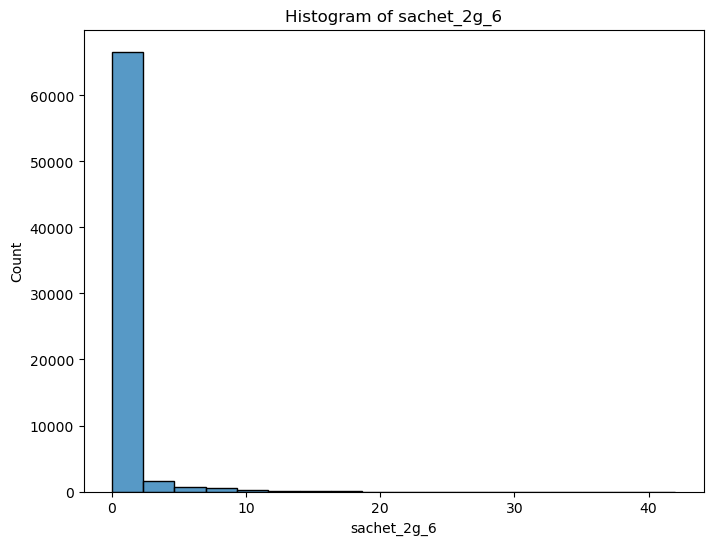

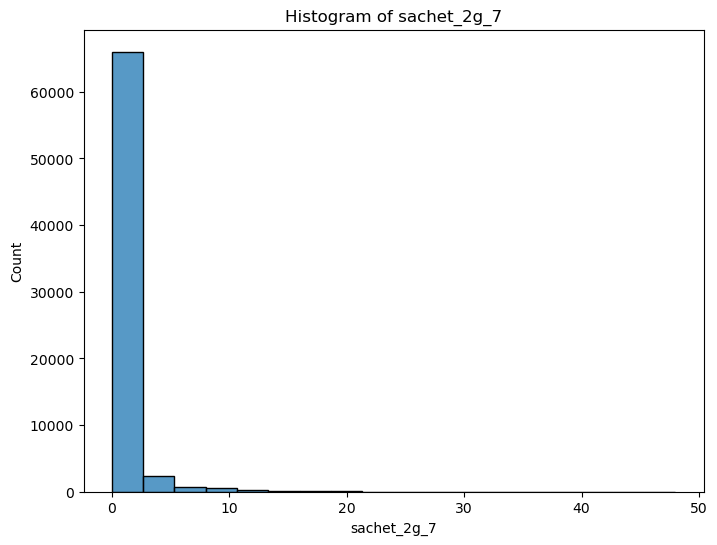

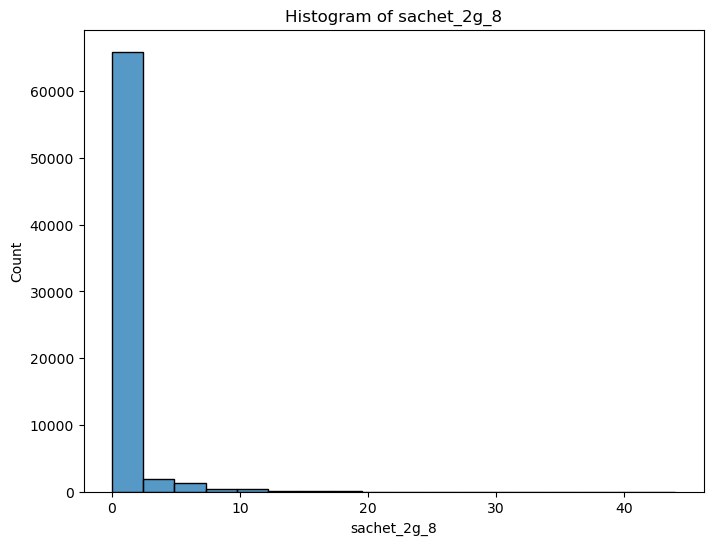

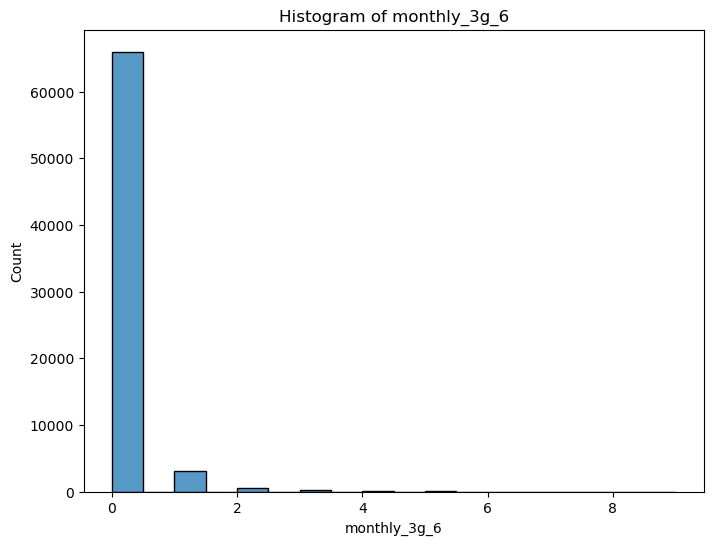

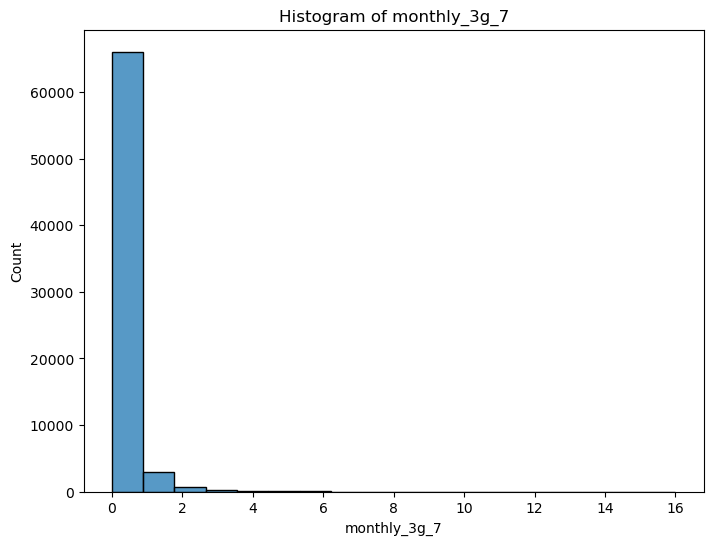

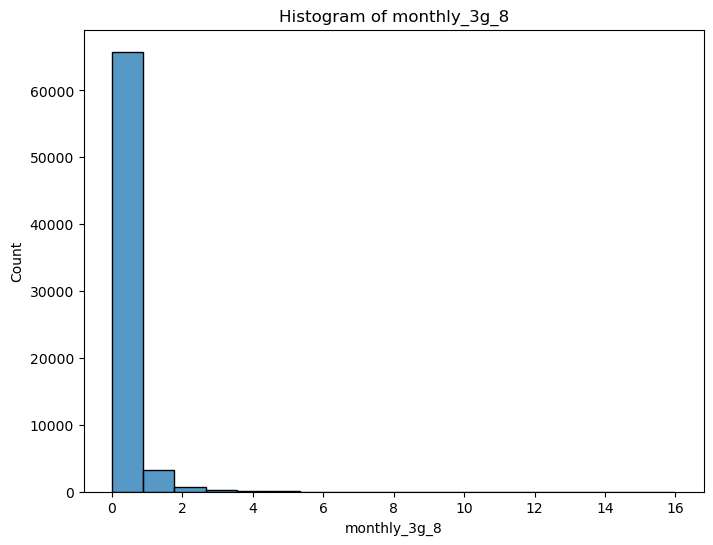

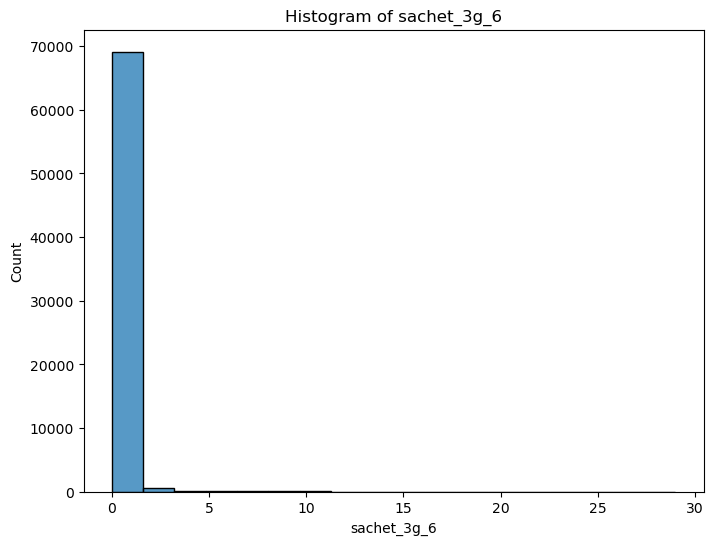

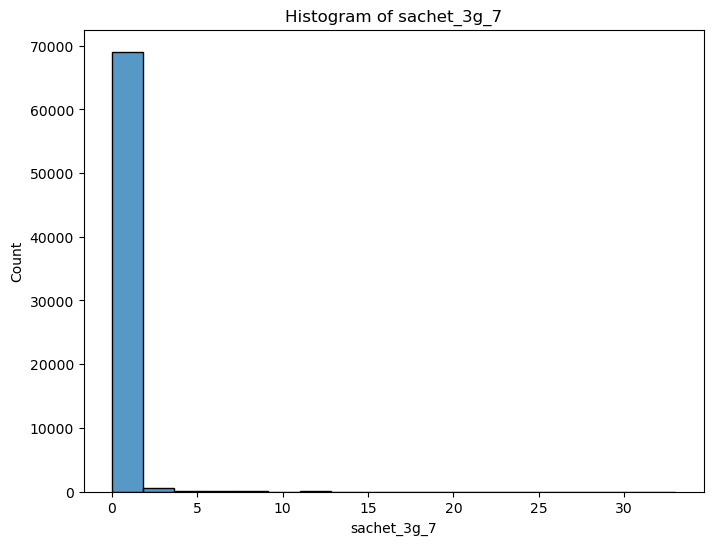

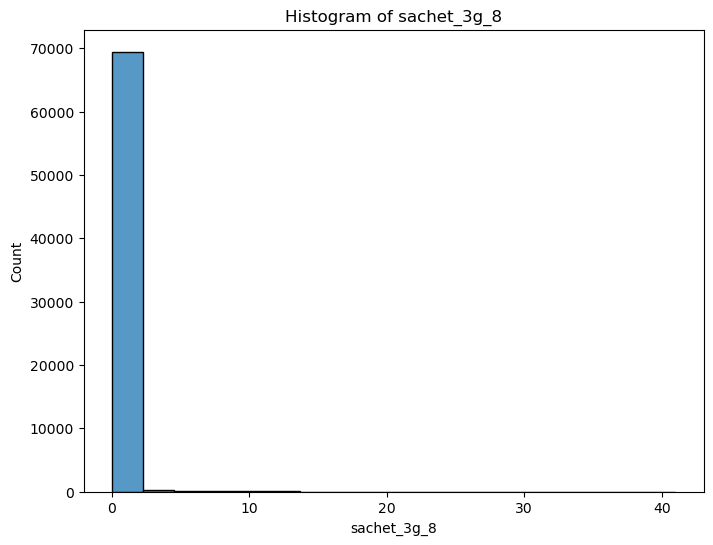

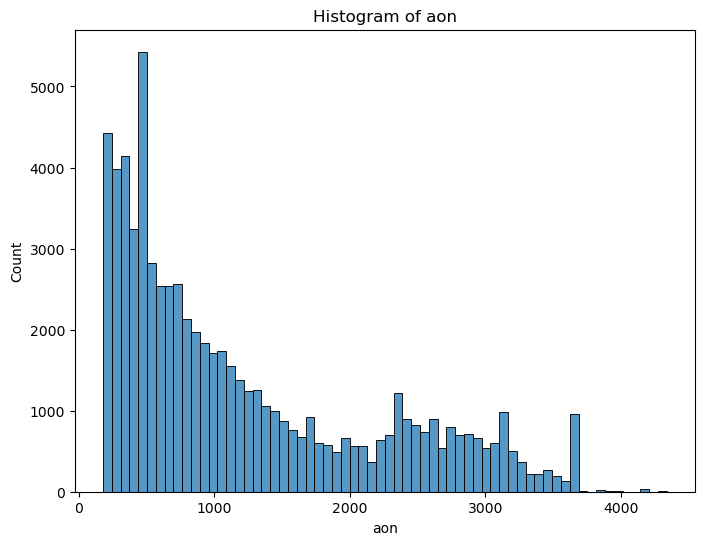

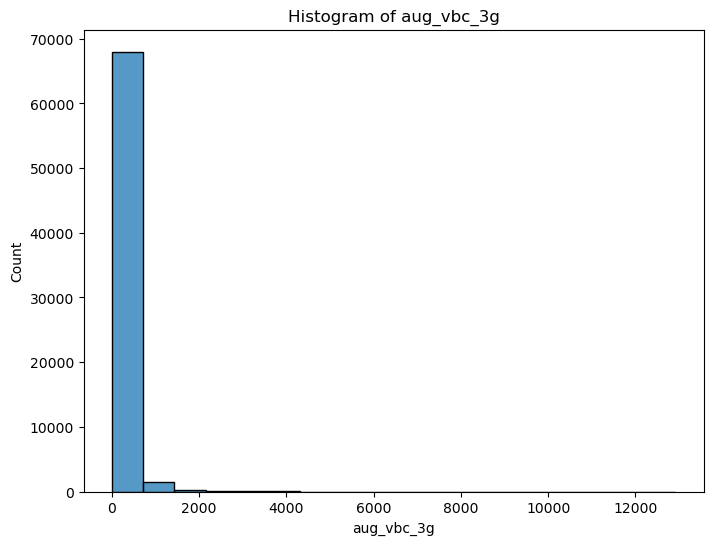

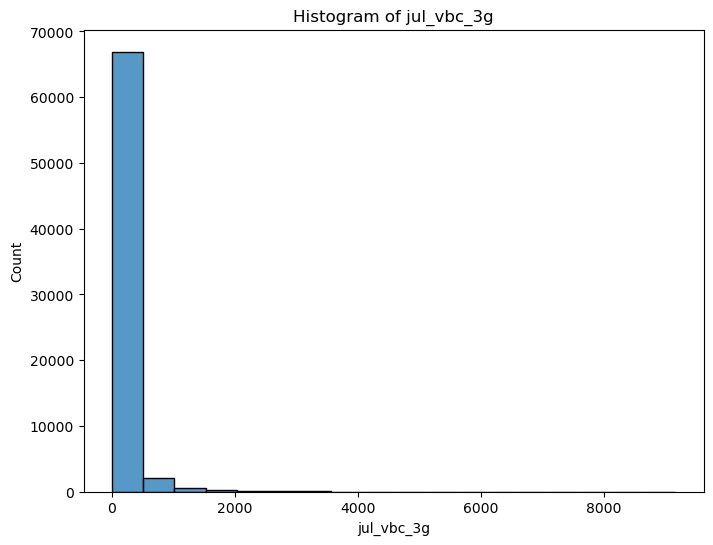

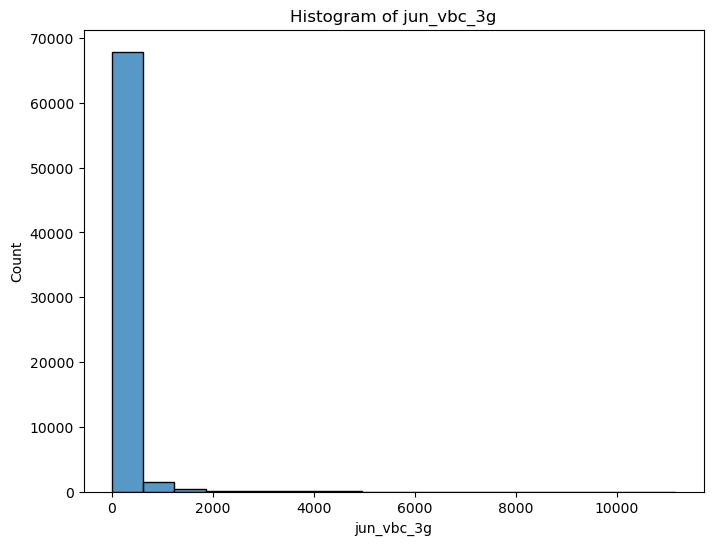

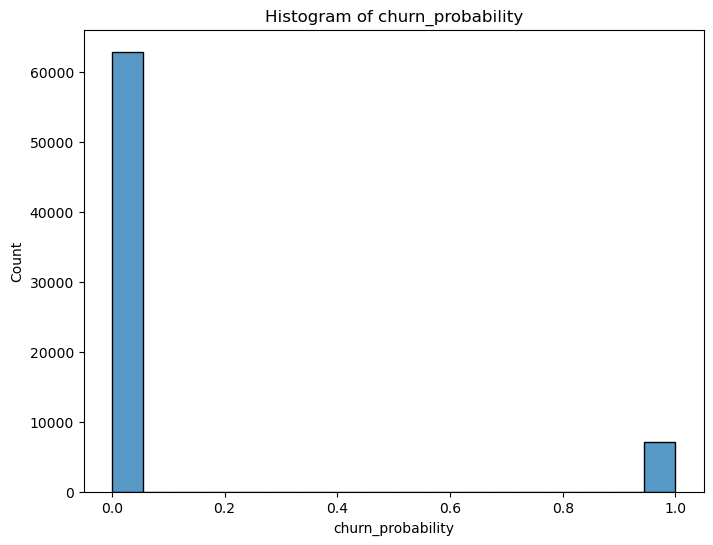

In [24]:
## Creating histogram for all the variables, all the variables we have are numeric.

for i in telecom_vis.columns:
    plt.figure(figsize=(8,6))
    sns.histplot(telecom_vis[i])
    plt.title(f'Histogram of {i}')
    plt.show


In [51]:
## We can see all the variables have nigh number of outliers, we are using K-sigma method woth k=3 to remove outliers.

def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

telecom_filtered1 = telecom_filtered.apply(cap_outliers, axis=0)
                                          

In [53]:
telecom_test_filtered1 = telecom_test_filtered.apply(cap_outliers, axis=0)

In [112]:
## Updating visualization data set.
telecom_vis = telecom_filtered1.drop(['id'], axis=1)

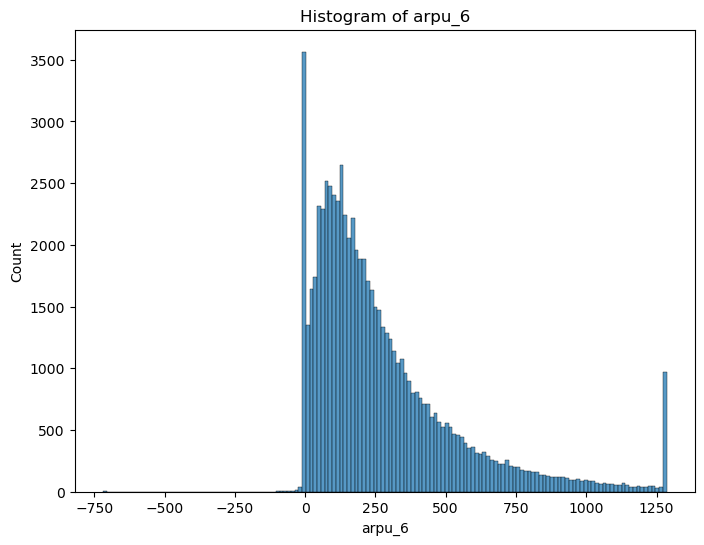

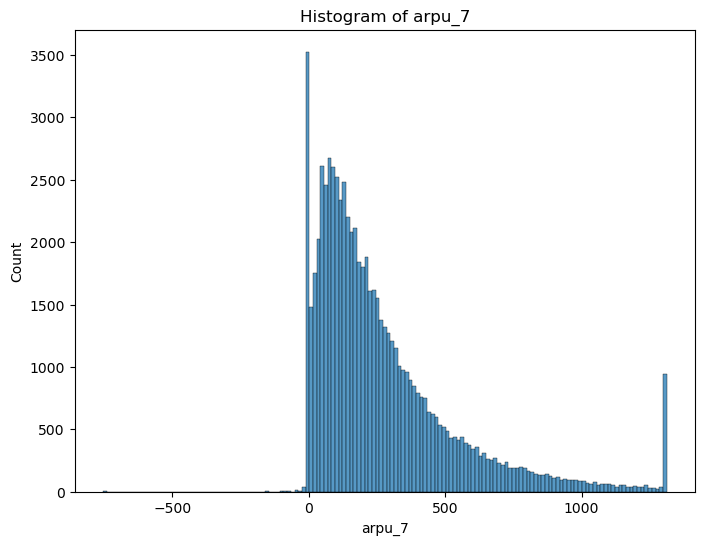

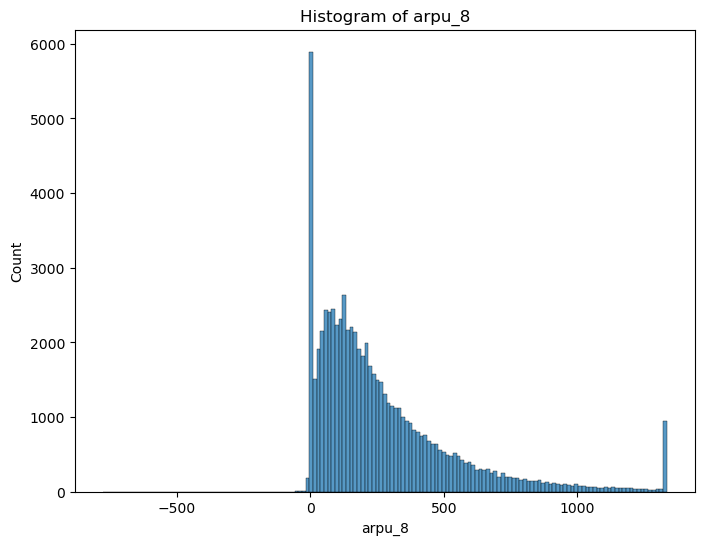

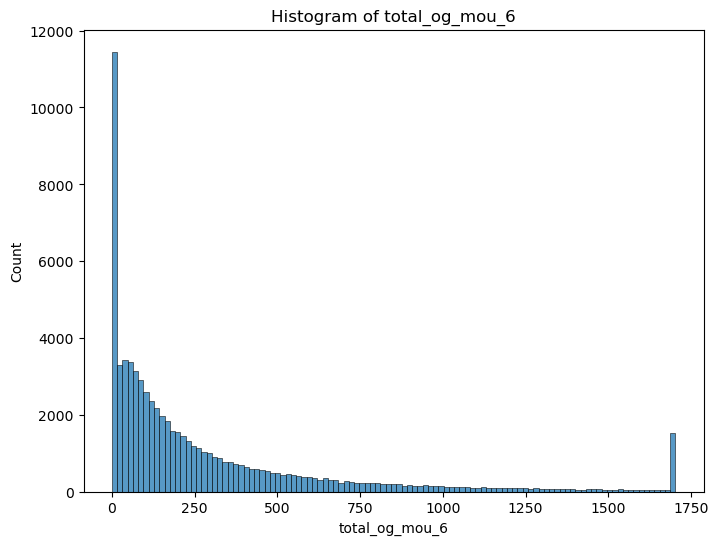

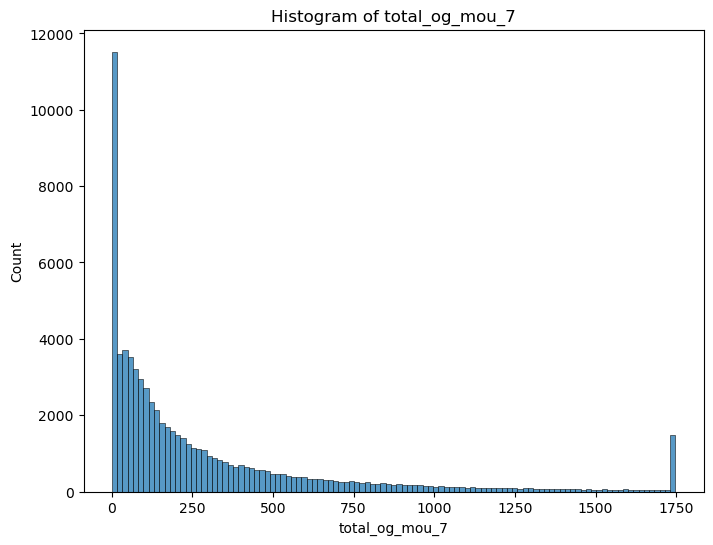

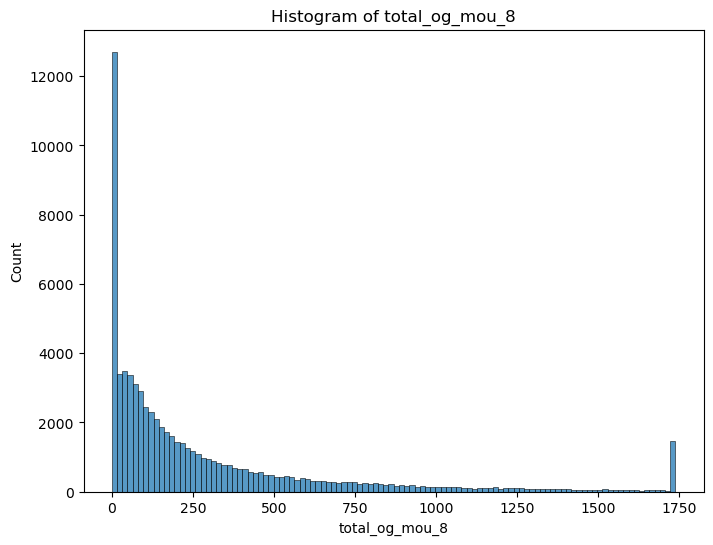

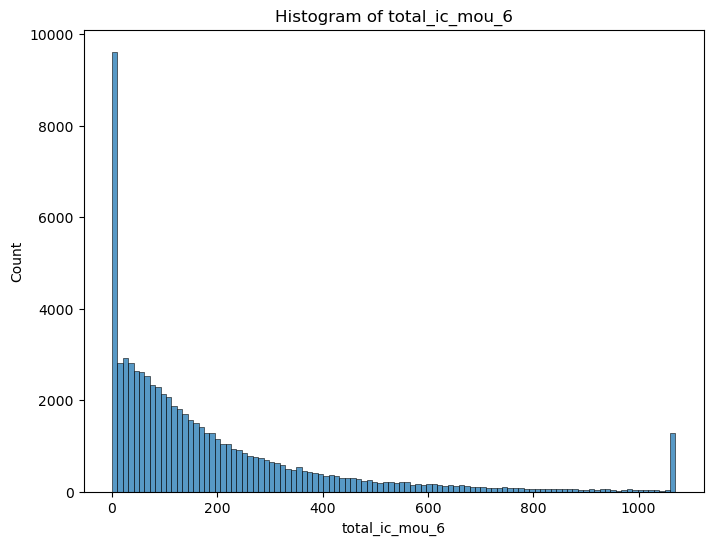

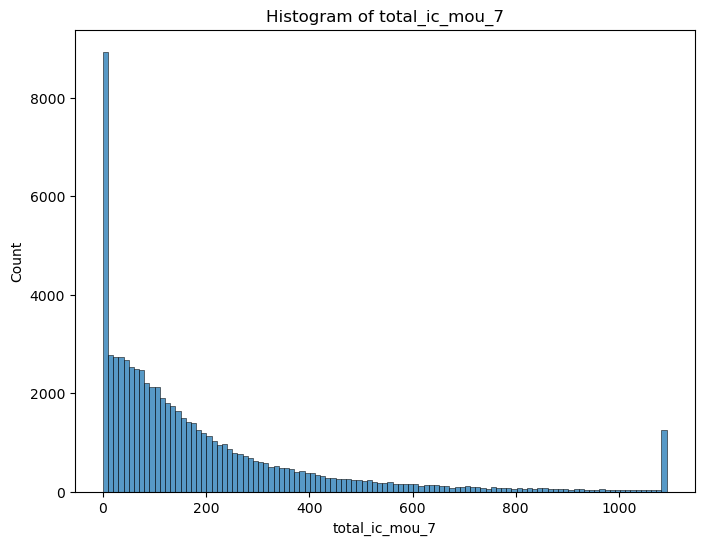

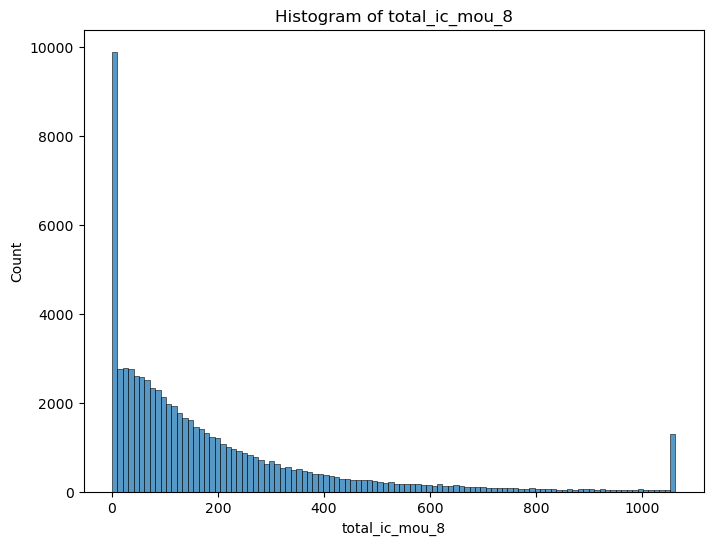

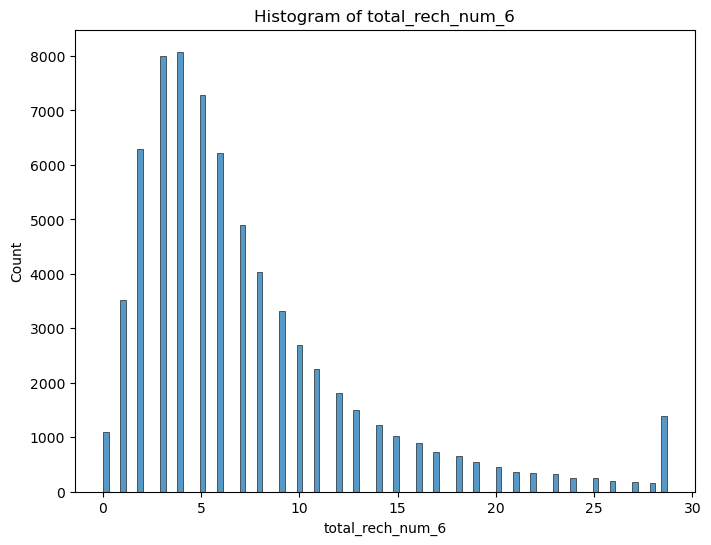

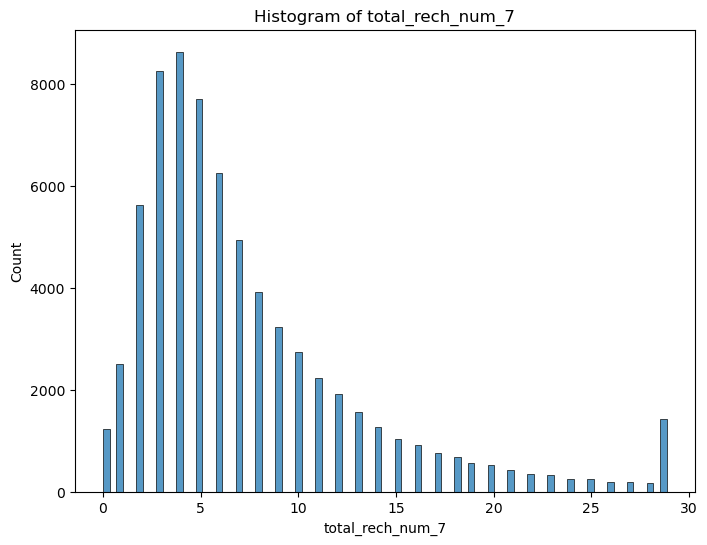

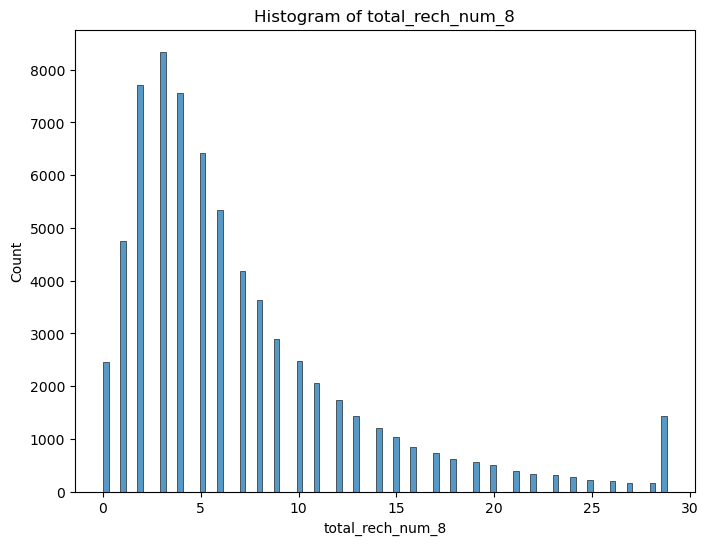

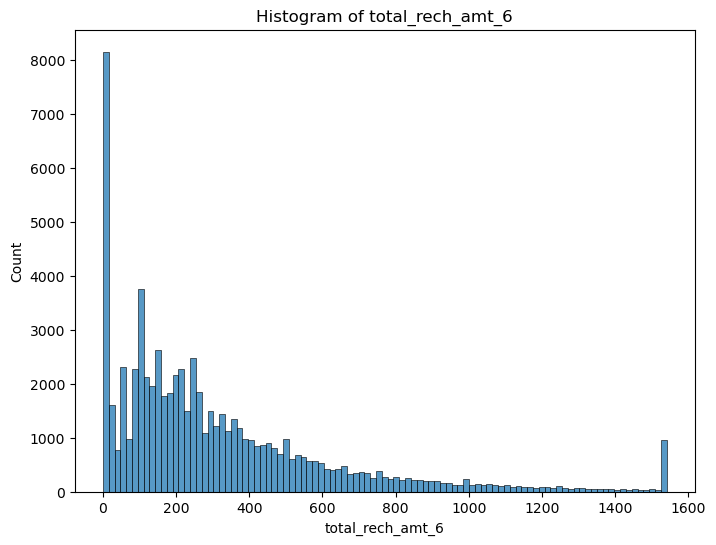

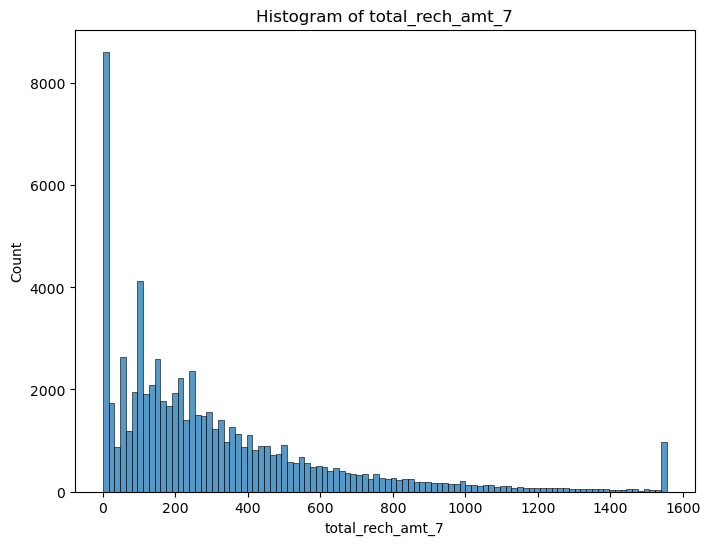

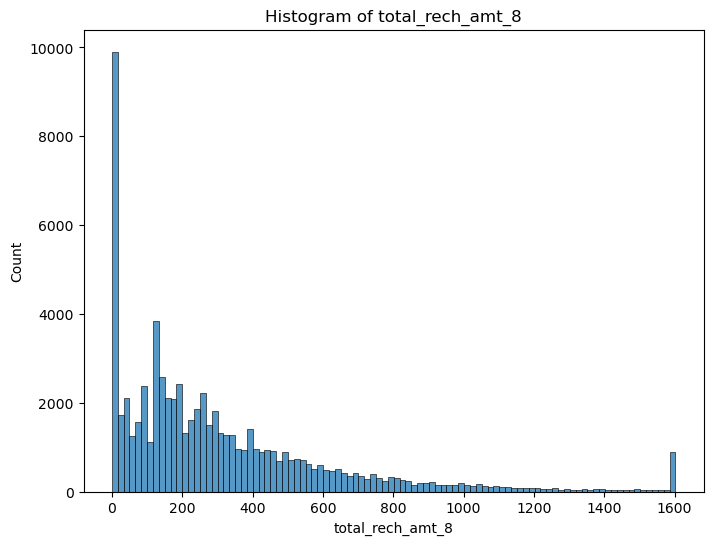

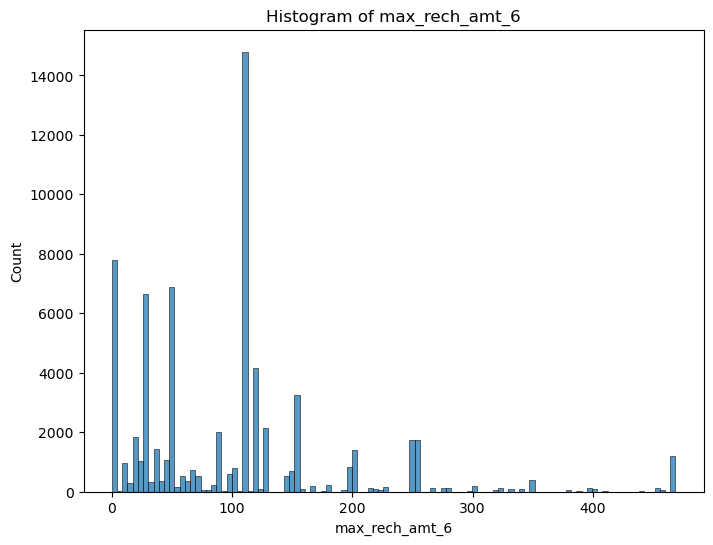

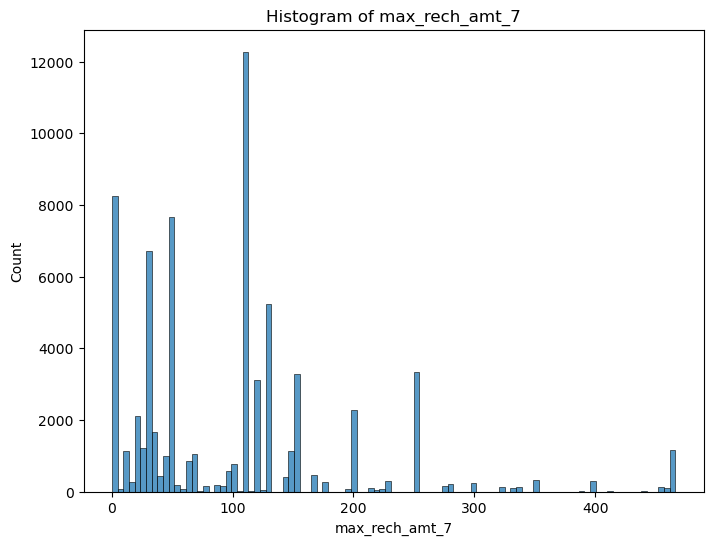

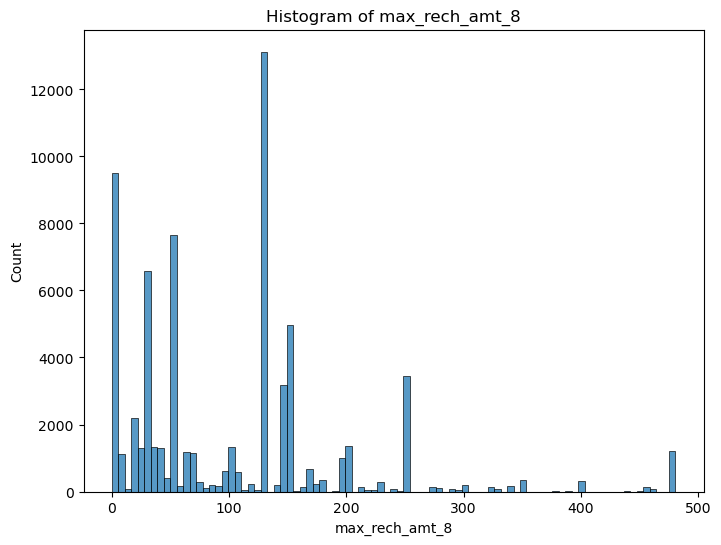

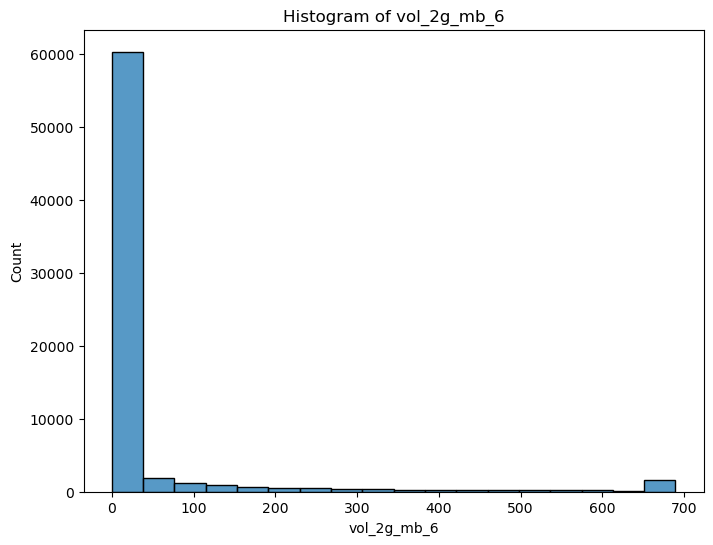

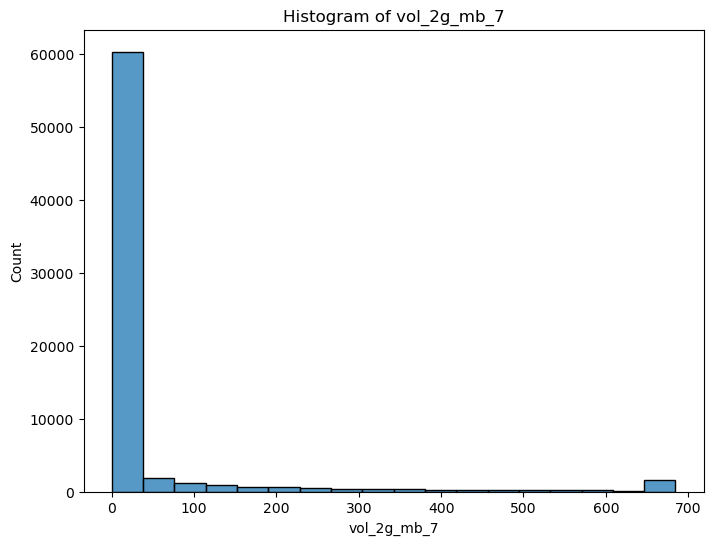

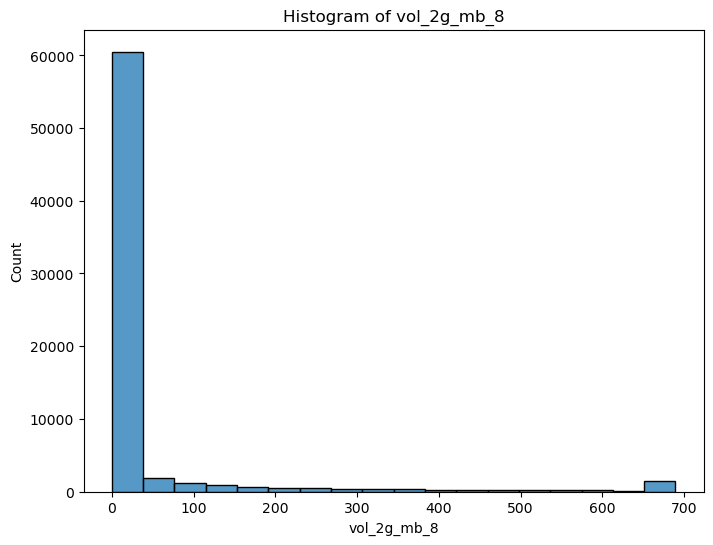

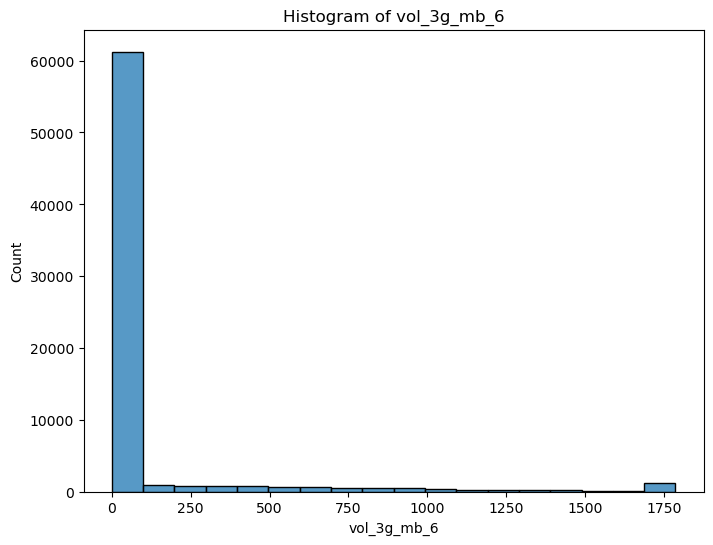

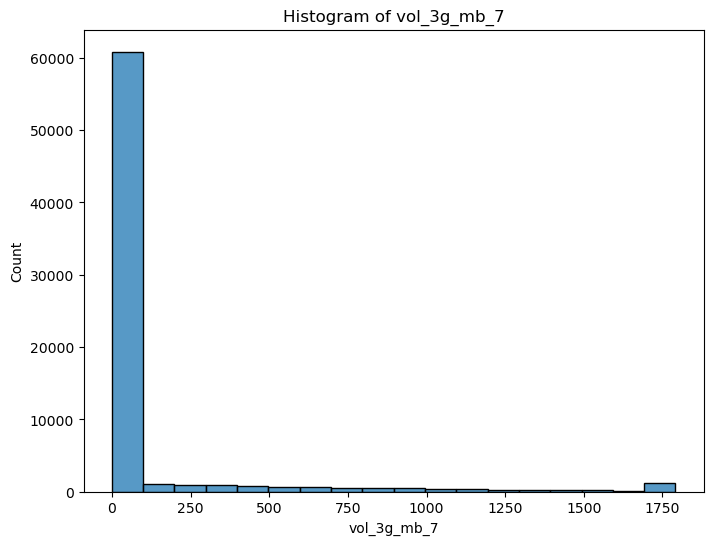

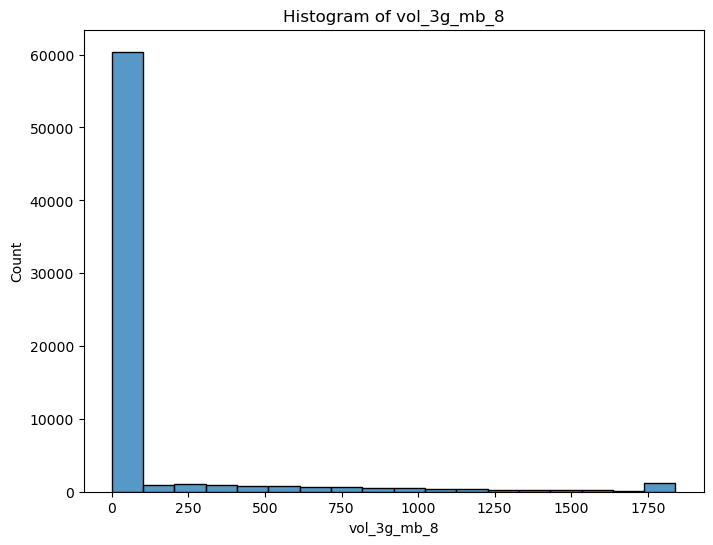

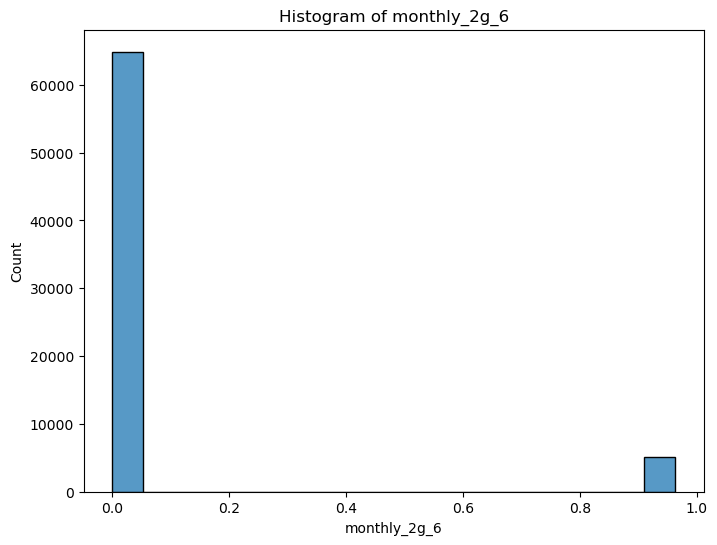

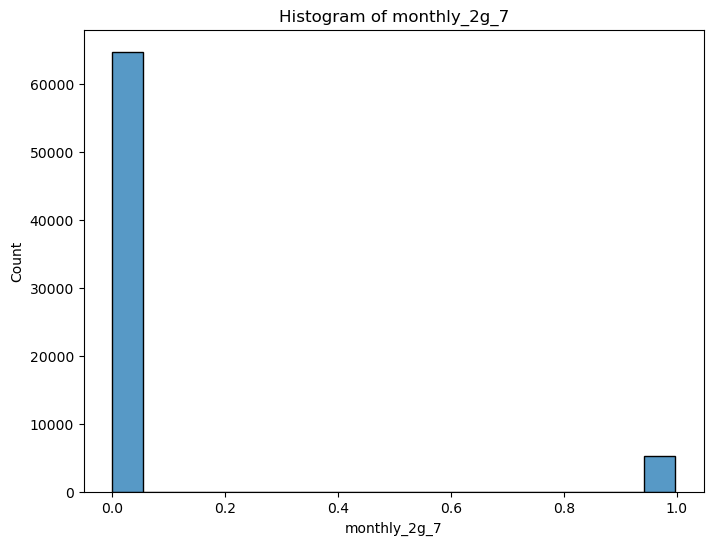

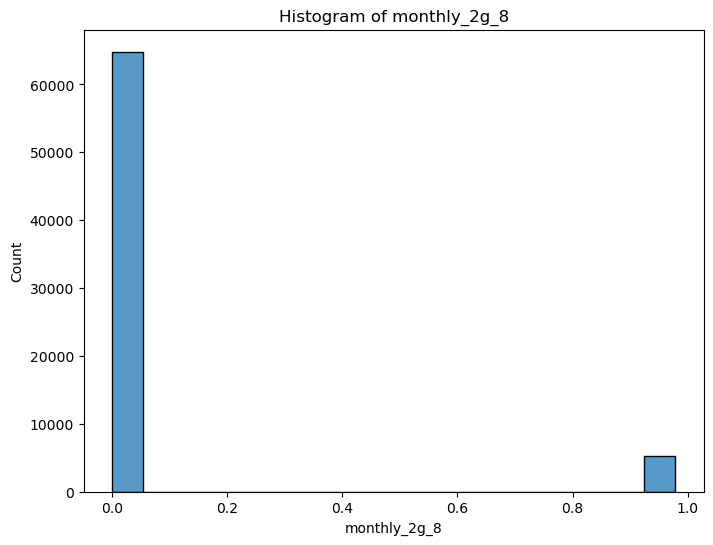

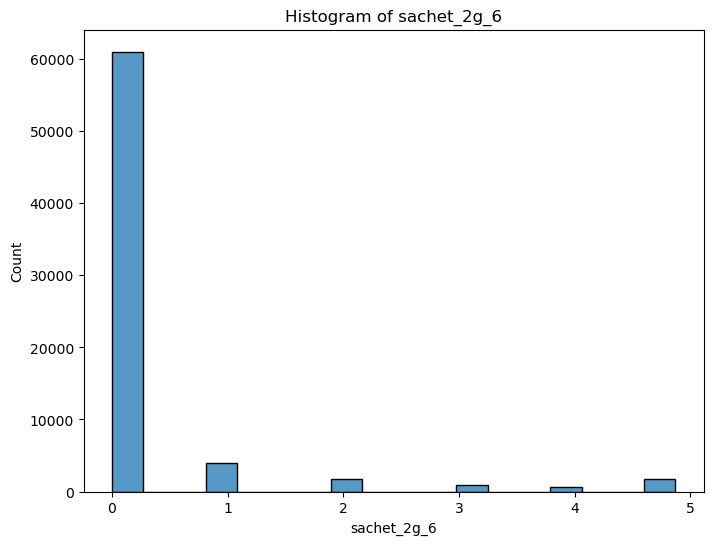

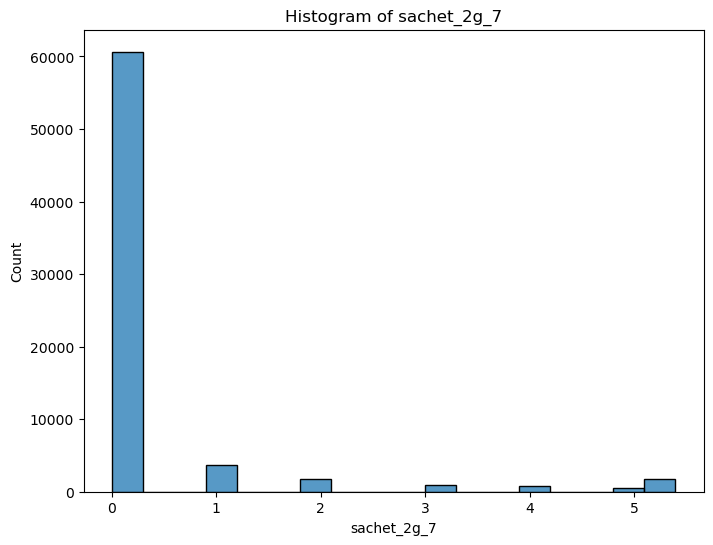

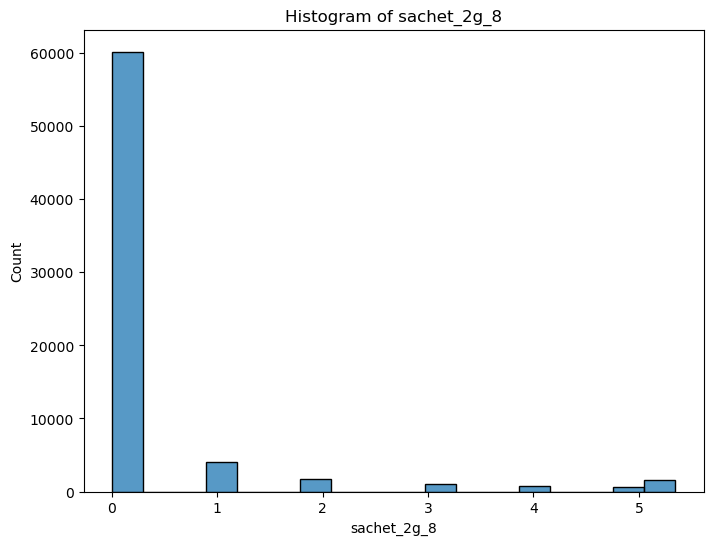

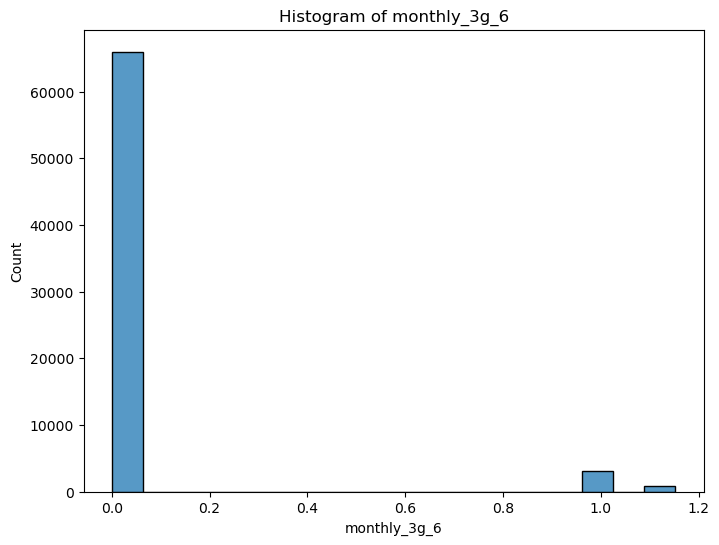

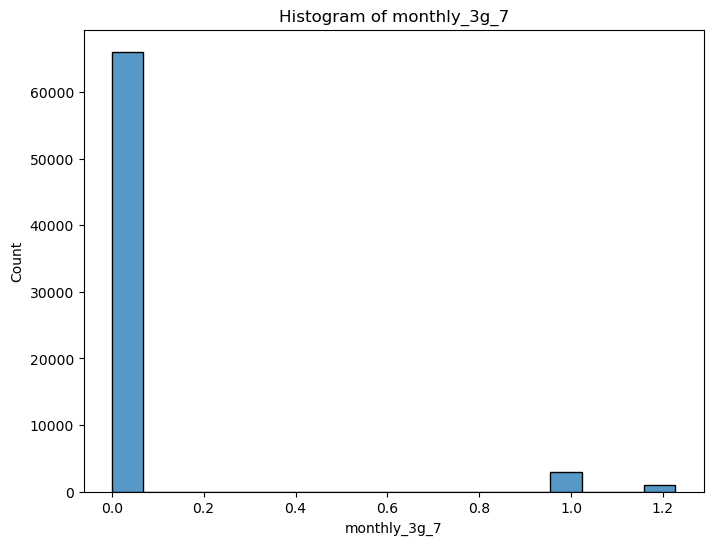

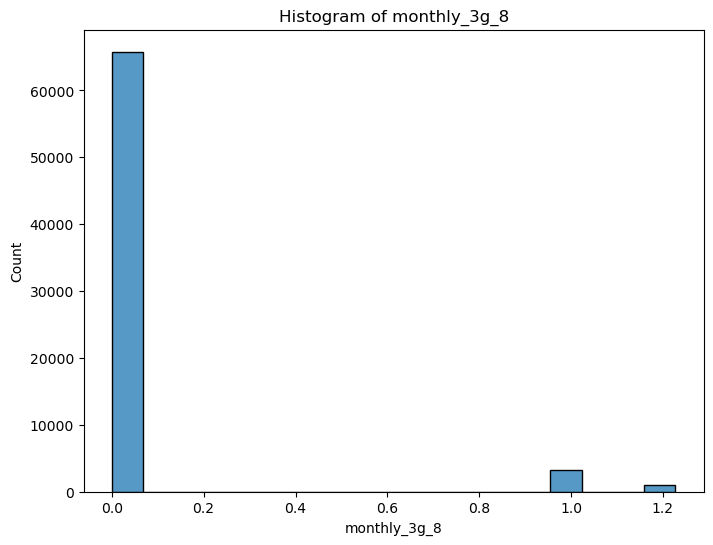

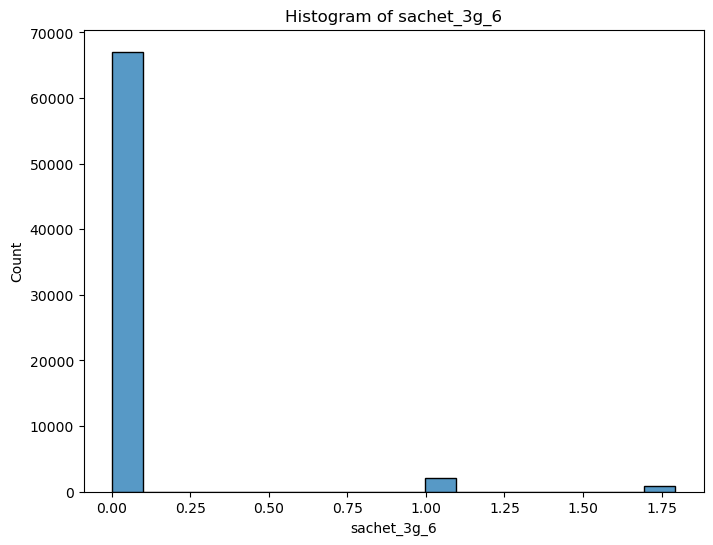

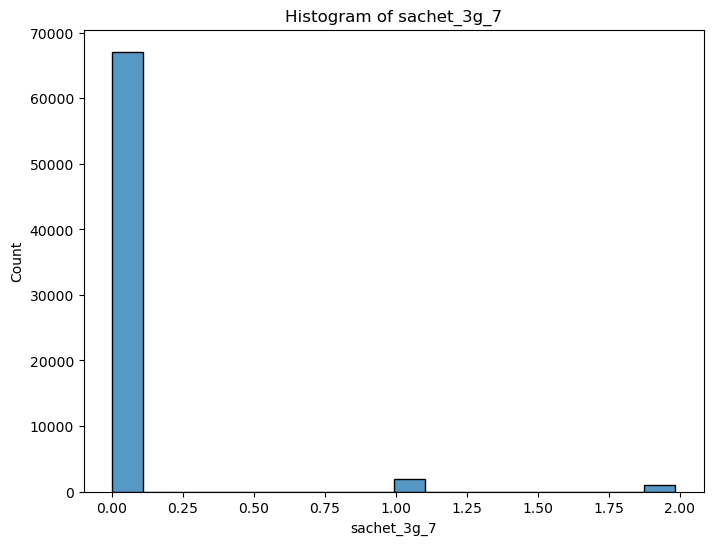

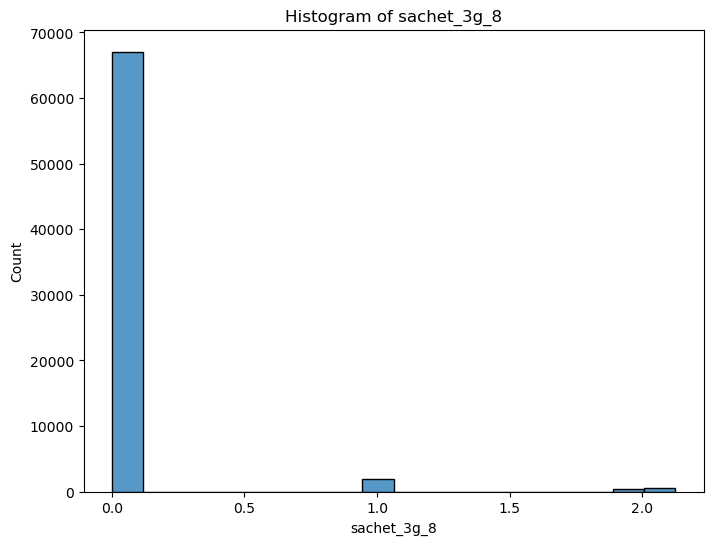

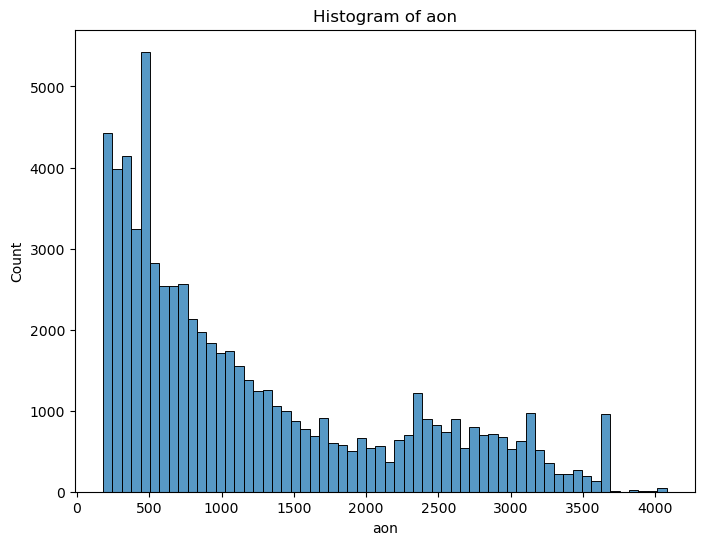

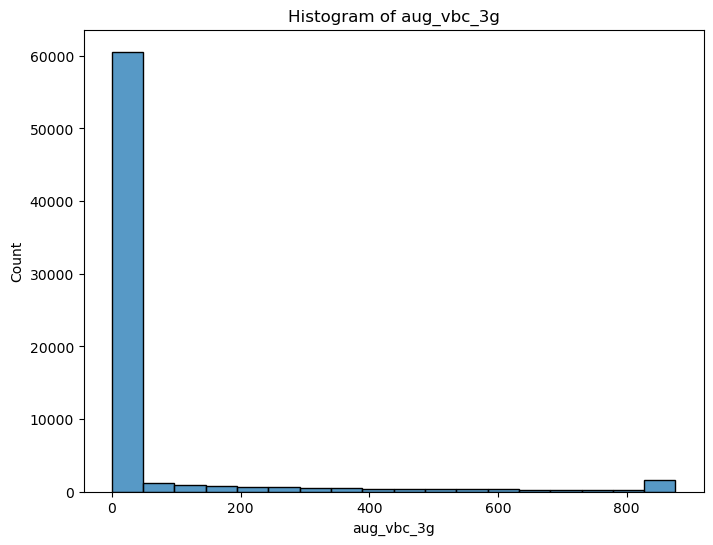

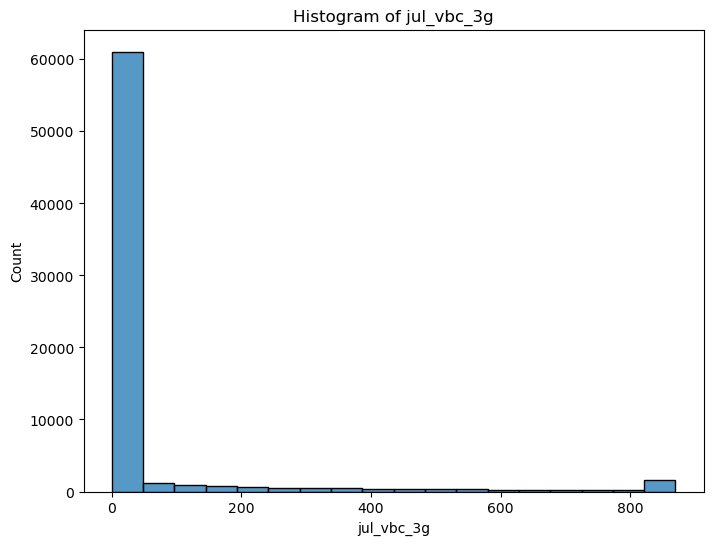

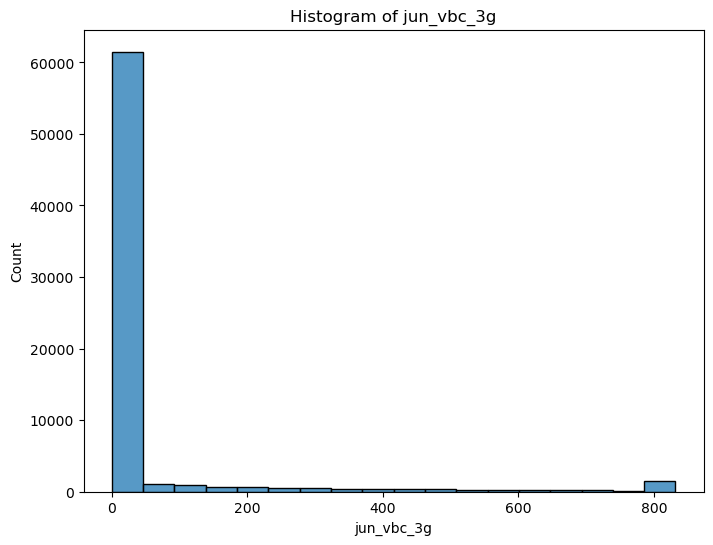

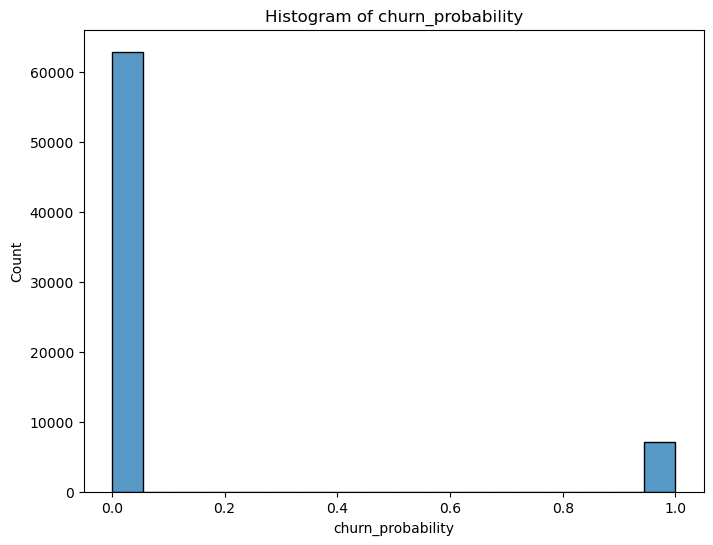

In [211]:
## Creating histograms again after removing outliers

for i in telecom_vis.columns:
    plt.figure(figsize=(8,6))
    sns.histplot(telecom_vis[i])
    plt.title(f'Histogram of {i}')
    plt.show

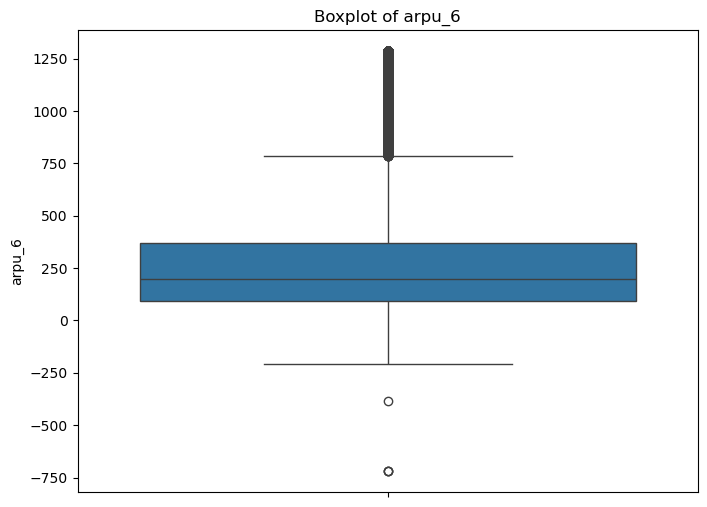

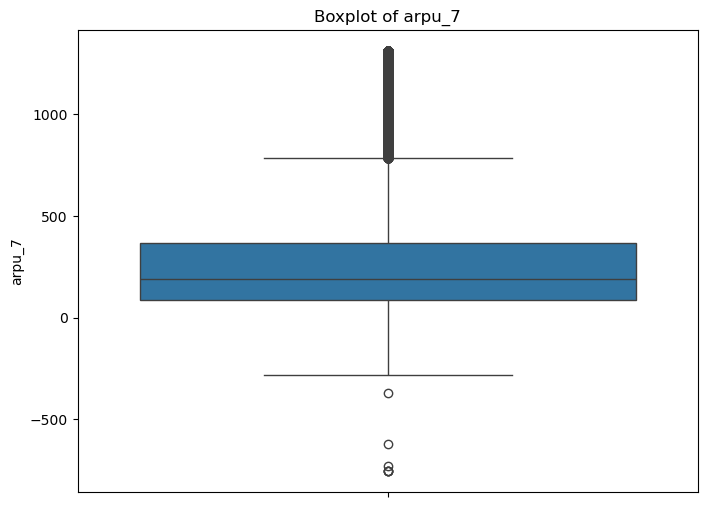

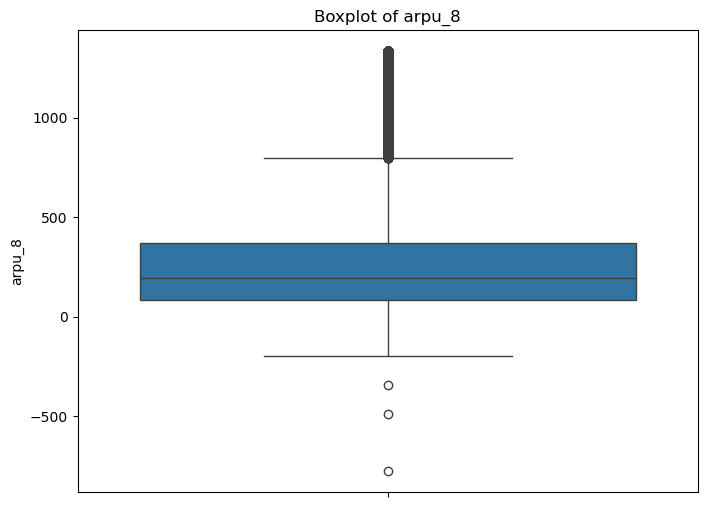

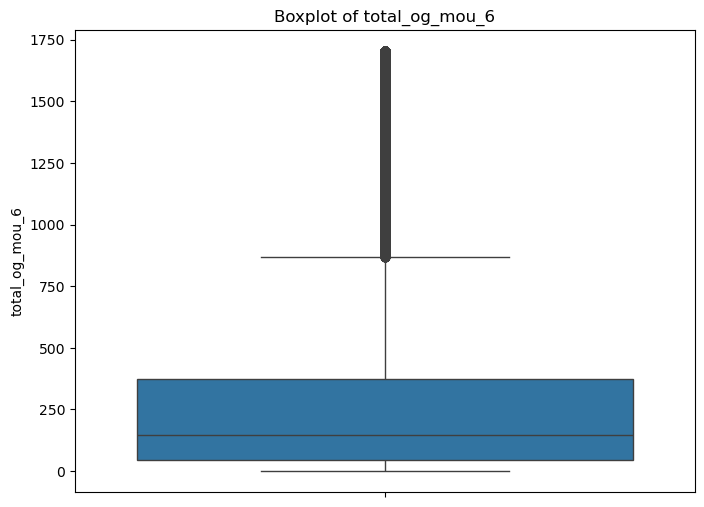

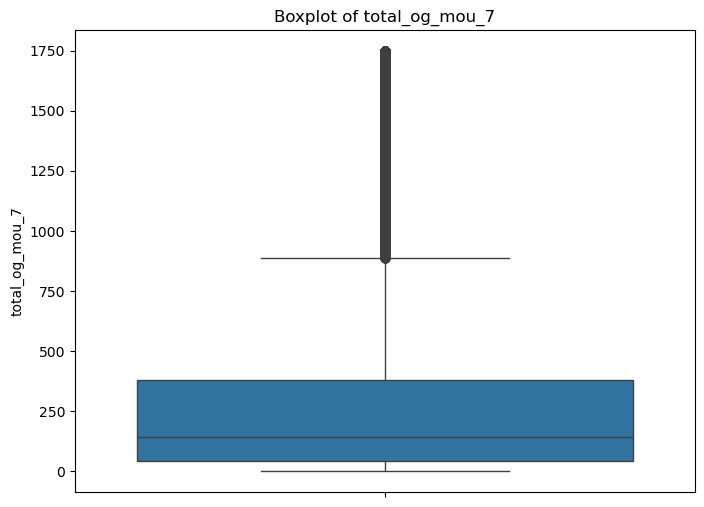

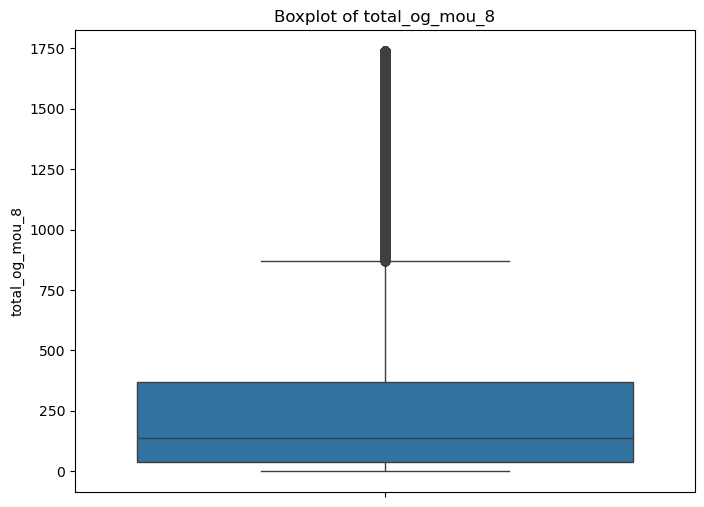

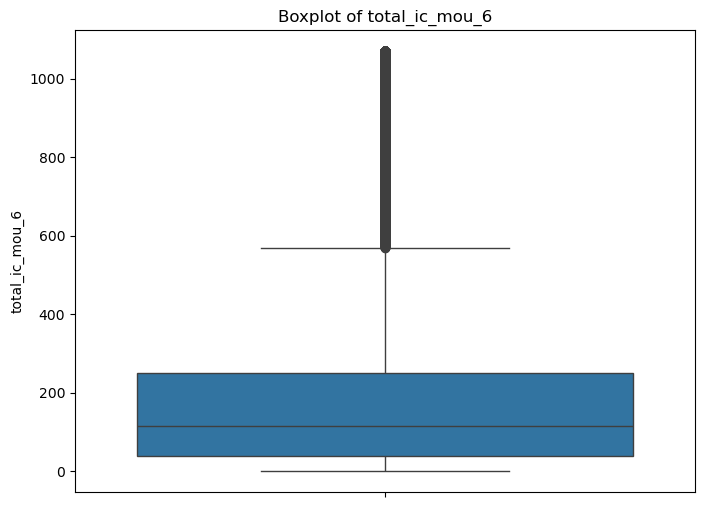

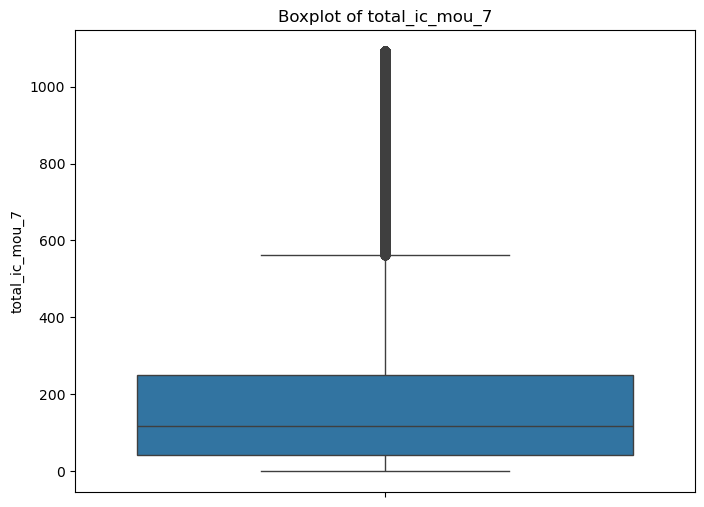

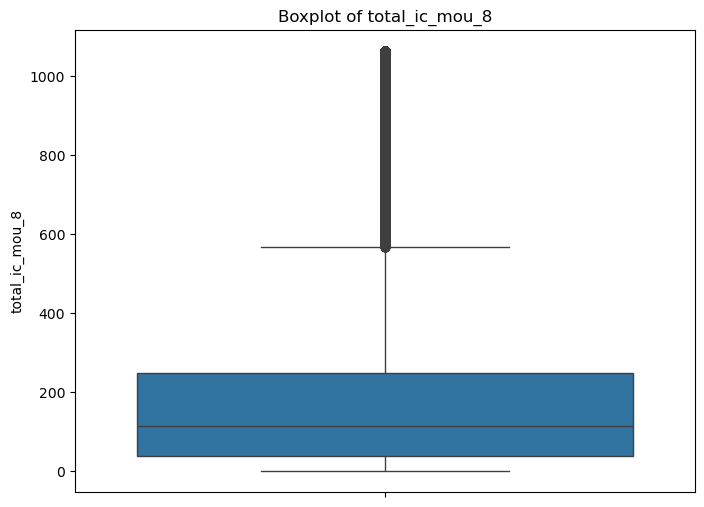

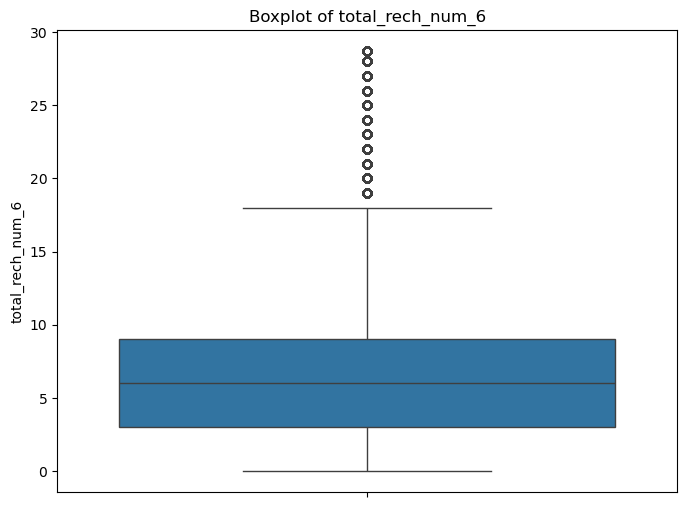

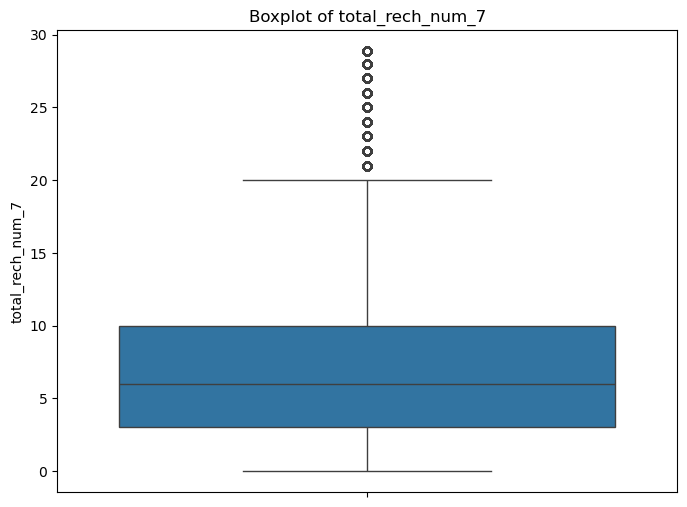

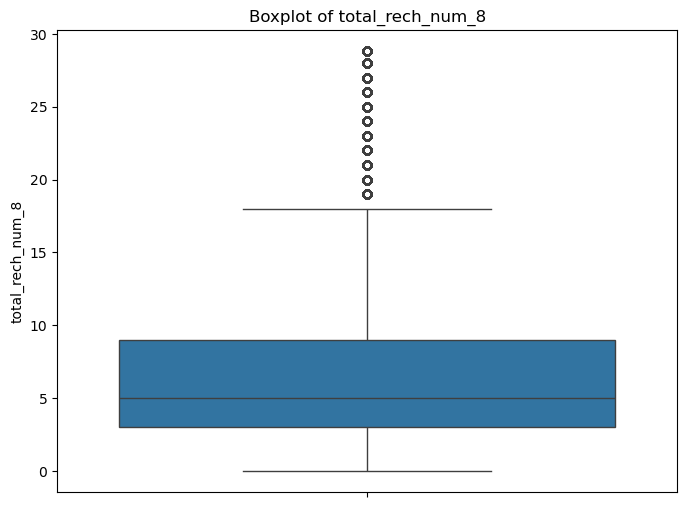

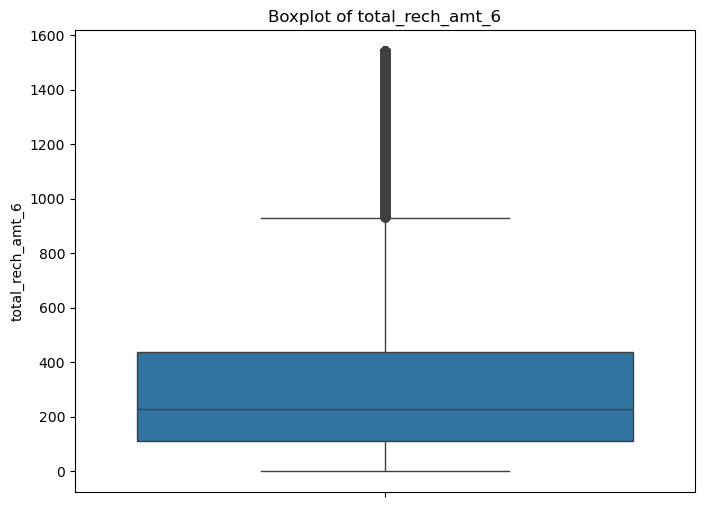

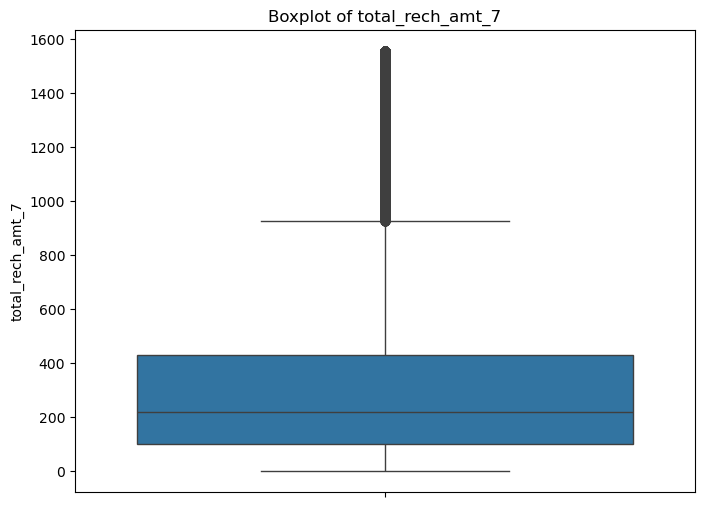

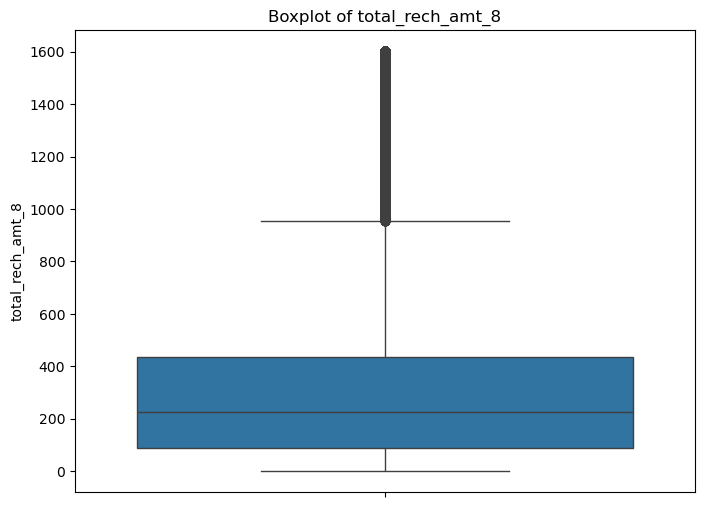

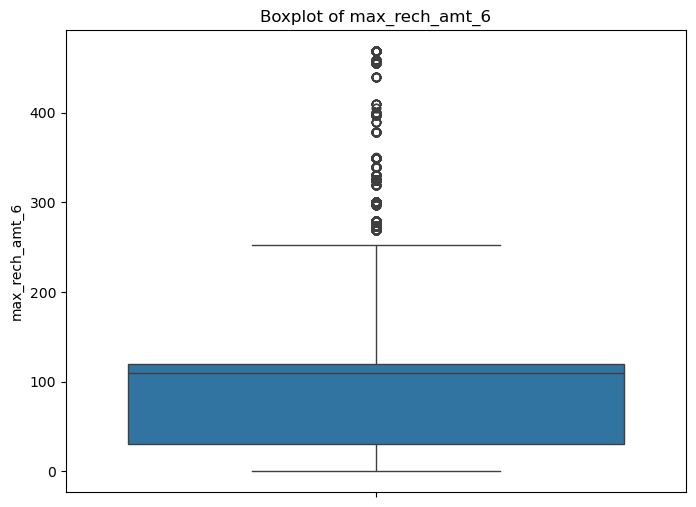

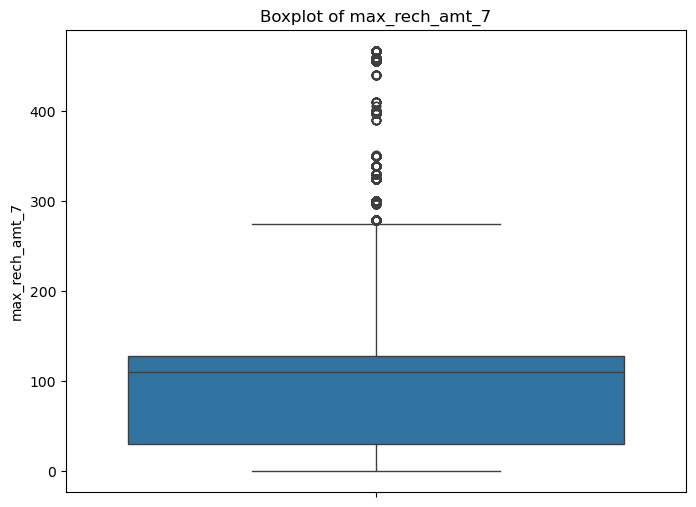

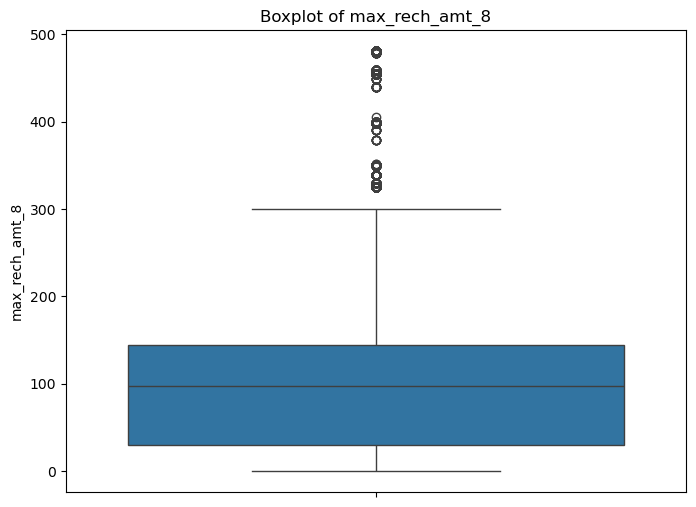

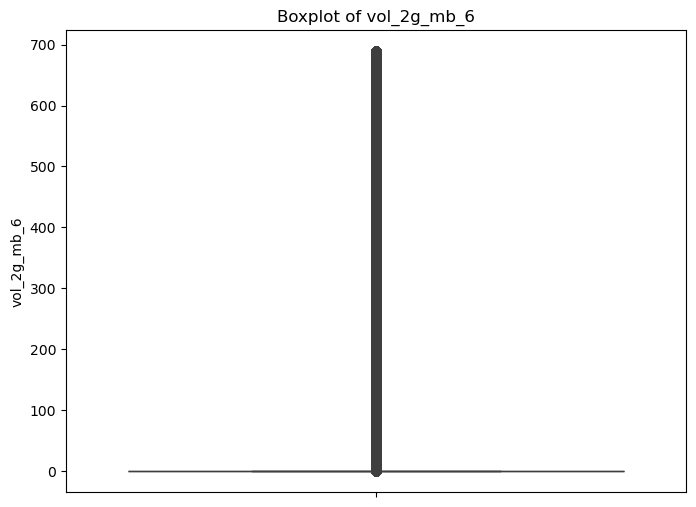

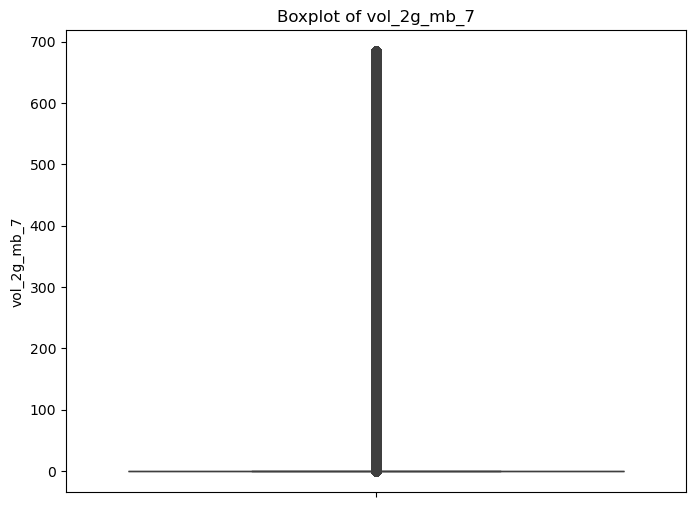

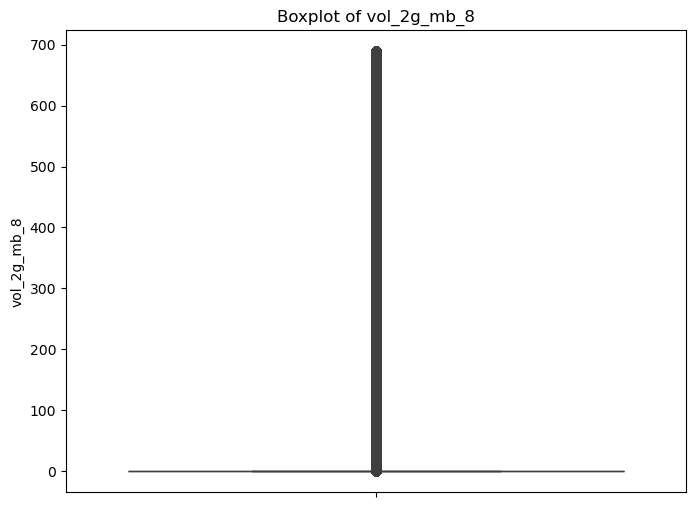

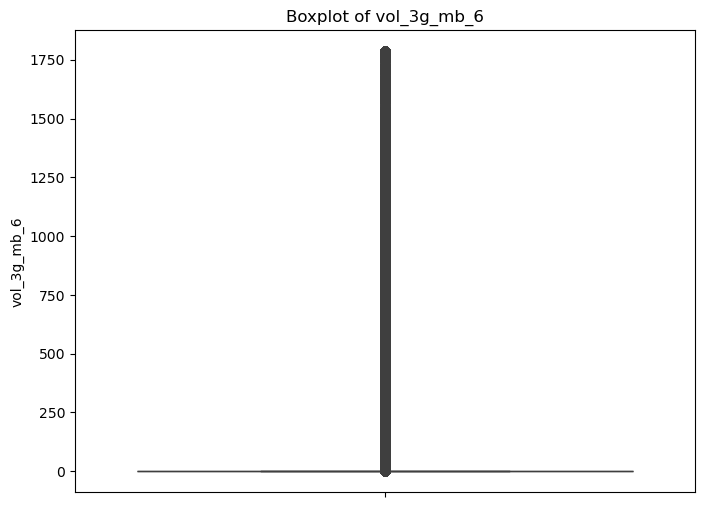

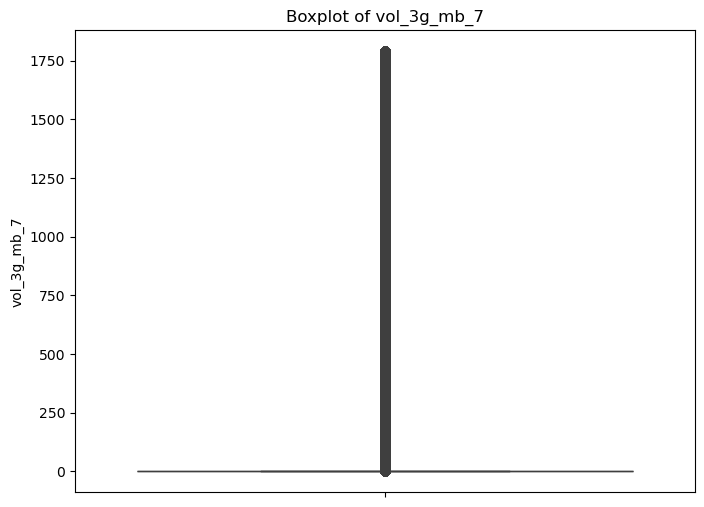

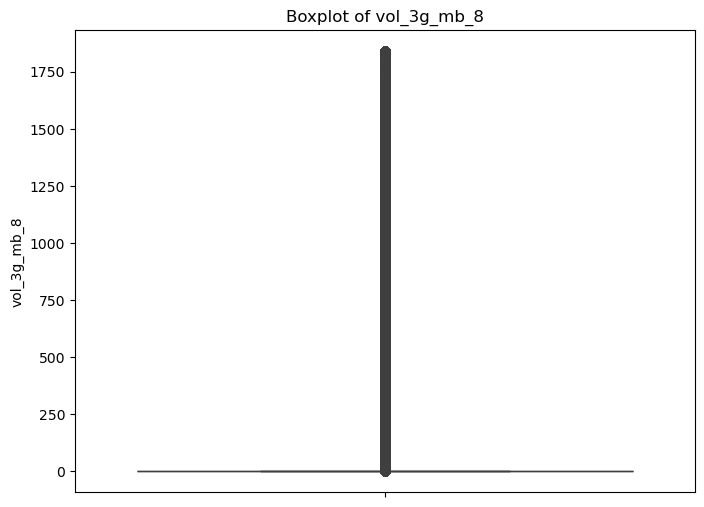

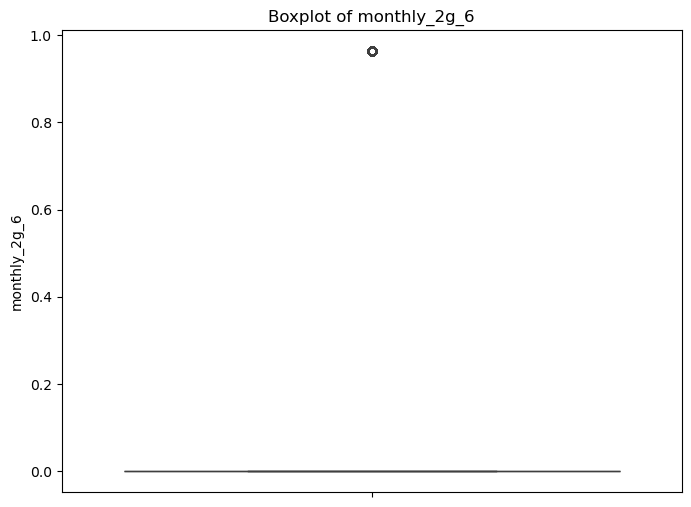

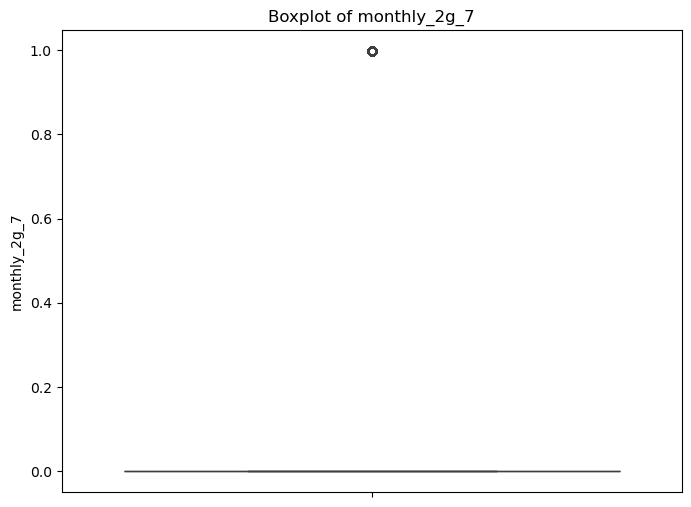

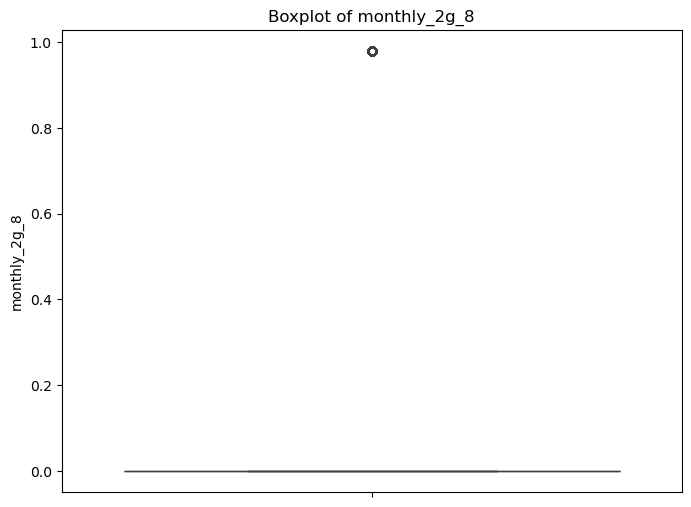

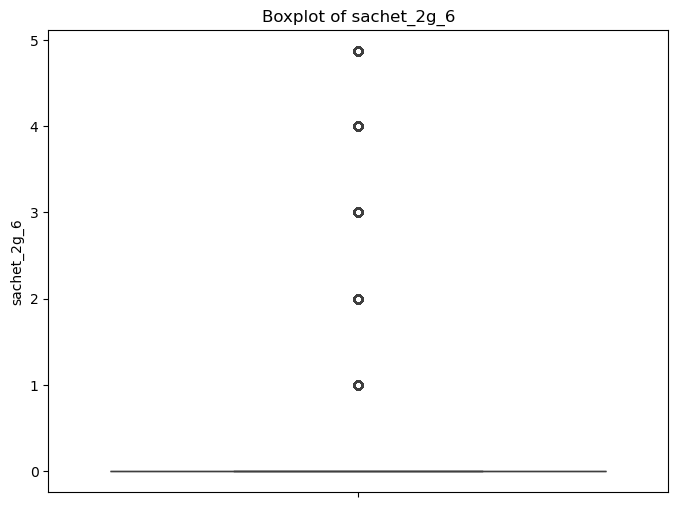

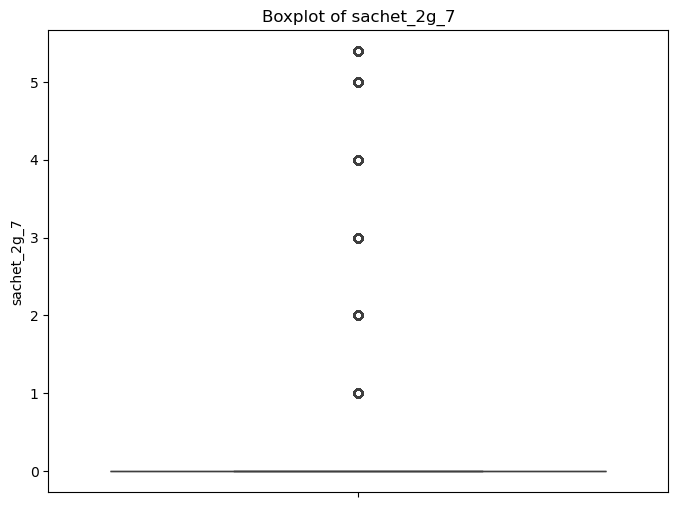

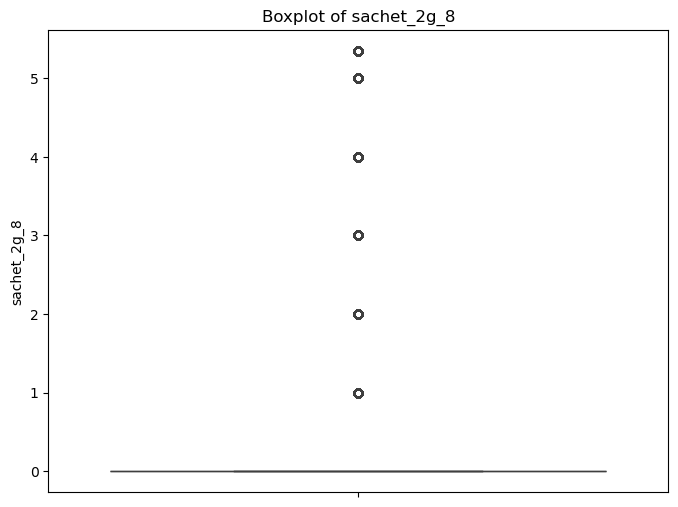

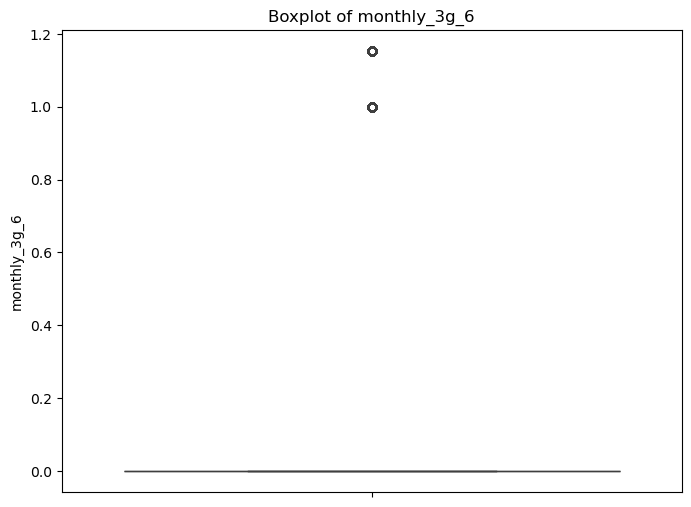

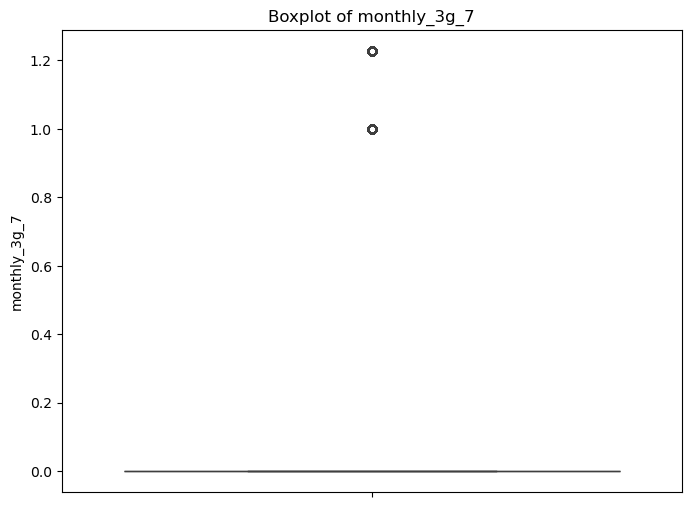

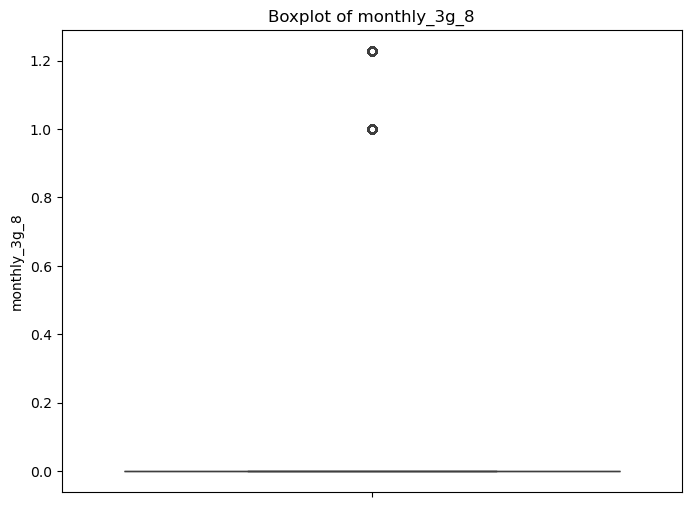

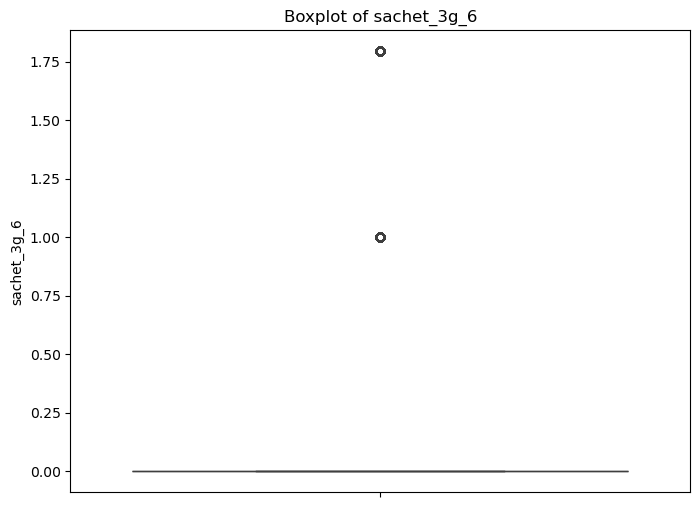

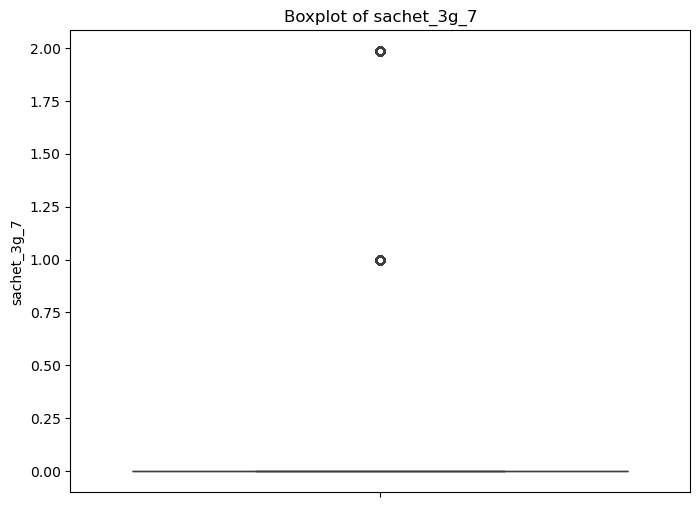

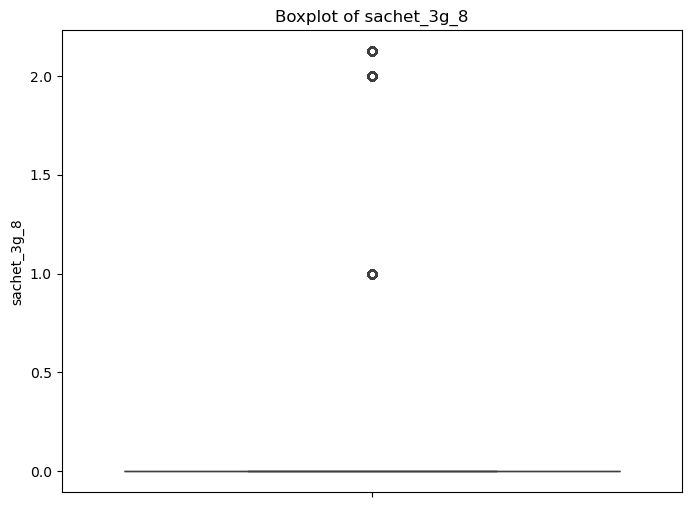

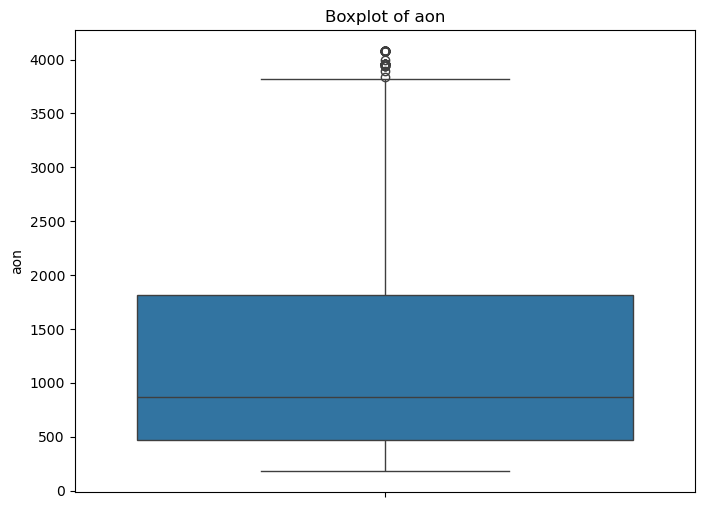

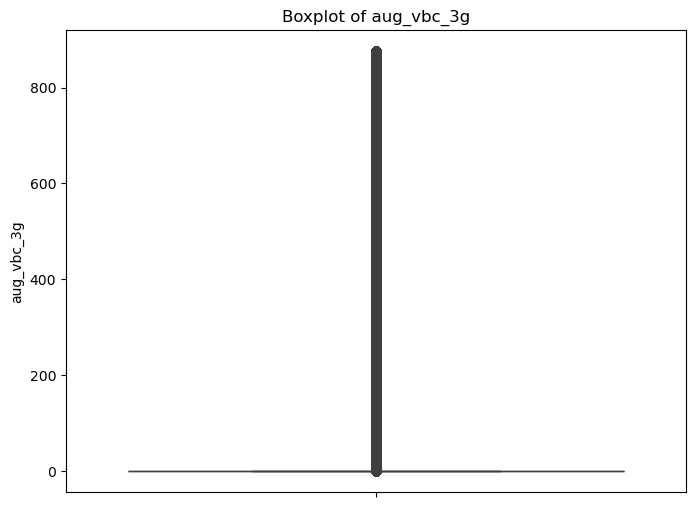

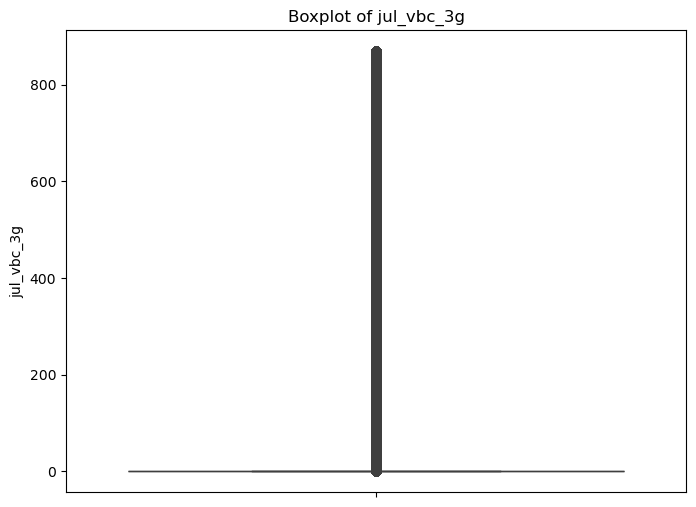

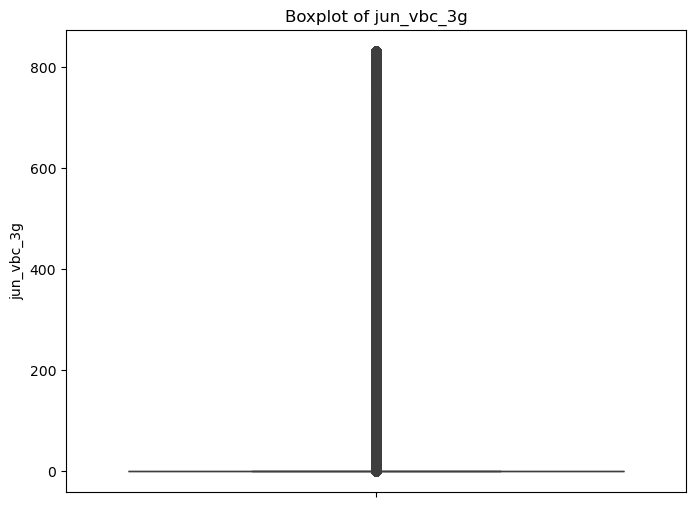

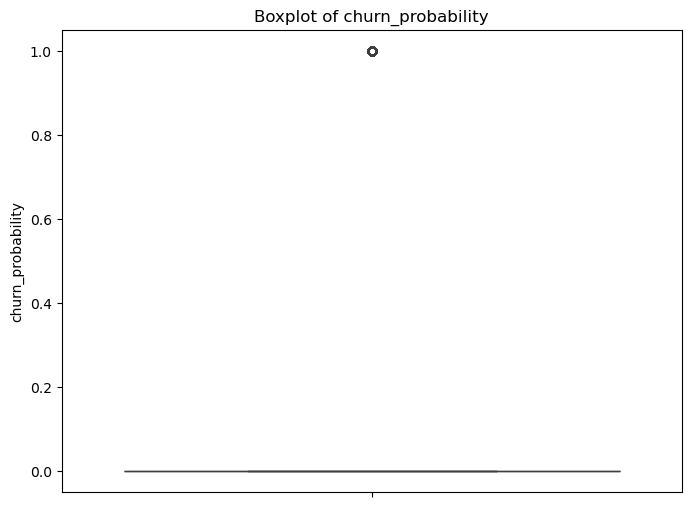

In [213]:
## Creating box plots for various columns.

for i in telecom_vis.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(telecom_vis[i])
    plt.title(f'Boxplot of {i}')
    plt.show

**Inferences from Uni-variate analysis:**

- Average Revenue is mostly distributed near to 0 for all 3 months, its 25th percentile is above 0 mark and very few values lies in negative which is good for company.
- Total incomming and outgoing is highly distributed at zero mark with skewness towards right side, 25th to 75th percentile value lies between 5 to 300 as seen on box plot for 6th, 7th and 8th month.
- Most of the number of recharges are either 3 or 4 and most number of recharges lies between 3 and 9, Total recharge amount lies between 100 and 400.
- max recharge amount has a very uneven distribution with more than 12000 users chosen to have a max amount of little over 100. Its box plot shows that 50th and 75th percentile are very close to each other except for 8th month.
- Boxplot and histogram shows there are very few users who use 2g and 3g data, histogram is mostly distributed at 0 for all 3 months also vey few people recharge for 2g or 3g monthly services.
- people uses sachet for 2g and 3g where 3g sachets are mostly used once for all 3 months while different values of 2 sachets are used. for both 2g and 3g sachets values are mostly distributed at zero.
- Age on network histogram shows most people are with aon 500, count of people are decreasing as aon increases. most of the people are distributed between aon 500 to 1800.

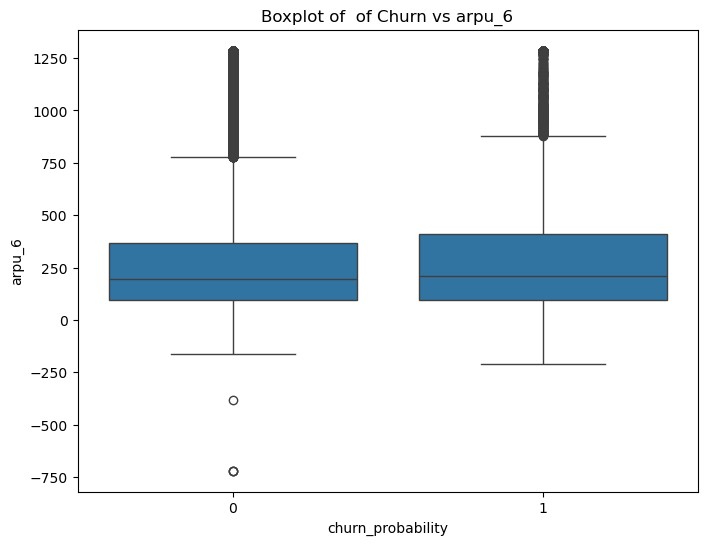

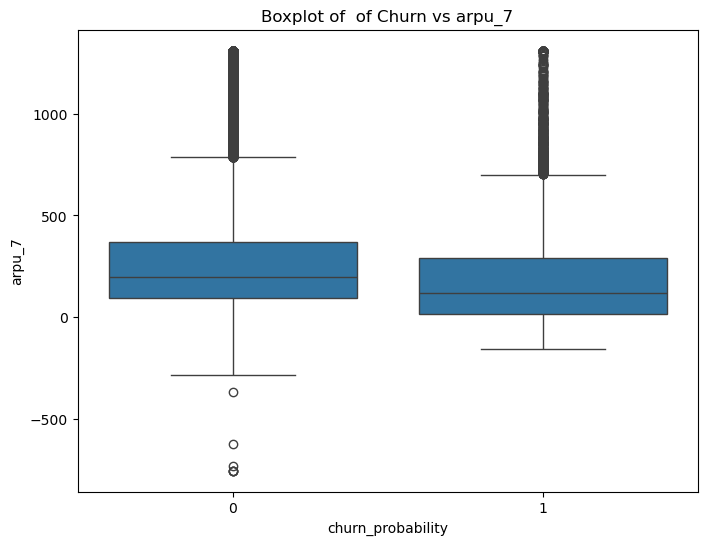

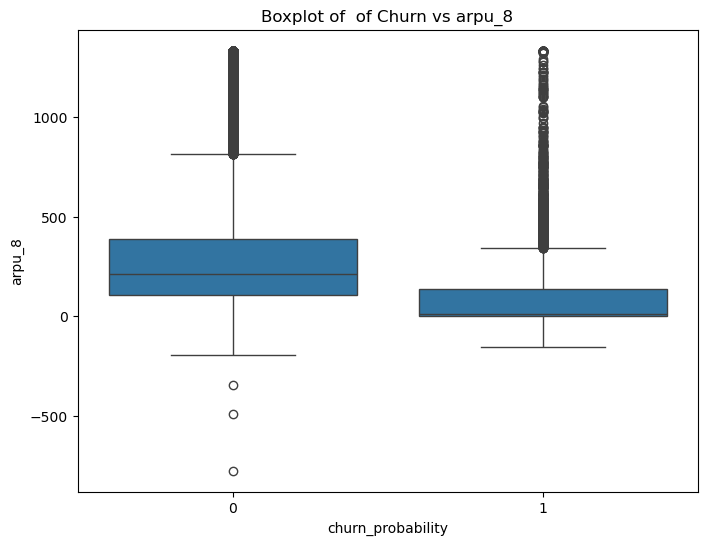

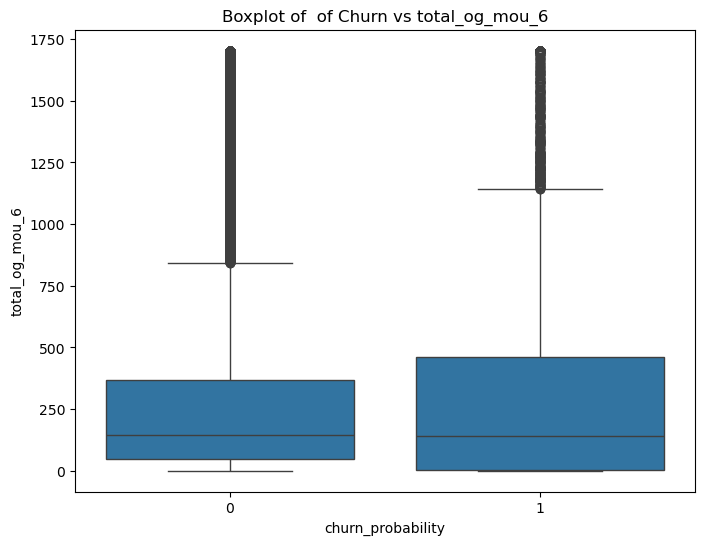

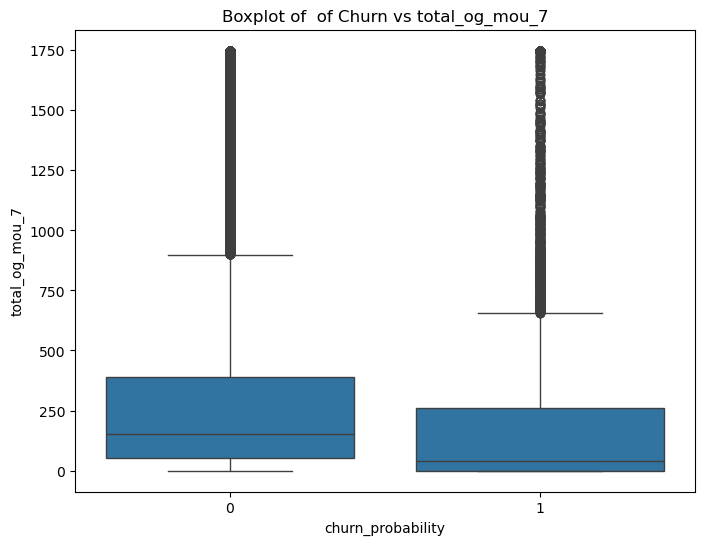

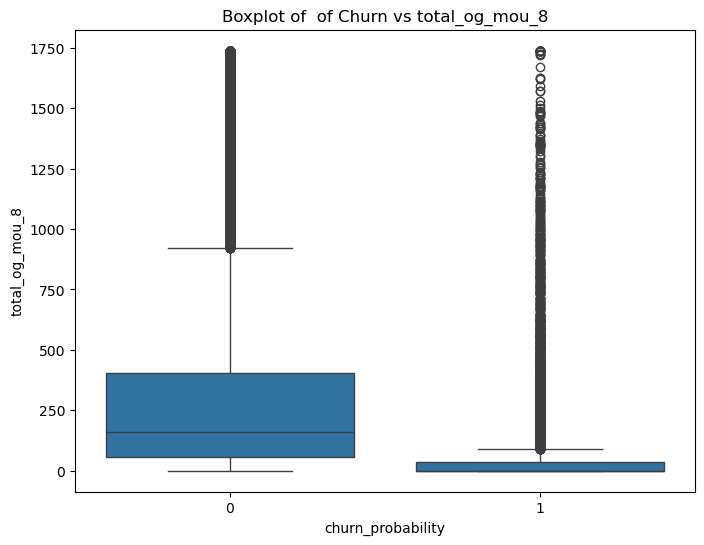

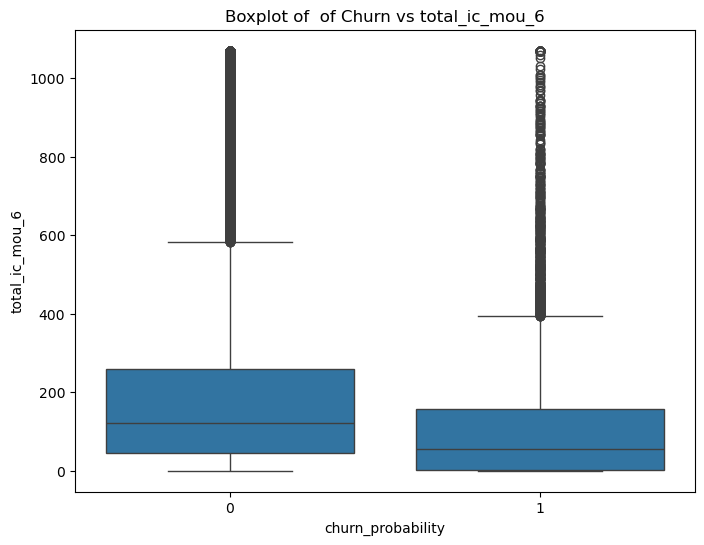

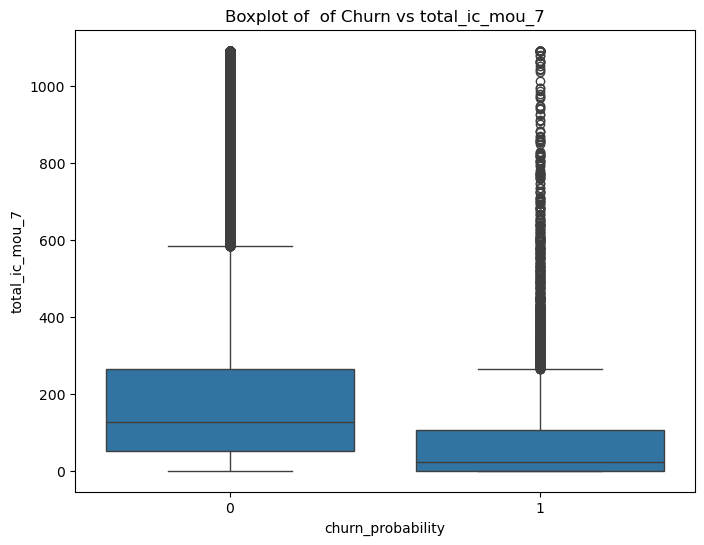

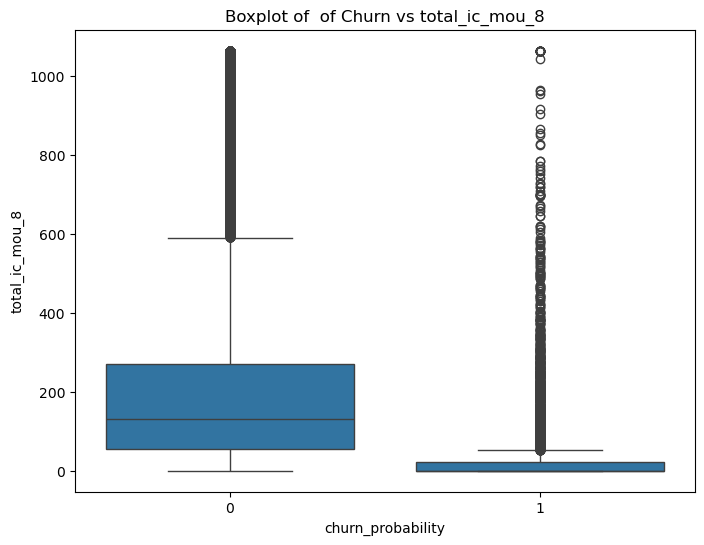

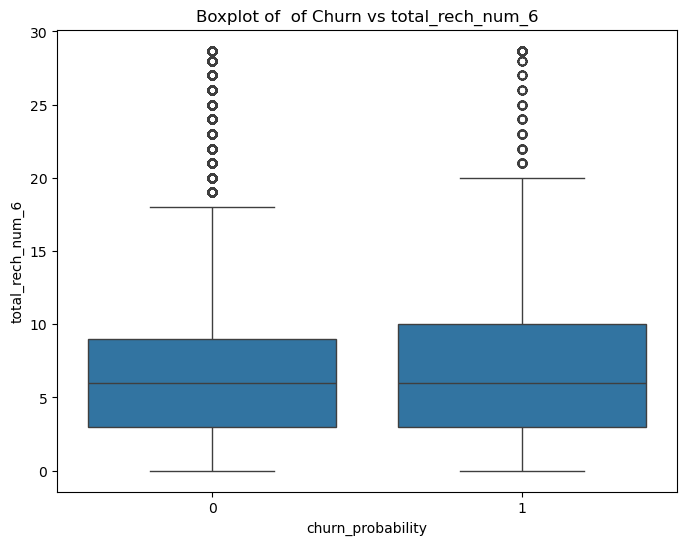

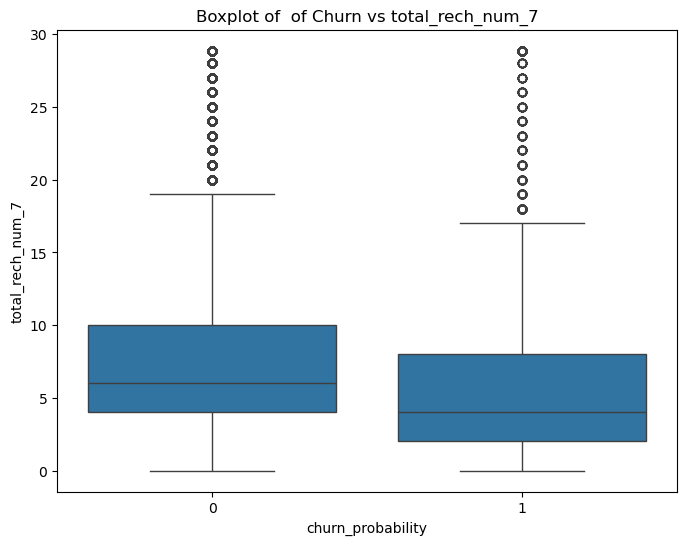

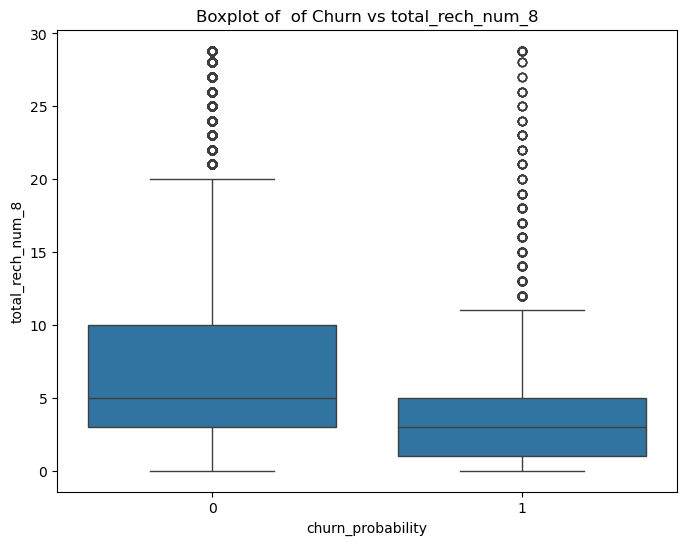

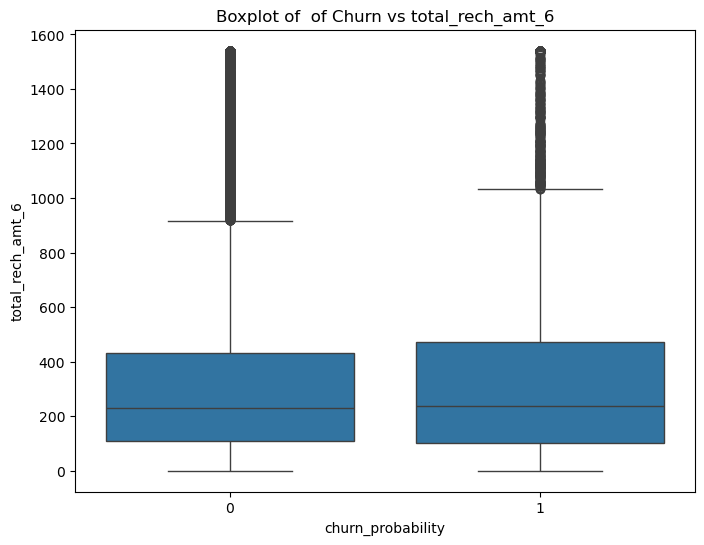

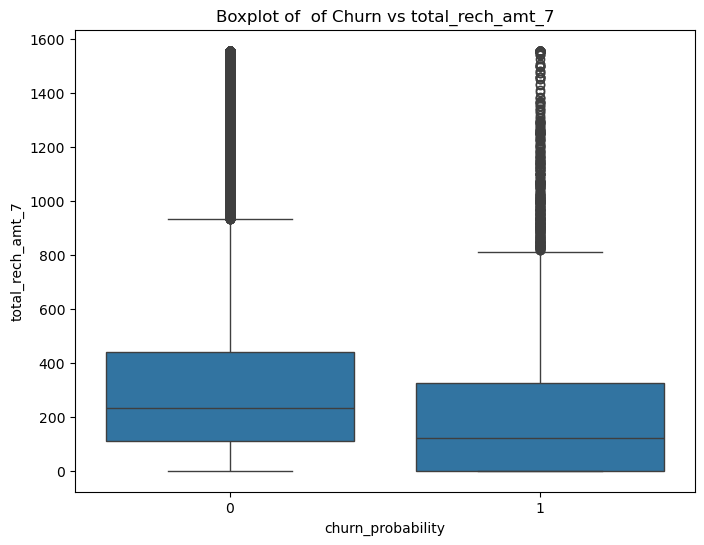

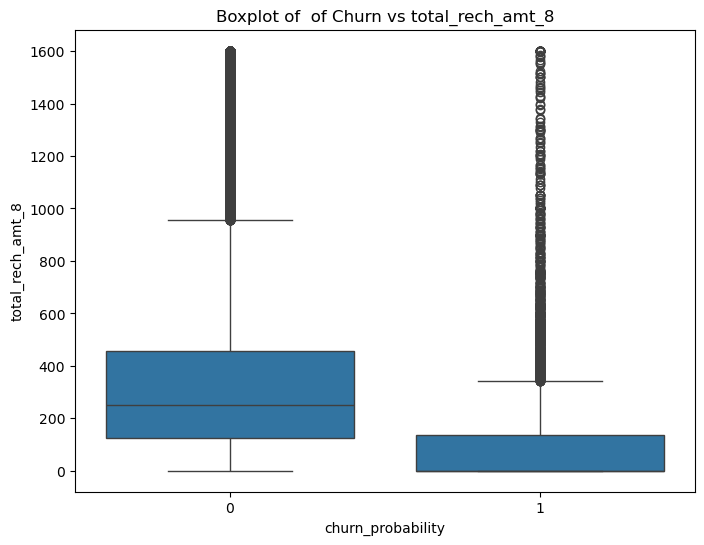

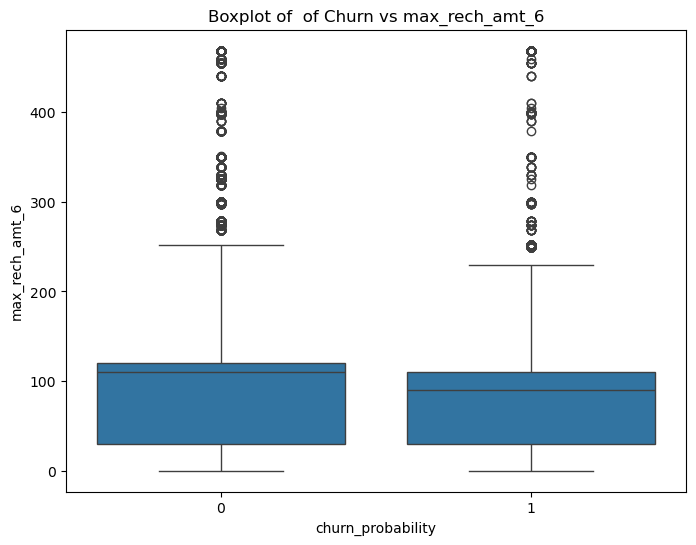

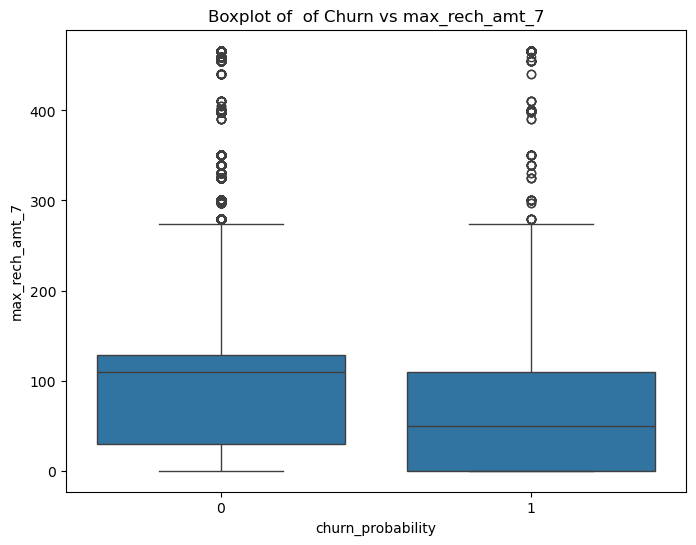

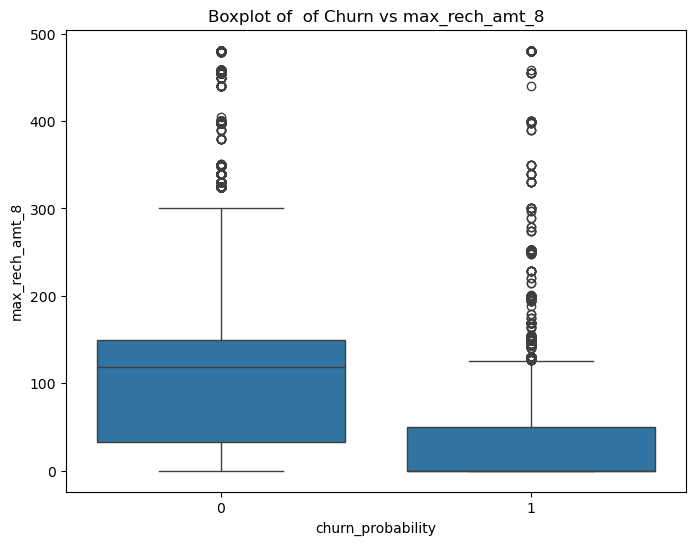

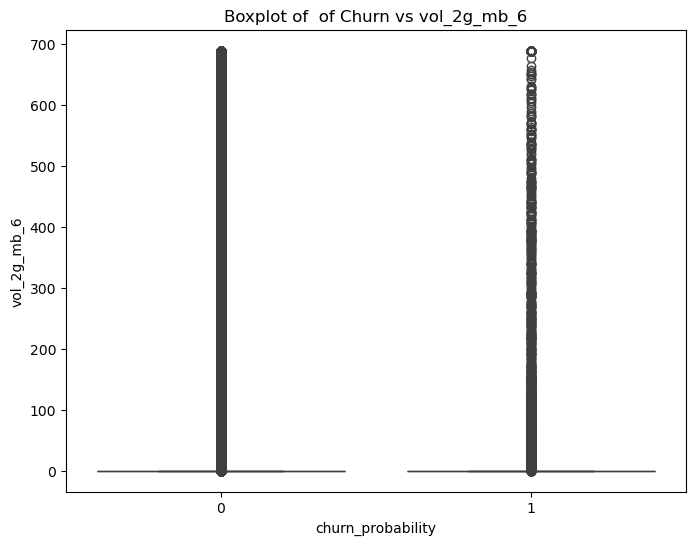

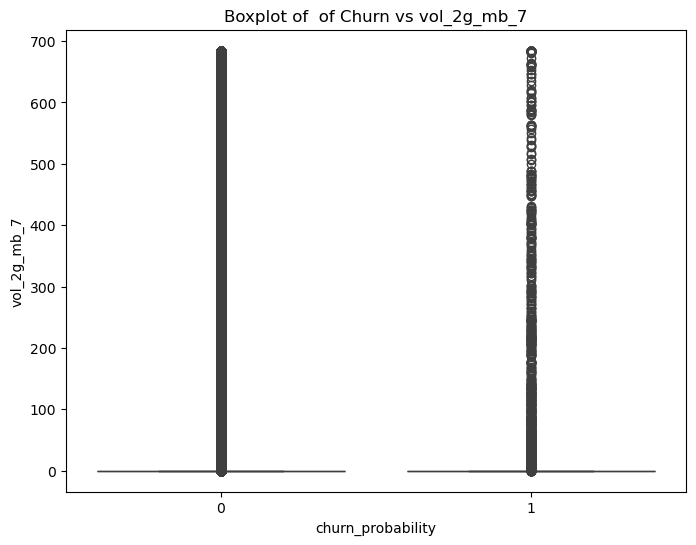

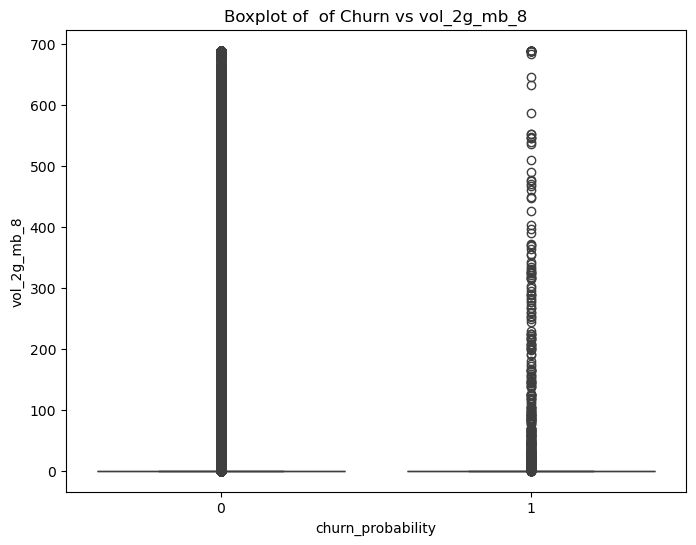

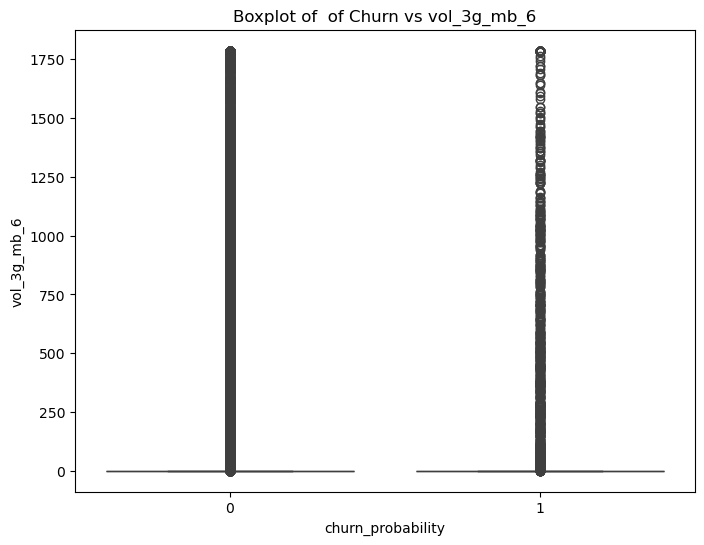

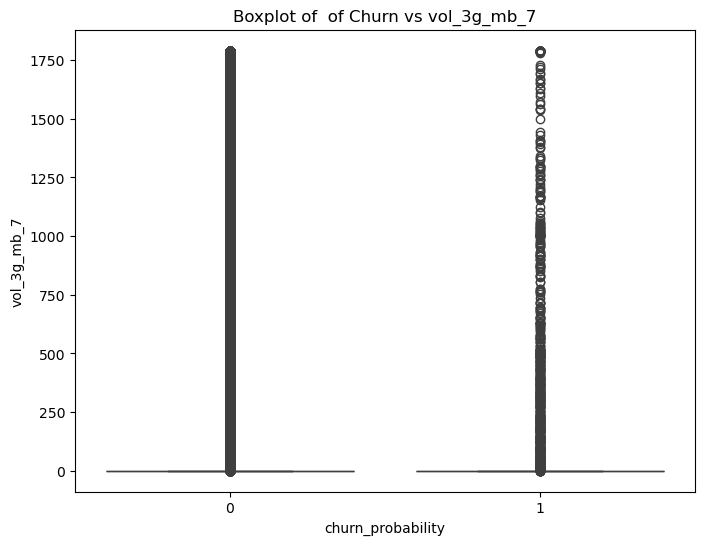

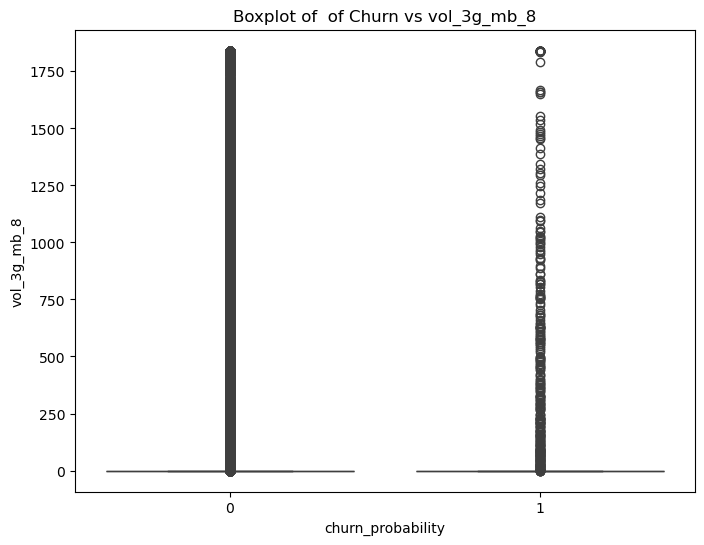

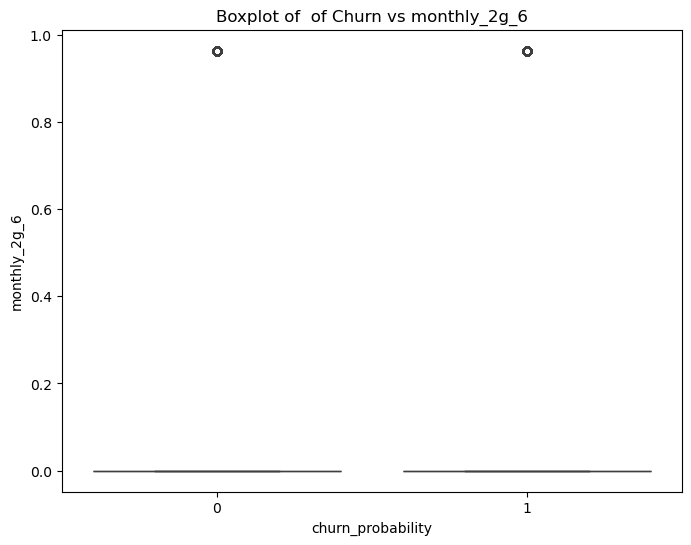

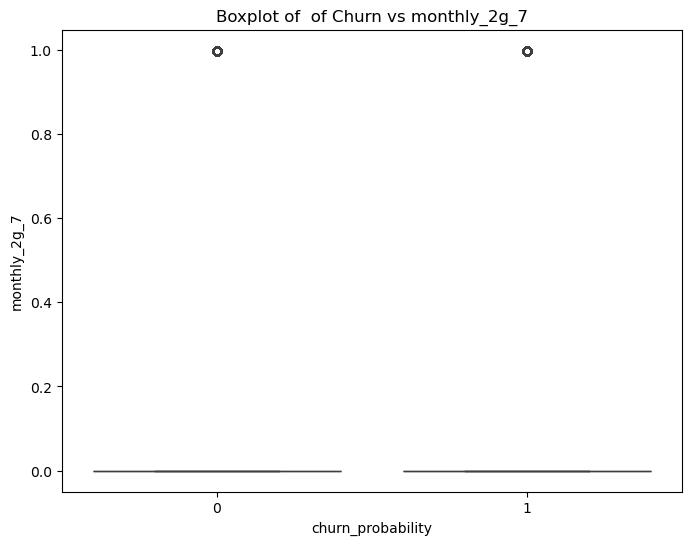

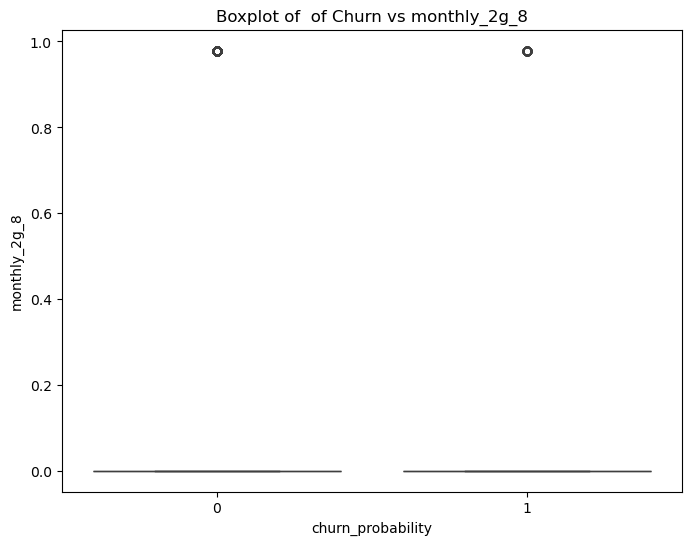

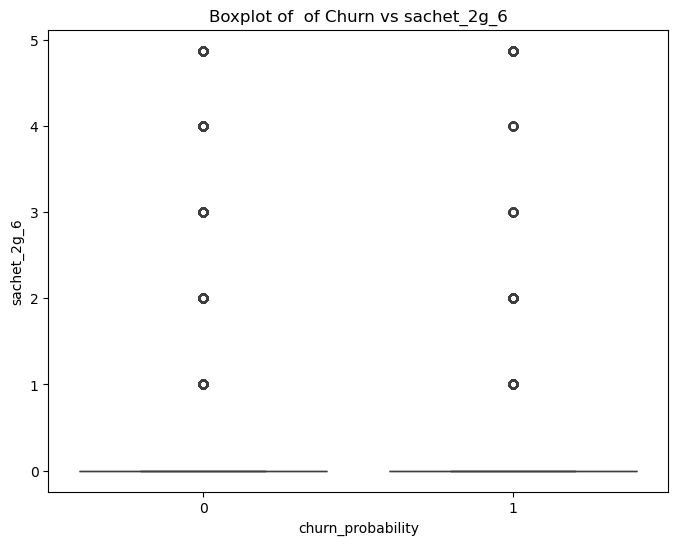

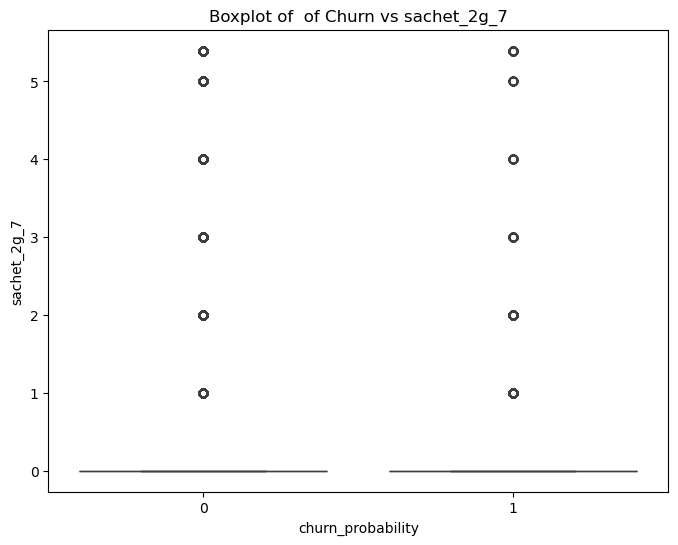

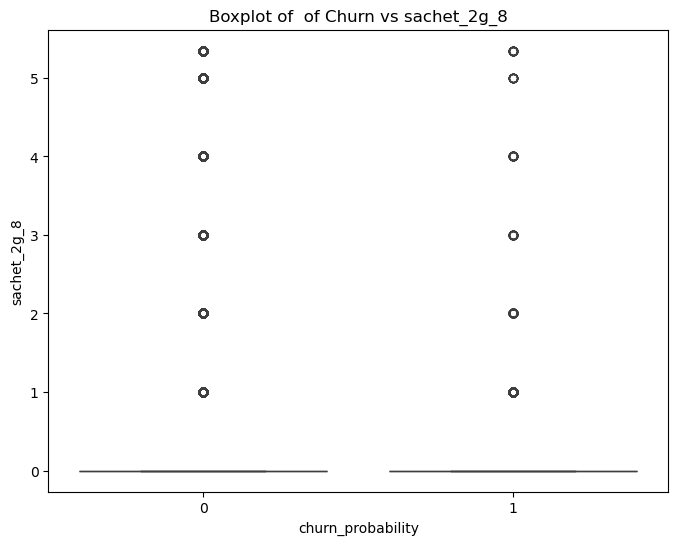

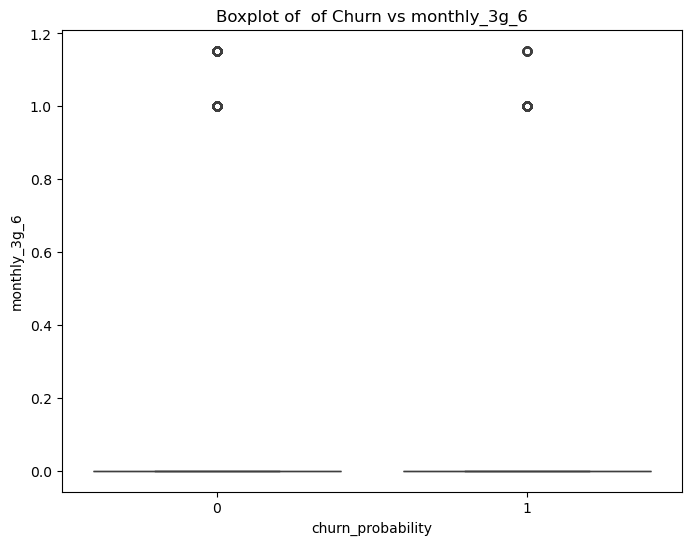

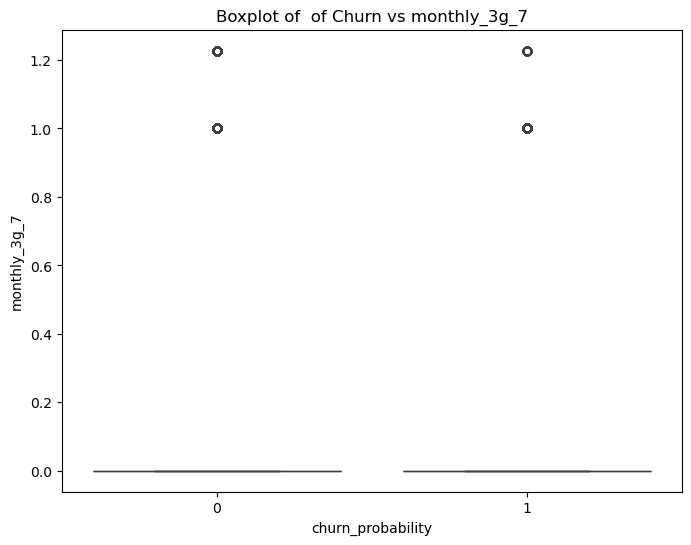

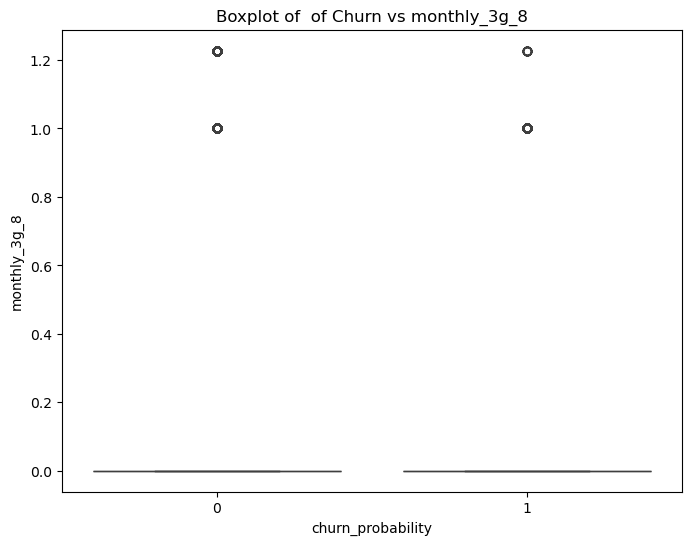

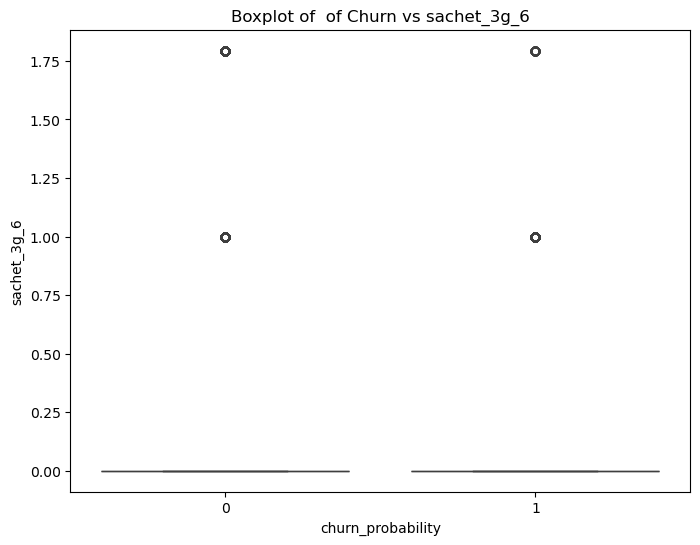

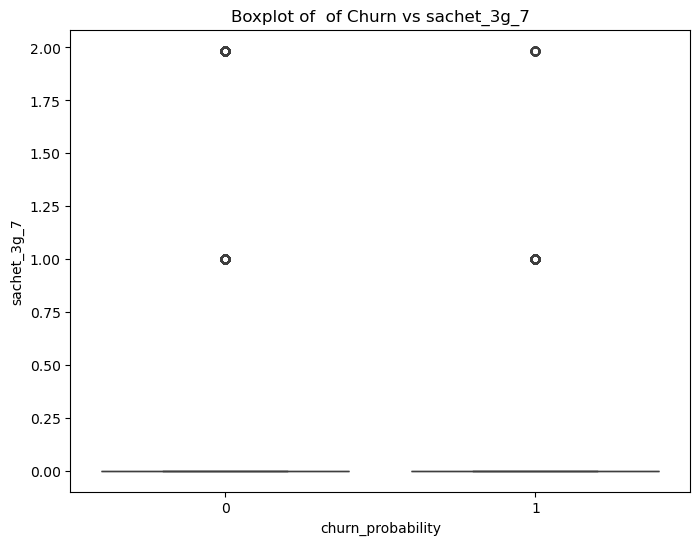

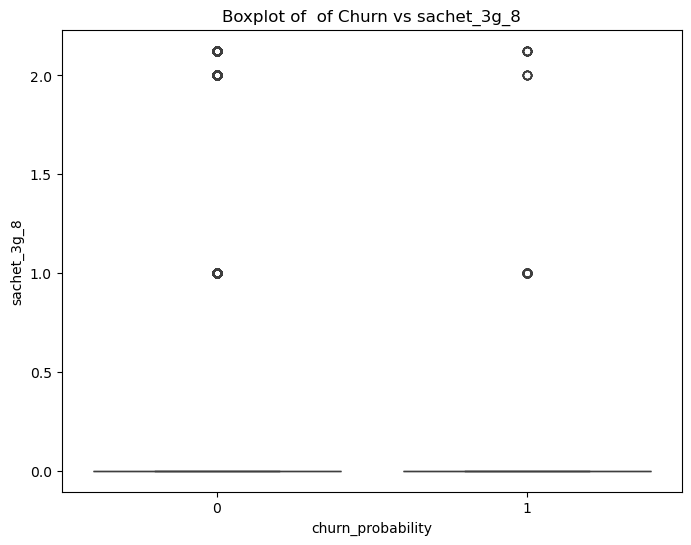

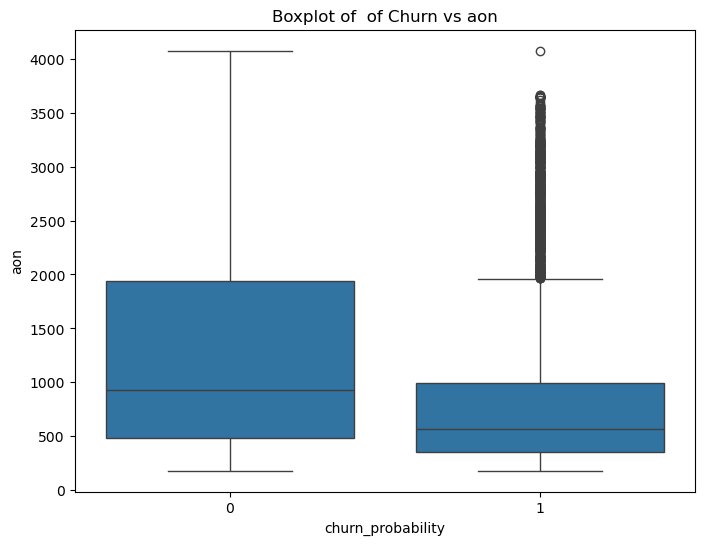

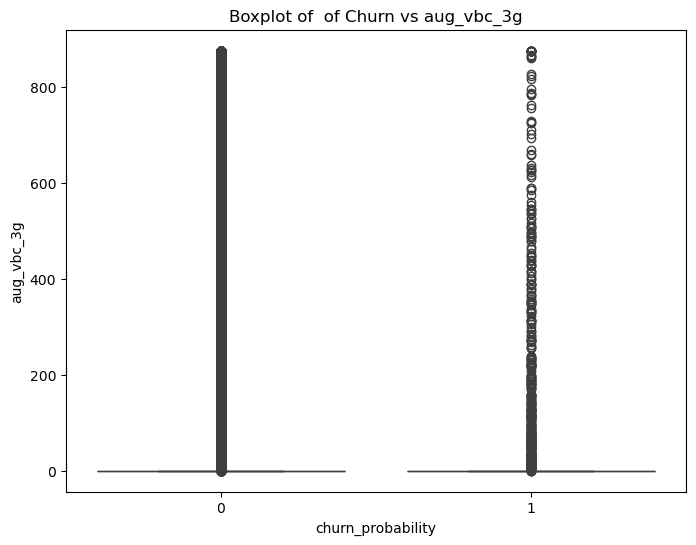

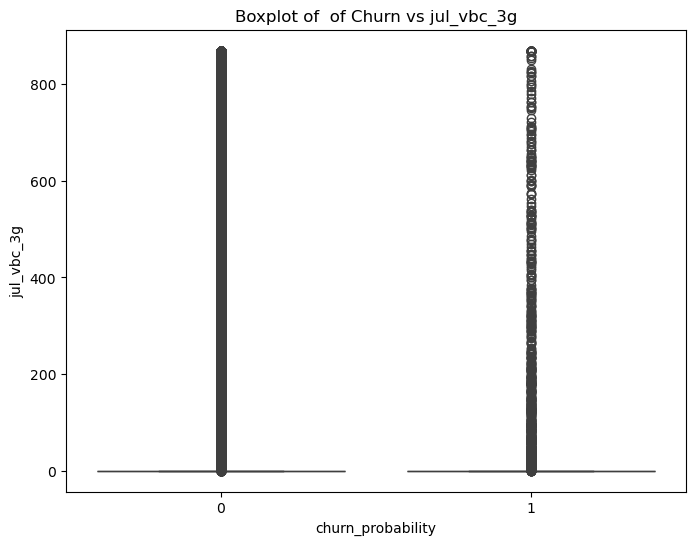

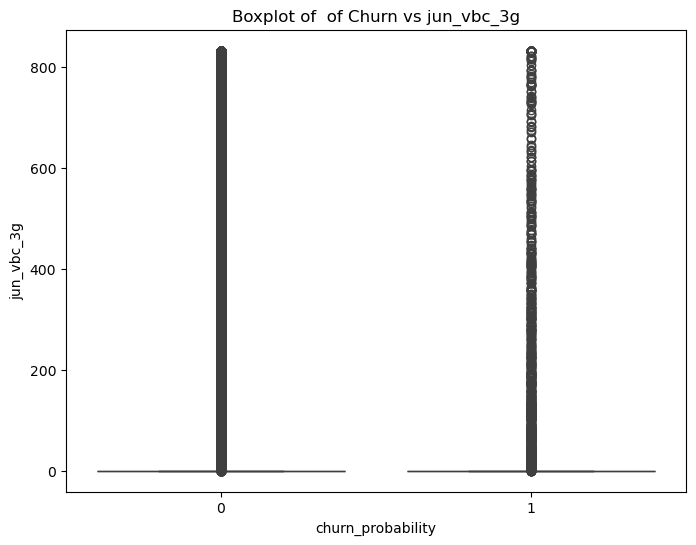

In [215]:
## Creating boxplots of different variables with churn status on X axis.

for i in telecom_vis.columns:
    if i == 'churn_probability':
        continue
    else:
        plt.figure(figsize=(8,6))
        sns.boxplot(data=telecom_vis, y=telecom_vis[i], x=telecom_vis['churn_probability'])
        plt.title(f'Boxplot of  of Churn vs {i}')
        plt.show

**Inferences from Bi-variate analysis:**

- We can see Average revenue per user decreases as month passes for churn users but almost remains same for non churn users while median value was same initially.
- Total outgoing initially had an higher range or 25th and 75th percentile for outgoing calls in case of churn users but dcresased as the month passes. Total incomming also decreased with passing of month but its median was lower than non churn users initially.
- Total recharge numbers, amount max amount were initally higher for churn users, but decreased significantly with passing of month. initially total recharge number, amount and max recharge amount were higher for churn users at month 6th.
- Age on network is relatively lower for churned users compared to non churn.

<Axes: >

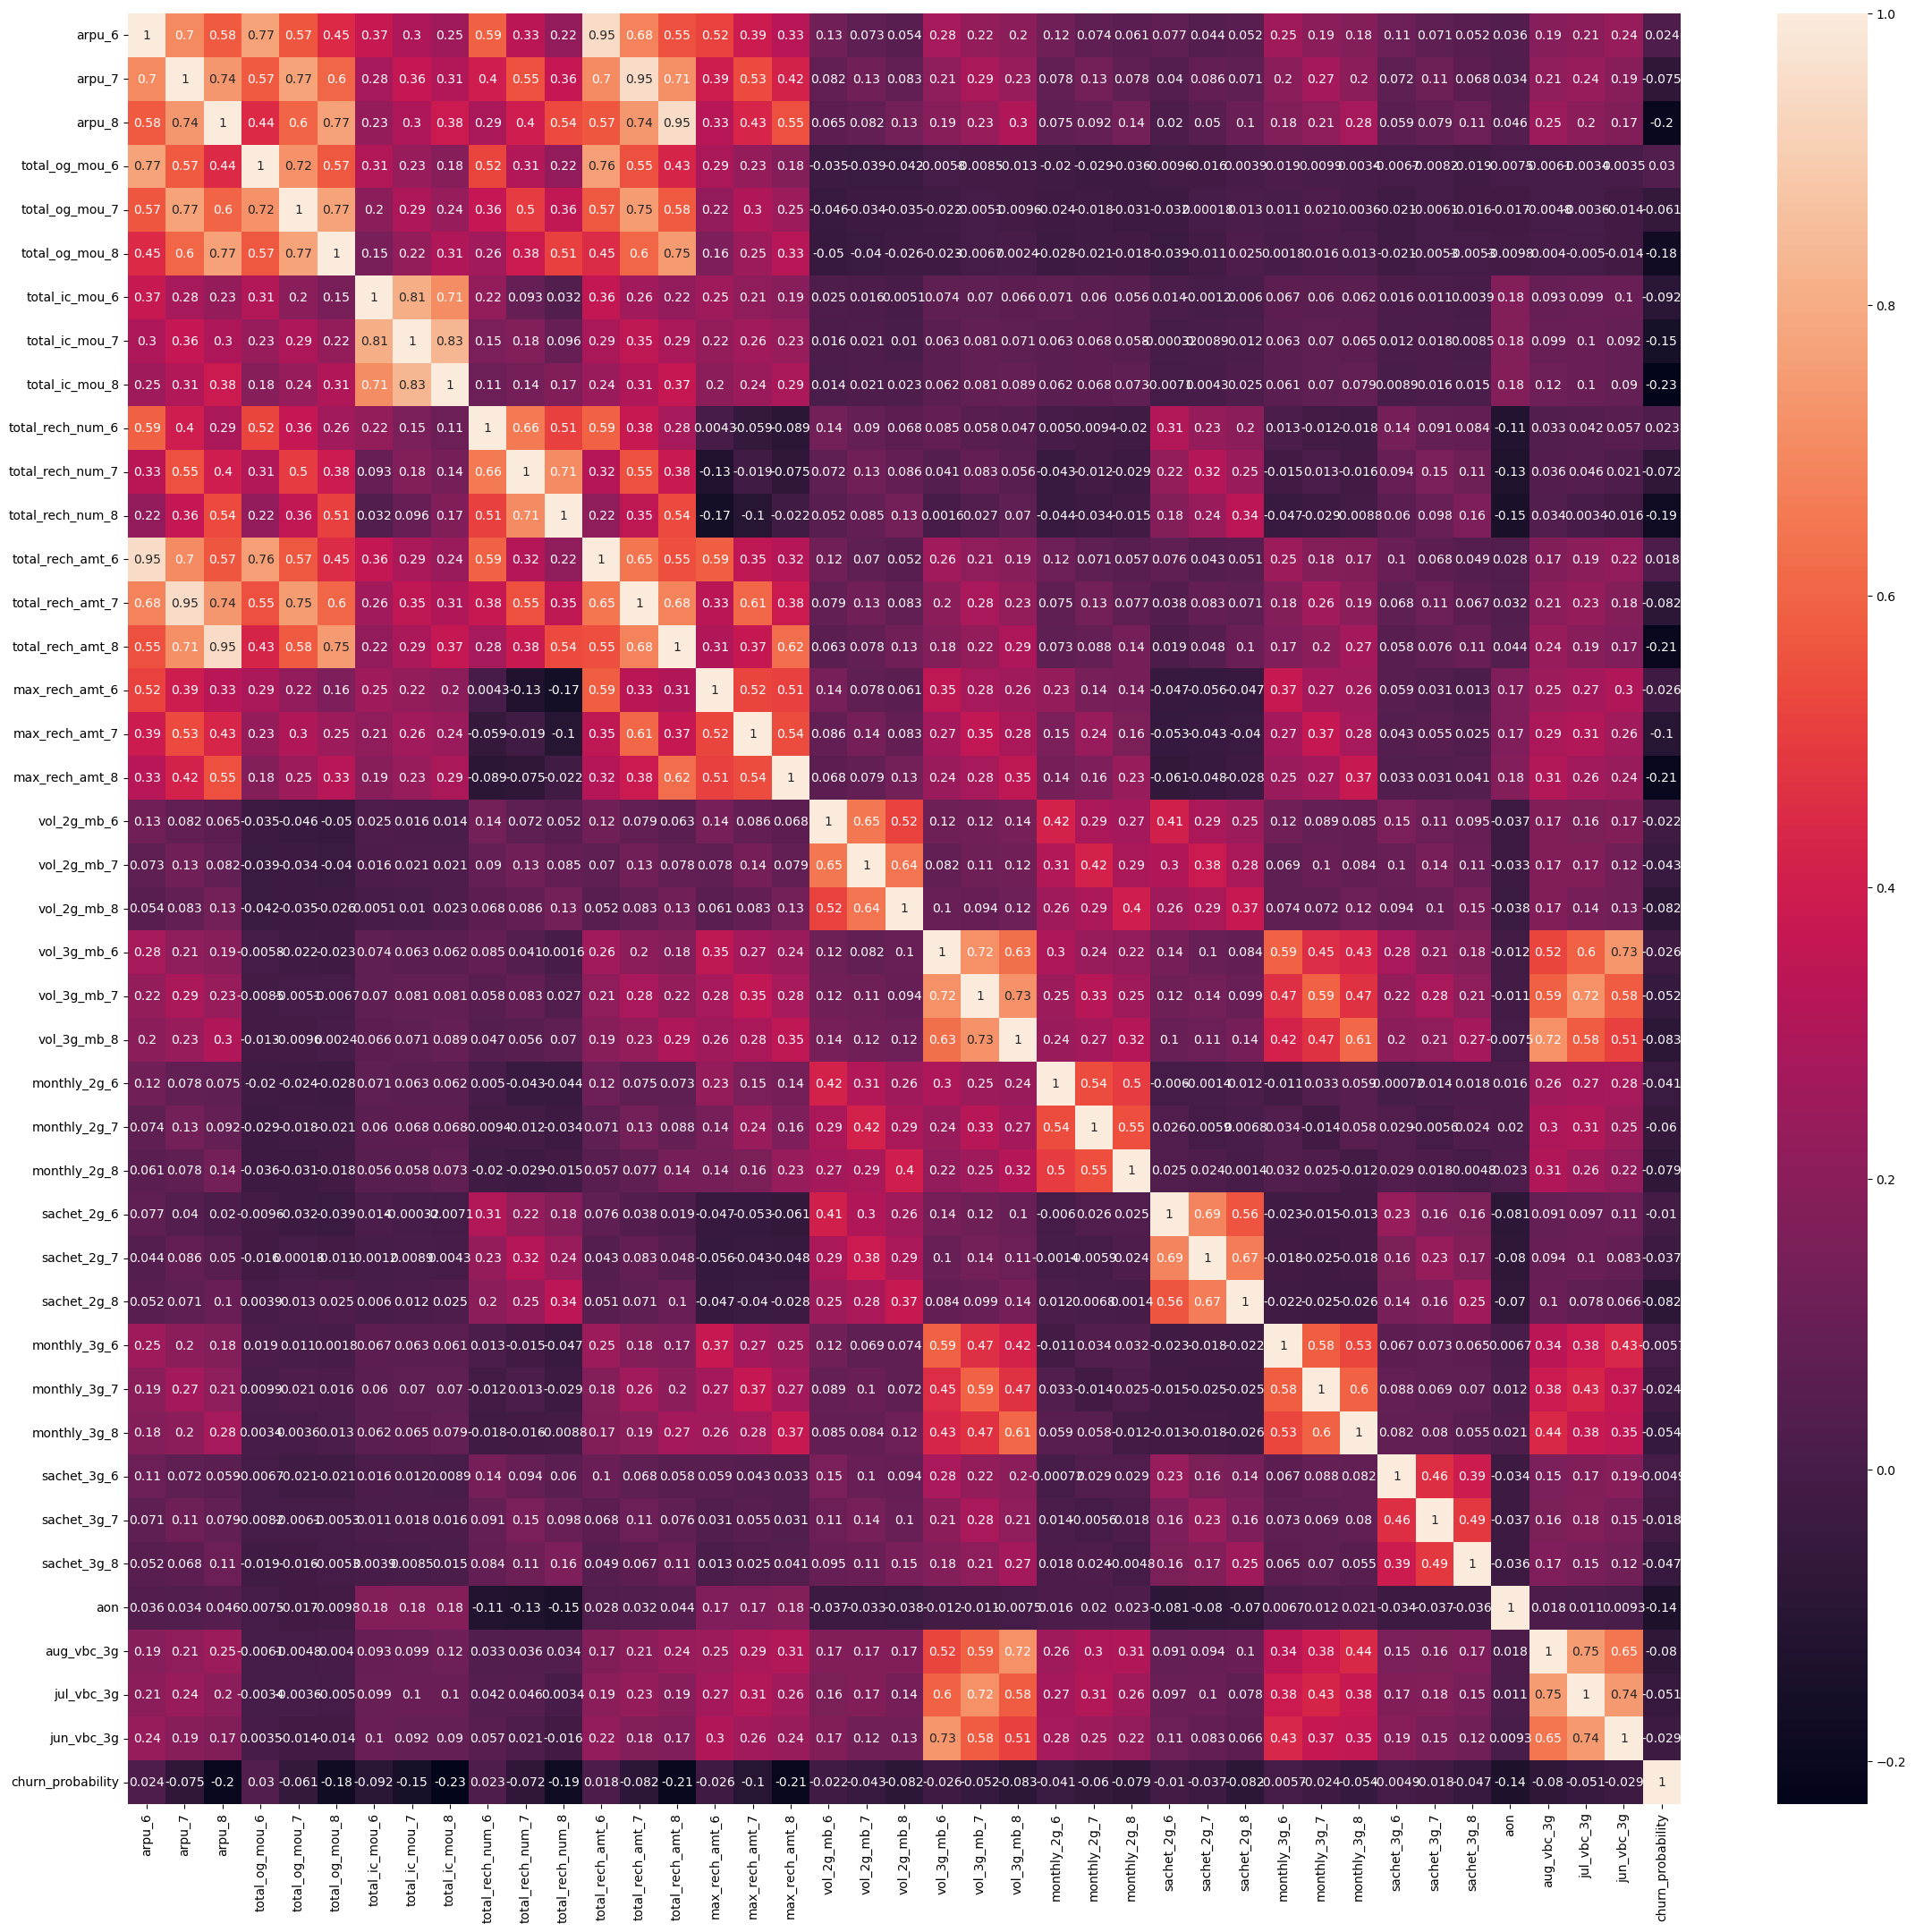

In [219]:
## Creating Heatmap for all the data
plt.figure(figsize=(28,26))
sns.heatmap(telecom_vis.corr(), annot=True)

**Inferences from Multivariate analysis**

- There is high corellation between 6 variables Average revenue for month 6th, 7th and 8th and total outgoing calls for month 6th,7th and 8th.
- total recharge number and total recharge amount for all three months has significant correlation with average revenue and total outgoing minutes for all three months.
- age on network and total recharge number have some negative correlation.
- top left quadrant of the heatmap show area of significantly higher corelation while most of the area have weak corelation only.

### PREPROCESSING OF DATA

In [56]:
## Creating seperate dataset for predictor and response variables.

X = telecom_filtered1.drop(['churn_probability'], axis=1)
y = telecom_filtered1['churn_probability']

In [58]:
## Splitting data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
## Seperating IP for train and test sets as it is not required for analysis but will be required for updating results in kaggle platform.
X_train_ID = X_train.pop('id')

In [62]:
X_test_ID = X_test.pop('id')

In [64]:
telecom_test_ID = telecom_test_filtered1.pop('id')

In [66]:
print(X_train.shape)
print(X_test.shape)

(55999, 40)
(14000, 40)


In [68]:
## Creating a scalar object and scaling trian and test set using standard scaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
telecom_test_filtered1.shape

(30000, 40)

In [72]:
## Scaling provided test data and changing it into dataframe with original columns

telecom_test_scaled = scaler.transform(telecom_test_filtered1)
telecom_test_scaled = pd.DataFrame(telecom_test_scaled, columns=telecom_test_filtered1.columns)
telecom_test_scaled.head()

arpu_6    arpu_7    arpu_8  total_og_mou_6  total_og_mou_7  \
0 -0.696400 -0.776986 -0.768167       -0.524181       -0.624855   
1  0.525051  0.922788  0.335278        0.686798        0.948868   
2  0.205466  0.618184  1.769836       -0.767319       -0.759866   
3 -0.879577 -0.376580 -0.917236       -0.647363       -0.225955   
4  0.118335  0.510229  0.530566        0.594055        0.885008   

   total_og_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
0       -0.599788       -0.659005       -0.655350       -0.684697   
1        0.332969        0.481022        0.656528        0.420565   
2       -0.750896       -0.845861       -0.848357       -0.848009   
3       -0.688278        1.642363        1.466483        1.625228   
4        1.282783       -0.605273       -0.334691       -0.130715   

   total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  \
0         -0.395510         -0.418681         -0.489183         -0.680345   
1         -0.395510         -0.585054         -0.327016          0.569380   
2         -0.228304          0.246812         -0.327016          0.569380   
3         -0.729922         -0.418681         -0.813519         -0.658310   
4          0.607726         -0.085935          0.159488          0.116079   

   total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  \
0         -0.700363         -0.787540       -0.556358       -0.762886   
1          0.583886          0.573089        1.658942        1.651159   
2          2.150042          2.119259        2.212767        4.394393   
3         -0.167869         -0.973080        0.108232        0.553866   
4          0.552563          0.715337       -0.113298        0.334407   

   max_rech_amt_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  \
0       -0.766285    -0.315063    -0.312859    -0.309337    -0.310627   
1        1.538941    -0.315063    -0.312859    -0.309337    -0.310627   
2        4.158516    -0.315063    -0.312859    -0.309337    -0.310627   
3       -1.080634    -0.315063    -0.312859    -0.309337    -0.310627   
4        0.281545    -0.315063    -0.312859    -0.309337    -0.310627   

   vol_3g_mb_7  vol_3g_mb_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  \
0    -0.317491    -0.324948     -0.280106     -0.283906     -0.281808   
1    -0.317491    -0.324948     -0.280106     -0.283906     -0.281808   
2    -0.317491    -0.324948     -0.280106     -0.283906     -0.281808   
3    -0.317491    -0.324948     -0.280106     -0.283906     -0.281808   
4    -0.317491    -0.324948     -0.280106     -0.283906     -0.281808   

   sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  \
0    -0.318222    -0.321808      -0.3297     -0.245872     -0.244132   
1    -0.318222    -0.321808      -0.3297     -0.245872     -0.244132   
2    -0.318222    -0.321808      -0.3297     -0.245872     -0.244132   
3    -0.318222    -0.321808      -0.3297     -0.245872     -0.244132   
4    -0.318222    -0.321808      -0.3297     -0.245872     -0.244132   

   monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8       aon  aug_vbc_3g  \
0     -0.252824    -0.200124    -0.195354     -0.19551  0.498361   -0.320758   
1     -0.252824    -0.200124    -0.195354     -0.19551  1.383463   -0.320758   
2     -0.252824    -0.200124    -0.195354     -0.19551 -0.990841    2.705745   
3     -0.252824    -0.200124    -0.195354     -0.19551  0.026868   -0.320758   
4     -0.252824    -0.200124    -0.195354     -0.19551 -0.796140   -0.320758   

   jul_vbc_3g  jun_vbc_3g  
0   -0.310927   -0.302319  
1   -0.310927   -0.302319  
2    4.165220    1.226604  
3   -0.310927   -0.302319  
4   -0.310927   -0.302319

In [84]:
## Changing splitted train and test data set into dataframe with original columns

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.head()

arpu_6    arpu_7    arpu_8  total_og_mou_6  total_og_mou_7  \
0 -0.391809 -0.458390 -0.098941       -0.309578       -0.391633   
1 -0.454874 -0.820009 -0.831126       -0.450558       -0.623721   
2 -0.785832 -0.754418 -0.875860       -0.669921       -0.605166   
3 -0.517200 -0.247179 -0.364786       -0.129698        0.258272   
4  0.757633 -0.505464 -1.008066        0.818707       -0.347076   

   total_og_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
0        0.074750       -0.102380       -0.308771        0.076150   
1       -0.657451        2.042448        0.921447        0.145240   
2       -0.693155       -0.104395       -0.120106       -0.787747   
3        0.021363       -0.749410       -0.699747       -0.760138   
4       -0.750896        0.489798       -0.572582       -0.848009   

   total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  \
0         -0.228304         -0.585054         -0.813519         -1.004581   
1          0.774932         -0.585054         -0.651351         -0.456843   
2         -0.395510         -0.418681         -0.651351         -0.752747   
3         -0.061098          0.413185         -0.327016         -0.293151   
4          0.273314         -0.751427         -0.975687          1.073047   

   total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  \
0         -0.982271          0.257671       -1.110183       -1.092074   
1         -0.803729         -0.756616       -0.777888       -0.762886   
2         -0.731686         -0.849386       -0.777888       -0.543428   
3         -0.243045         -0.552522        0.108232        0.114948   
4         -0.637716         -0.973080        0.108232        0.114948   

   max_rech_amt_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  \
0        3.089730    -0.315063    -0.312859    -0.309337    -0.310627   
1       -0.766285    -0.315063    -0.312859    -0.309337    -0.310627   
2       -0.766285    -0.315063    -0.312859    -0.309337    -0.310627   
3       -0.556719    -0.315063    -0.312859    -0.309337    -0.310627   
4       -1.080634    -0.315063    -0.312859    -0.309337    -0.310627   

   vol_3g_mb_7  vol_3g_mb_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  \
0    -0.317491    -0.324948     -0.280106     -0.283906     -0.281808   
1    -0.317491    -0.324948     -0.280106     -0.283906     -0.281808   
2    -0.317491    -0.324948     -0.280106     -0.283906     -0.281808   
3    -0.317491    -0.324948     -0.280106     -0.283906     -0.281808   
4    -0.317491    -0.324948     -0.280106     -0.283906     -0.281808   

   sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  \
0    -0.318222    -0.321808      -0.3297     -0.245872     -0.244132   
1    -0.318222    -0.321808      -0.3297     -0.245872     -0.244132   
2    -0.318222    -0.321808      -0.3297     -0.245872     -0.244132   
3    -0.318222    -0.321808      -0.3297     -0.245872     -0.244132   
4    -0.318222    -0.321808      -0.3297     -0.245872     -0.244132   

   monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8       aon  aug_vbc_3g  \
0     -0.252824    -0.200124    -0.195354     -0.19551 -0.866653   -0.320758   
1     -0.252824    -0.200124    -0.195354     -0.19551 -0.740360   -0.320758   
2     -0.252824    -0.200124    -0.195354     -0.19551 -0.656165   -0.320758   
3     -0.252824    -0.200124    -0.195354     -0.19551 -0.591966   -0.320758   
4     -0.252824    -0.200124    -0.195354     -0.19551 -0.757200   -0.320758   

   jul_vbc_3g  jun_vbc_3g  
0   -0.310927   -0.302319  
1   -0.310927   -0.302319  
2   -0.310927   -0.302319  
3   -0.310927   -0.302319  
4   -0.310927   -0.302319

In [86]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled.head()

arpu_6    arpu_7    arpu_8  total_og_mou_6  total_og_mou_7  \
0  3.226732  3.926849  0.559691        0.775866        0.716599   
1  0.915693  0.514194  0.580299        0.129016        0.488556   
2  1.412038  1.191751  1.294892        2.411609        1.785762   
3 -0.112614 -0.354212 -0.513106        0.142159       -0.390731   
4  2.334571  1.866846  2.419228        2.783852        1.606864   

   total_og_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
0       -0.167118        0.309525        0.317792        0.412773   
1        0.612131       -0.336609       -0.557739       -0.142650   
2        2.257086       -0.667155       -0.481662       -0.659250   
3       -0.470039       -0.328057       -0.317190       -0.335734   
4        2.538830        0.748611        0.742132        1.123041   

   total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  \
0          2.948610          3.075157          1.132494          3.796000   
1          0.273314          0.745932          0.645991          1.010089   
2          3.565747          3.550737          3.534478          1.343769   
3          0.942138          0.745932          0.645991         -0.154642   
4          0.942138          0.413185          0.970326          2.458133   

   total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  \
0          3.890314          0.464857        0.108232        0.224678   
1          0.549430          0.576182        0.595598        0.597757   
2          1.072527          1.241034       -0.334828       -0.543428   
3         -0.355808         -0.509229       -0.777888       -0.762886   
4          2.059205          2.106889        1.980160        1.651159   

   max_rech_amt_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  \
0       -0.347153    -0.315063    -0.312859    -0.309337    -0.310627   
1        0.533024     1.159844     0.681524    -0.249131     3.104106   
2       -0.556719    -0.315063    -0.312859    -0.309337    -0.310627   
3       -0.766285    -0.315063    -0.312859    -0.309337    -0.310627   
4        1.538941    -0.006944    -0.225097    -0.117115     0.725815   

   vol_3g_mb_7  vol_3g_mb_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  \
0    -0.317491    -0.324948     -0.280106     -0.283906     -0.281808   
1     2.127822     3.104253      3.570078      3.522288      3.548519   
2    -0.317491    -0.324948     -0.280106     -0.283906     -0.281808   
3    -0.317491    -0.324948     -0.280106     -0.283906     -0.281808   
4     2.531065     4.010939      3.570078      3.522288      3.548519   

   sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  \
0    -0.318222    -0.321808    -0.329700     -0.245872     -0.244132   
1     2.792751     4.570641     4.194625     -0.245872     -0.244132   
2    -0.318222    -0.321808    -0.329700     -0.245872     -0.244132   
3    -0.318222    -0.321808    -0.329700     -0.245872     -0.244132   
4     4.733460     0.585134    -0.329700     -0.245872     -0.244132   

   monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8       aon  aug_vbc_3g  \
0     -0.252824    -0.200124    -0.195354     -0.19551 -0.578285   -0.320758   
1     -0.252824    -0.200124    -0.195354     -0.19551 -0.794035    0.299905   
2     -0.252824    -0.200124    -0.195354     -0.19551 -0.856129   -0.320758   
3     -0.252824    -0.200124    -0.195354     -0.19551  0.022658   -0.320758   
4      3.703220    -0.200124    -0.195354     -0.19551  0.339443    4.723862   

   jul_vbc_3g  jun_vbc_3g  
0   -0.310927   -0.302319  
1    4.821660    4.956087  
2   -0.310927   -0.302319  
3   -0.310927   -0.302319  
4    2.619128    1.413231

In [ ]:
## From EDA we know that all the variables are numerical and categorical variables are binary in nature, hence no need for dummy variables.
## We will start from basic model to complex model for getting interpretability and further focus on performance.
## We will start with logistic regression.

### MODEL CREATION

#### LOGISTIC REGRESSION MODEL

In [60]:
## Performing grid search in order to find best number of features using RFE.

folds = KFold(n_splits=4, shuffle=True, random_state=100)
prams = [{'n_features_to_select': list(range(15, 25))}]

lr = LogisticRegression()
rfe = RFE(lr)

grid_search = GridSearchCV(estimator=rfe, param_grid=prams, scoring='accuracy', cv=folds,verbose=1, n_jobs=-1)

grid_search.fit(X_train_scaled,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=4, random_state=100, shuffle=True),
             estimator=RFE(estimator=LogisticRegression()), n_jobs=-1,
             param_grid=[{'n_features_to_select': [15, 16, 17, 18, 19, 20, 21,
                                                   22, 23, 24]}],
             scoring='accuracy', verbose=1)

In [62]:
pd.DataFrame(grid_search.cv_results_).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      19.111842      0.733244         0.027345        0.006769   
1      18.278656      1.345202         0.027529        0.006878   
2      17.000398      1.574962         0.019958        0.006556   
3      17.032849      1.014707         0.019538        0.006763   
4      17.114689      0.602209         0.039114        0.013506   

  param_n_features_to_select                        params  split0_test_score  \
0                         15  {'n_features_to_select': 15}           0.910714   
1                         16  {'n_features_to_select': 16}           0.911143   
2                         17  {'n_features_to_select': 17}           0.911071   
3                         18  {'n_features_to_select': 18}           0.910857   
4                         19  {'n_features_to_select': 19}           0.911000   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.910929           0.914786           0.910494         0.911731   
1           0.910714           0.915857           0.911137         0.912213   
2           0.910143           0.915857           0.910851         0.911981   
3           0.910143           0.915500           0.911208         0.911927   
4           0.910071           0.915571           0.911279         0.911981   

   std_test_score  rank_test_score  
0        0.001771               10  
1        0.002111                2  
2        0.002264                8  
3        0.002098                9  
4        0.002121                7

In [64]:
## Checking best parameter
grid_search.best_params_

{'n_features_to_select': 22}

In [66]:
Checking best score
grid_search.best_score_

0.9122484195299664

In [ ]:
## Cross Validation gave us a best score of 91 with 22 features.

In [81]:
## Selecting 22 features using RFE

lr = LogisticRegression()
rfe = RFE(lr, n_features_to_select=22)
rfe = rfe.fit(X_train_scaled,y_train)

In [88]:
## Viewing columns with selection status and ranking

list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('total_og_mou_6', False, 3),
 ('total_og_mou_7', False, 9),
 ('total_og_mou_8', True, 1),
 ('total_ic_mou_6', True, 1),
 ('total_ic_mou_7', True, 1),
 ('total_ic_mou_8', True, 1),
 ('total_rech_num_6', False, 16),
 ('total_rech_num_7', False, 7),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_6', True, 1),
 ('total_rech_amt_7', False, 6),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_6', False, 15),
 ('max_rech_amt_7', True, 1),
 ('max_rech_amt_8', True, 1),
 ('vol_2g_mb_6', False, 14),
 ('vol_2g_mb_7', True, 1),
 ('vol_2g_mb_8', True, 1),
 ('vol_3g_mb_6', False, 17),
 ('vol_3g_mb_7', False, 11),
 ('vol_3g_mb_8', True, 1),
 ('monthly_2g_6', False, 8),
 ('monthly_2g_7', True, 1),
 ('monthly_2g_8', True, 1),
 ('sachet_2g_6', False, 4),
 ('sachet_2g_7', False, 5),
 ('sachet_2g_8', True, 1),
 ('monthly_3g_6', False, 18),
 ('monthly_3g_7', False, 2),
 ('monthly_3g_8', False, 10),
 ('sachet_3g_6', False, 19),
 ('sachet_

In [90]:
## Creating a new dataframe with RFE selected columns

X_train_rfe = X_train_scaled[X_train.columns[rfe.support_]]

In [92]:
X_train_rfe.head()

arpu_6    arpu_7    arpu_8  total_og_mou_8  total_ic_mou_6  \
0 -0.391809 -0.458390 -0.098941        0.074750       -0.102380   
1 -0.454874 -0.820009 -0.831126       -0.657451        2.042448   
2 -0.785832 -0.754418 -0.875860       -0.693155       -0.104395   
3 -0.517200 -0.247179 -0.364786        0.021363       -0.749410   
4  0.757633 -0.505464 -1.008066       -0.750896        0.489798   

   total_ic_mou_7  total_ic_mou_8  total_rech_num_8  total_rech_amt_6  \
0       -0.308771        0.076150         -0.813519         -1.004581   
1        0.921447        0.145240         -0.651351         -0.456843   
2       -0.120106       -0.787747         -0.651351         -0.752747   
3       -0.699747       -0.760138         -0.327016         -0.293151   
4       -0.572582       -0.848009         -0.975687          1.073047   

   total_rech_amt_8  max_rech_amt_7  max_rech_amt_8  vol_2g_mb_7  vol_2g_mb_8  \
0          0.257671       -1.092074        3.089730    -0.312859    -0.309337   
1         -0.756616       -0.762886       -0.766285    -0.312859    -0.309337   
2         -0.849386       -0.543428       -0.766285    -0.312859    -0.309337   
3         -0.552522        0.114948       -0.556719    -0.312859    -0.309337   
4         -0.973080        0.114948       -1.080634    -0.312859    -0.309337   

   vol_3g_mb_8  monthly_2g_7  monthly_2g_8  sachet_2g_8  sachet_3g_8  \
0    -0.324948     -0.283906     -0.281808      -0.3297     -0.19551   
1    -0.324948     -0.283906     -0.281808      -0.3297     -0.19551   
2    -0.324948     -0.283906     -0.281808      -0.3297     -0.19551   
3    -0.324948     -0.283906     -0.281808      -0.3297     -0.19551   
4    -0.324948     -0.283906     -0.281808      -0.3297     -0.19551   

        aon  aug_vbc_3g  jun_vbc_3g  
0 -0.866653   -0.320758   -0.302319  
1 -0.740360   -0.320758   -0.302319  
2 -0.656165   -0.320758   -0.302319  
3 -0.591966   -0.320758   -0.302319  
4 -0.757200   -0.320758   -0.302319

In [94]:
## Selecting same columns for test set.

X_test_rfe = X_test_scaled[X_test.columns[rfe.support_]]

In [96]:
X_test_rfe.head()

arpu_6    arpu_7    arpu_8  total_og_mou_8  total_ic_mou_6  \
0  3.226732  3.926849  0.559691       -0.167118        0.309525   
1  0.915693  0.514194  0.580299        0.612131       -0.336609   
2  1.412038  1.191751  1.294892        2.257086       -0.667155   
3 -0.112614 -0.354212 -0.513106       -0.470039       -0.328057   
4  2.334571  1.866846  2.419228        2.538830        0.748611   

   total_ic_mou_7  total_ic_mou_8  total_rech_num_8  total_rech_amt_6  \
0        0.317792        0.412773          1.132494          3.796000   
1       -0.557739       -0.142650          0.645991          1.010089   
2       -0.481662       -0.659250          3.534478          1.343769   
3       -0.317190       -0.335734          0.645991         -0.154642   
4        0.742132        1.123041          0.970326          2.458133   

   total_rech_amt_8  max_rech_amt_7  max_rech_amt_8  vol_2g_mb_7  vol_2g_mb_8  \
0          0.464857        0.224678       -0.347153    -0.312859    -0.309337   
1          0.576182        0.597757        0.533024     0.681524    -0.249131   
2          1.241034       -0.543428       -0.556719    -0.312859    -0.309337   
3         -0.509229       -0.762886       -0.766285    -0.312859    -0.309337   
4          2.106889        1.651159        1.538941    -0.225097    -0.117115   

   vol_3g_mb_8  monthly_2g_7  monthly_2g_8  sachet_2g_8  sachet_3g_8  \
0    -0.324948     -0.283906     -0.281808    -0.329700     -0.19551   
1     3.104253      3.522288      3.548519     4.194625     -0.19551   
2    -0.324948     -0.283906     -0.281808    -0.329700     -0.19551   
3    -0.324948     -0.283906     -0.281808    -0.329700     -0.19551   
4     4.010939      3.522288      3.548519    -0.329700     -0.19551   

        aon  aug_vbc_3g  jun_vbc_3g  
0 -0.578285   -0.320758   -0.302319  
1 -0.794035    0.299905    4.956087  
2 -0.856129   -0.320758   -0.302319  
3  0.022658   -0.320758   -0.302319  
4  0.339443    4.723862    1.413231

In [100]:
# Updating provided test dataset with same columns in a new data frame.

telecom_test_rfe = telecom_test_scaled[telecom_test_filtered1.columns[rfe.support_]]

In [102]:
## Resetting index of train set for model training
y_train = y_train.reset_index(drop=True)

In [104]:
## Fitting a logistic regression model

X_train_sm = sm.add_constant(X_train_rfe)
logr = sm.GLM(y_train, X_train_sm , family=sm.families.Binomial())
res_lr = logr.fit()

In [106]:
res_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55976
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12828.
Date:                Tue, 19 Nov 2024   Deviance:                       25656.
Time:                        22:39:45   Pearson chi2:                 6.50e+07
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1818
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.8733      0.042    -91.878      0.000      -3.956      -3.791
arpu_6               0.4458      0.054      8.187      0.000       0.339       0.553
arpu_7               0.3703      0.032     11.598      0.000       0.308       0.433
arpu_8               0.3129      0.072      4.370      0.000       0.173       0.453
total_og_mou_8      -0.6066      0.041    -14.796      0.000      -0.687      -0.526
total_ic_mou_6       0.1509      0.033      4.617      0.000       0.087       0.215
total_ic_mou_7       0.1927      0.044      4.350      0.000       0.106       0.280
total_ic_mou_8      -2.6993      0.074    -36.294      0.000      -2.845      -2.553
total_rech_num_8    -0.8251      0.038    -21.726      0.000      -0.900      -0.751
total_rech_amt_6    -0.1834      0.055     -3.339      0.001      -0.291      -0.076
total_rech_amt_8     0.3187      0.083      3.858      0.000       0.157       0.481
max_rech_amt_7      -0.2206      0.026     -8.584      0.000      -0.271      -0.170
max_rech_amt_8      -0.6323      0.037    -17.173      0.000      -0.705      -0.560
vol_2g_mb_7          0.0822      0.025      3.262      0.001       0.033       0.132
vol_2g_mb_8         -0.2487      0.041     -6.017      0.000      -0.330      -0.168
vol_3g_mb_8         -0.1694      0.039     -4.380      0.000      -0.245      -0.094
monthly_2g_7        -0.1175      0.028     -4.208      0.000      -0.172      -0.063
monthly_2g_8        -0.1565      0.037     -4.204      0.000      -0.229      -0.084
sachet_2g_8         -0.2190      0.036     -6.079      0.000      -0.290      -0.148
sachet_3g_8         -0.1016      0.030     -3.423      0.001      -0.160      -0.043
aon                 -0.3529      0.021    -16.823      0.000      -0.394      -0.312
aug_vbc_3g          -0.1724      0.041     -4.240      0.000      -0.252      -0.093
jun_vbc_3g           0.0602      0.023      2.579      0.010       0.014       0.106
====================================================================================
"""

In [ ]:
## We can see all the p- Values are less than 5%

In [108]:
## Checking model parameters for undrstanding deature importance

res_lr.params

const              -3.873347
arpu_6              0.445808
arpu_7              0.370331
arpu_8              0.312869
total_og_mou_8     -0.606553
total_ic_mou_6      0.150871
total_ic_mou_7      0.192720
total_ic_mou_8     -2.699254
total_rech_num_8   -0.825073
total_rech_amt_6   -0.183365
total_rech_amt_8    0.318713
max_rech_amt_7     -0.220564
max_rech_amt_8     -0.632337
vol_2g_mb_7         0.082244
vol_2g_mb_8        -0.248701
vol_3g_mb_8        -0.169380
monthly_2g_7       -0.117499
monthly_2g_8       -0.156469
sachet_2g_8        -0.218999
sachet_3g_8        -0.101597
aon                -0.352889
aug_vbc_3g         -0.172394
jun_vbc_3g          0.060180
dtype: float64

In [111]:
## Predicting results for train set
y_train_pred = res_lr.predict(X_train_sm)

In [113]:
## Creating a data-frame with required columns like churn probablity, ID and available churn status to predict based on model.
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred,'id':X_train_ID.values })

In [115]:
## Mapping based on cut-off value of 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.churn_prob.apply(lambda x: 1 if x>0.5 else 0)

In [117]:
y_train_pred_final.head()

churn  churn_prob     id  Predicted
0      0    0.008739  47338          0
1      0    0.073075  67455          0
2      0    0.328348  12308          0
3      0    0.179058  52334          0
4      1    0.551317    664          1

In [119]:
## Checking accuracy score
accuracy_score(y_train_pred_final.churn,y_train_pred_final.Predicted)

0.9123020053929535

In [121]:
## Adding contant col to test set.
X_test_sm = sm.add_constant(X_test_rfe)

In [123]:
## Predicting on test set
y_test_pred = res_lr.predict(X_test_sm)

In [127]:
## Creating same data frame for test set for predicting churn based on model

y_test_pred_final = pd.DataFrame({'churn':y_test.values, 'churn_prob':y_test_pred,'id':X_test_ID.values })

In [129]:
y_test_pred_final['Predicted'] = y_test_pred_final.churn_prob.apply(lambda x: 1 if x>0.5 else 0)

In [131]:
y_test_pred_final.head()

churn  churn_prob     id  Predicted
0      0    0.075455  57621          0
1      0    0.002497  39559          0
2      0    0.020621  41415          0
3      0    0.055003  47731          0
4      0    0.000045  64801          0

In [133]:
accuracy_score(y_test_pred_final.churn,y_test_pred_final.Predicted)

0.9131428571428571

In [135]:
## Predicting churn for different cut-off values from 0.0 to 0.9

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

churn  churn_prob     id  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.008739  47338          0    1    0    0    0    0    0    0   
1      0    0.073075  67455          0    1    0    0    0    0    0    0   
2      0    0.328348  12308          0    1    1    1    1    0    0    0   
3      0    0.179058  52334          0    1    1    0    0    0    0    0   
4      1    0.551317    664          1    1    1    1    1    1    1    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [137]:
## Checking metrics for different cut-offs for selecting best value.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.101966  1.000000  0.000000
0.1   0.1  0.773157  0.832750  0.766390
0.2   0.2  0.878730  0.736602  0.894868
0.3   0.3  0.911838  0.625744  0.944322
0.4   0.4  0.920481  0.466550  0.972022
0.5   0.5  0.912302  0.241331  0.988487
0.6   0.6  0.904855  0.106305  0.995526
0.7   0.7  0.900980  0.046410  0.998011
0.8   0.8  0.899320  0.017513  0.999443
0.9   0.9  0.898391  0.004378  0.999901


In [139]:
## We can see we are getting most optimal accuracy on 0.4, based on busieness requirement we can focus on sensitivity or specificity.
## Since our main accuracy metric for competation is accuracy, hence proceeding with cut-off value of 0.4

telecom_test_sm = sm.add_constant(telecom_test_rfe)
telecom_test_pred = res_lr.predict(telecom_test_sm)
telecom_test_pred_final = pd.DataFrame({'churn_prob':telecom_test_pred,'id':telecom_test_ID.values })
telecom_test_pred_final['churn_probability'] = telecom_test_pred_final.churn_prob.apply(lambda x: 1 if x>0.4 else 0)

In [141]:
accuracy_score(y_test_pred_final.churn,y_test_pred_final.Predicted)

0.9131428571428571

In [143]:
telecom_test_pred_final.head()

churn_prob     id  churn_probability
0    0.159969  69999                  0
1    0.004089  70000                  0
2    0.044321  70001                  0
3    0.001130  70002                  0
4    0.025842  70003                  0

In [254]:
## creatig data-frame in required format for uploading in kaggle.
output = telecom_test_pred_final[['id','churn_probability']]

In [256]:
output.to_csv('submission_logistic_regression_2.csv',index=False)

**Results from Logistic Regression Model:-**

- Most weighted feature is ***Total incoming minutes of usage for month of august*** which is negatively corelated to churn probability this means more incoming calls changes of getting churned is less.
- Important features which increases churn possibility as their value increases : ***Average revenue per user for month of June, July and august, total recharge amount for august, total incoming minutes of usage for June and July.***
- Important features which decreases churn possibility as their value increases : ***Total incoming minutes of usage for month of august, total recharge numbers for august, max recharge amount for august, total out going minutes of usage for august, age on network.***
- Best train accuracy - 92.04%
- Best test accuracy - 91.31%
- Score in kaggle - 91.32%

#### Tree model

In [164]:
## Lets make a basic Decision tree with a random max depth 7 initially
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

[Text(0.49195075757575757, 0.9375, 'total_ic_mou_8 <= 0.055\ngini = 0.183\nsamples = 55999\nvalue = [50289, 5710]\nclass = No Churn'),
 Text(0.2481060606060606, 0.8125, 'vol_2g_mb_8 <= 0.025\ngini = 0.417\nsamples = 5140\nvalue = [1521, 3619]\nclass = Churn'),
 Text(0.13068181818181818, 0.6875, 'arpu_8 <= 0.025\ngini = 0.378\nsamples = 4726\nvalue = [1196, 3530]\nclass = Churn'),
 Text(0.06818181818181818, 0.5625, 'total_rech_num_8 <= 0.5\ngini = 0.265\nsamples = 2662\nvalue = [418, 2244]\nclass = Churn'),
 Text(0.03787878787878788, 0.4375, 'monthly_3g_7 <= 0.5\ngini = 0.13\nsamples = 1032\nvalue = [72, 960]\nclass = Churn'),
 Text(0.020202020202020204, 0.3125, 'total_rech_num_7 <= 0.5\ngini = 0.12\nsamples = 1014\nvalue = [65, 949]\nclass = Churn'),
 Text(0.010101010101010102, 0.1875, 'aon <= 190.5\ngini = 0.041\nsamples = 385\nvalue = [8, 377]\nclass = Churn'),
 Text(0.005050505050505051, 0.0625, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = Churn'),
 Text(0.015151515151515152, 

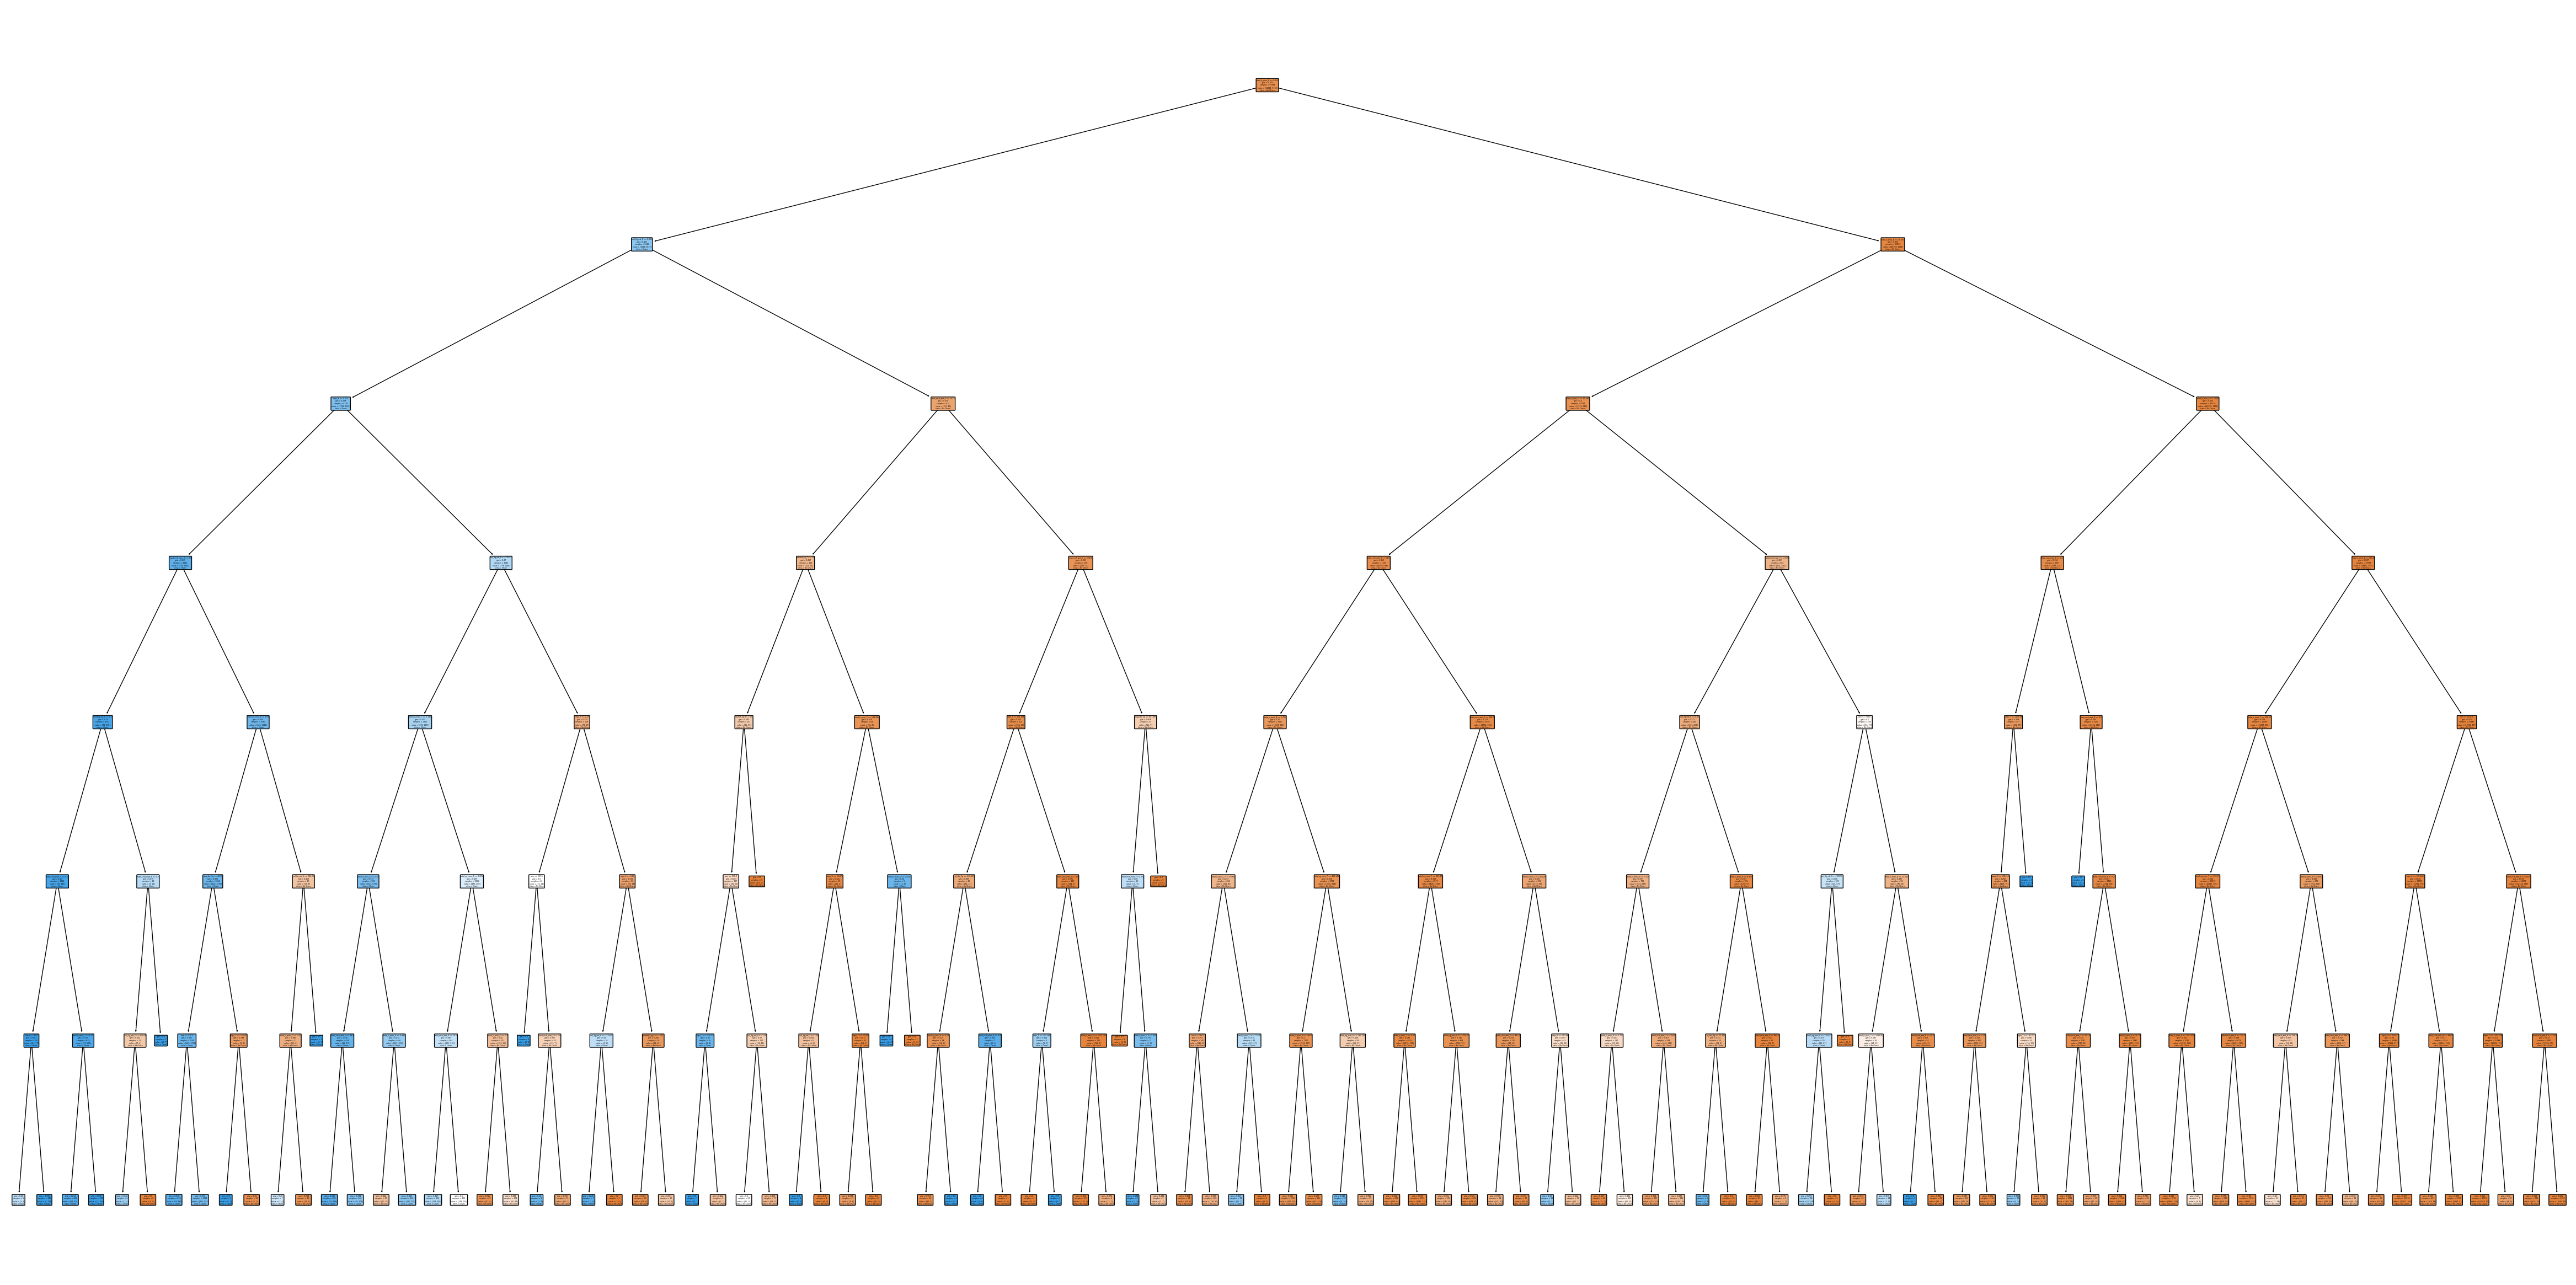

In [277]:
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X_train.columns,class_names=['No Churn', "Churn"],filled=True, rounded=True)

In [166]:
## Predicting results on train and test set

y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

In [180]:
## Calculating accuracy, precision and recall metrics

print('Accuracy score for train set :',accuracy_score(y_train,y_train_pred_dt))
print('Accuracy score for test set :',accuracy_score(y_test,y_test_pred_dt))
print(' ')
print("Classification Report for train set")
print(classification_report(y_train,y_train_pred_dt))
print(' ')
print("Classification Report for test set")
print(classification_report(y_test,y_test_pred_dt))

Accuracy score for train set : 0.9442847193699887
Accuracy score for test set : 0.9416428571428571
 
Classification Report for train set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     50289
           1       0.78      0.63      0.70      5710

    accuracy                           0.94     55999
   macro avg       0.87      0.81      0.83     55999
weighted avg       0.94      0.94      0.94     55999

 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     12578
           1       0.75      0.64      0.69      1422

    accuracy                           0.94     14000
   macro avg       0.86      0.81      0.83     14000
weighted avg       0.94      0.94      0.94     14000



In [283]:
## predicted score for provided test set
telecom_predict_dt = dt.predict(telecom_test_filtered1)

In [285]:
## Updating dataframe in required format
output_dt = pd.DataFrame({'id':telecom_test_ID,'churn_probability':telecom_predict_dt})

In [291]:
output_dt.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

In [293]:
## Creating submission csv file.
output_dt.to_csv('submission_initial_decisiontree_2.csv',index=False)

In [301]:
## Instanciating a decision tree object and creating a parameter grid. 
dt = DecisionTreeClassifier(random_state=42)

params = {
    'max_depth' : list(range(1,10)),
    'min_samples_leaf' : list(range(5,20)),
    'min_samples_split' : list(range(10,30)),
    'criterion' : ['gini','entropy']
    }

In [303]:
## Creating grid search object and fitting it on train set.
grid_search = GridSearchCV(estimator=dt,
                          param_grid=params,
                          cv = 4,
                          n_jobs=-1, verbose=1,
                          scoring='accuracy',
                          return_train_score=True)

In [305]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 5400 candidates, totalling 21600 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                              15, 16, 17, 18, 19],
                         'min_samples_split': [10, 11, 12, 13, 14, 15, 16, 17,
                                               18, 19, 20, 21, 22, 23, 24, 25,
                                               26, 27, 28, 29]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [307]:
grid_search.best_score_

0.9407132218627862

In [309]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 17,
 'min_samples_split': 10}

In [ ]:
## Best parameters obtained are:-
#'criterion': 'entropy',
#'max_depth': 5,
#'min_samples_leaf': 17,
#'min_samples_split': 10

In [182]:
## Creating decision tree on parameters obtained from grid search.
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=17, min_samples_split=10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=17,
                       min_samples_split=10)

[Text(0.48125, 0.9166666666666666, 'total_ic_mou_8 <= 0.07\nentropy = 0.475\nsamples = 55999\nvalue = [50289, 5710]\nclass = No Churn'),
 Text(0.22916666666666666, 0.75, 'arpu_8 <= 0.025\nentropy = 0.877\nsamples = 5150\nvalue = [1528, 3622]\nclass = Churn'),
 Text(0.125, 0.5833333333333334, 'total_rech_num_8 <= 0.5\nentropy = 0.633\nsamples = 2676\nvalue = [427, 2249]\nclass = Churn'),
 Text(0.06666666666666667, 0.4166666666666667, 'total_rech_num_7 <= 0.5\nentropy = 0.365\nsamples = 1032\nvalue = [72, 960]\nclass = Churn'),
 Text(0.03333333333333333, 0.25, 'aon <= 253.0\nentropy = 0.146\nsamples = 385\nvalue = [8, 377]\nclass = Churn'),
 Text(0.016666666666666666, 0.08333333333333333, 'entropy = 0.551\nsamples = 47\nvalue = [6, 41]\nclass = Churn'),
 Text(0.05, 0.08333333333333333, 'entropy = 0.052\nsamples = 338\nvalue = [2, 336]\nclass = Churn'),
 Text(0.1, 0.25, 'total_ic_mou_7 <= 67.5\nentropy = 0.466\nsamples = 647\nvalue = [64, 583]\nclass = Churn'),
 Text(0.08333333333333333, 

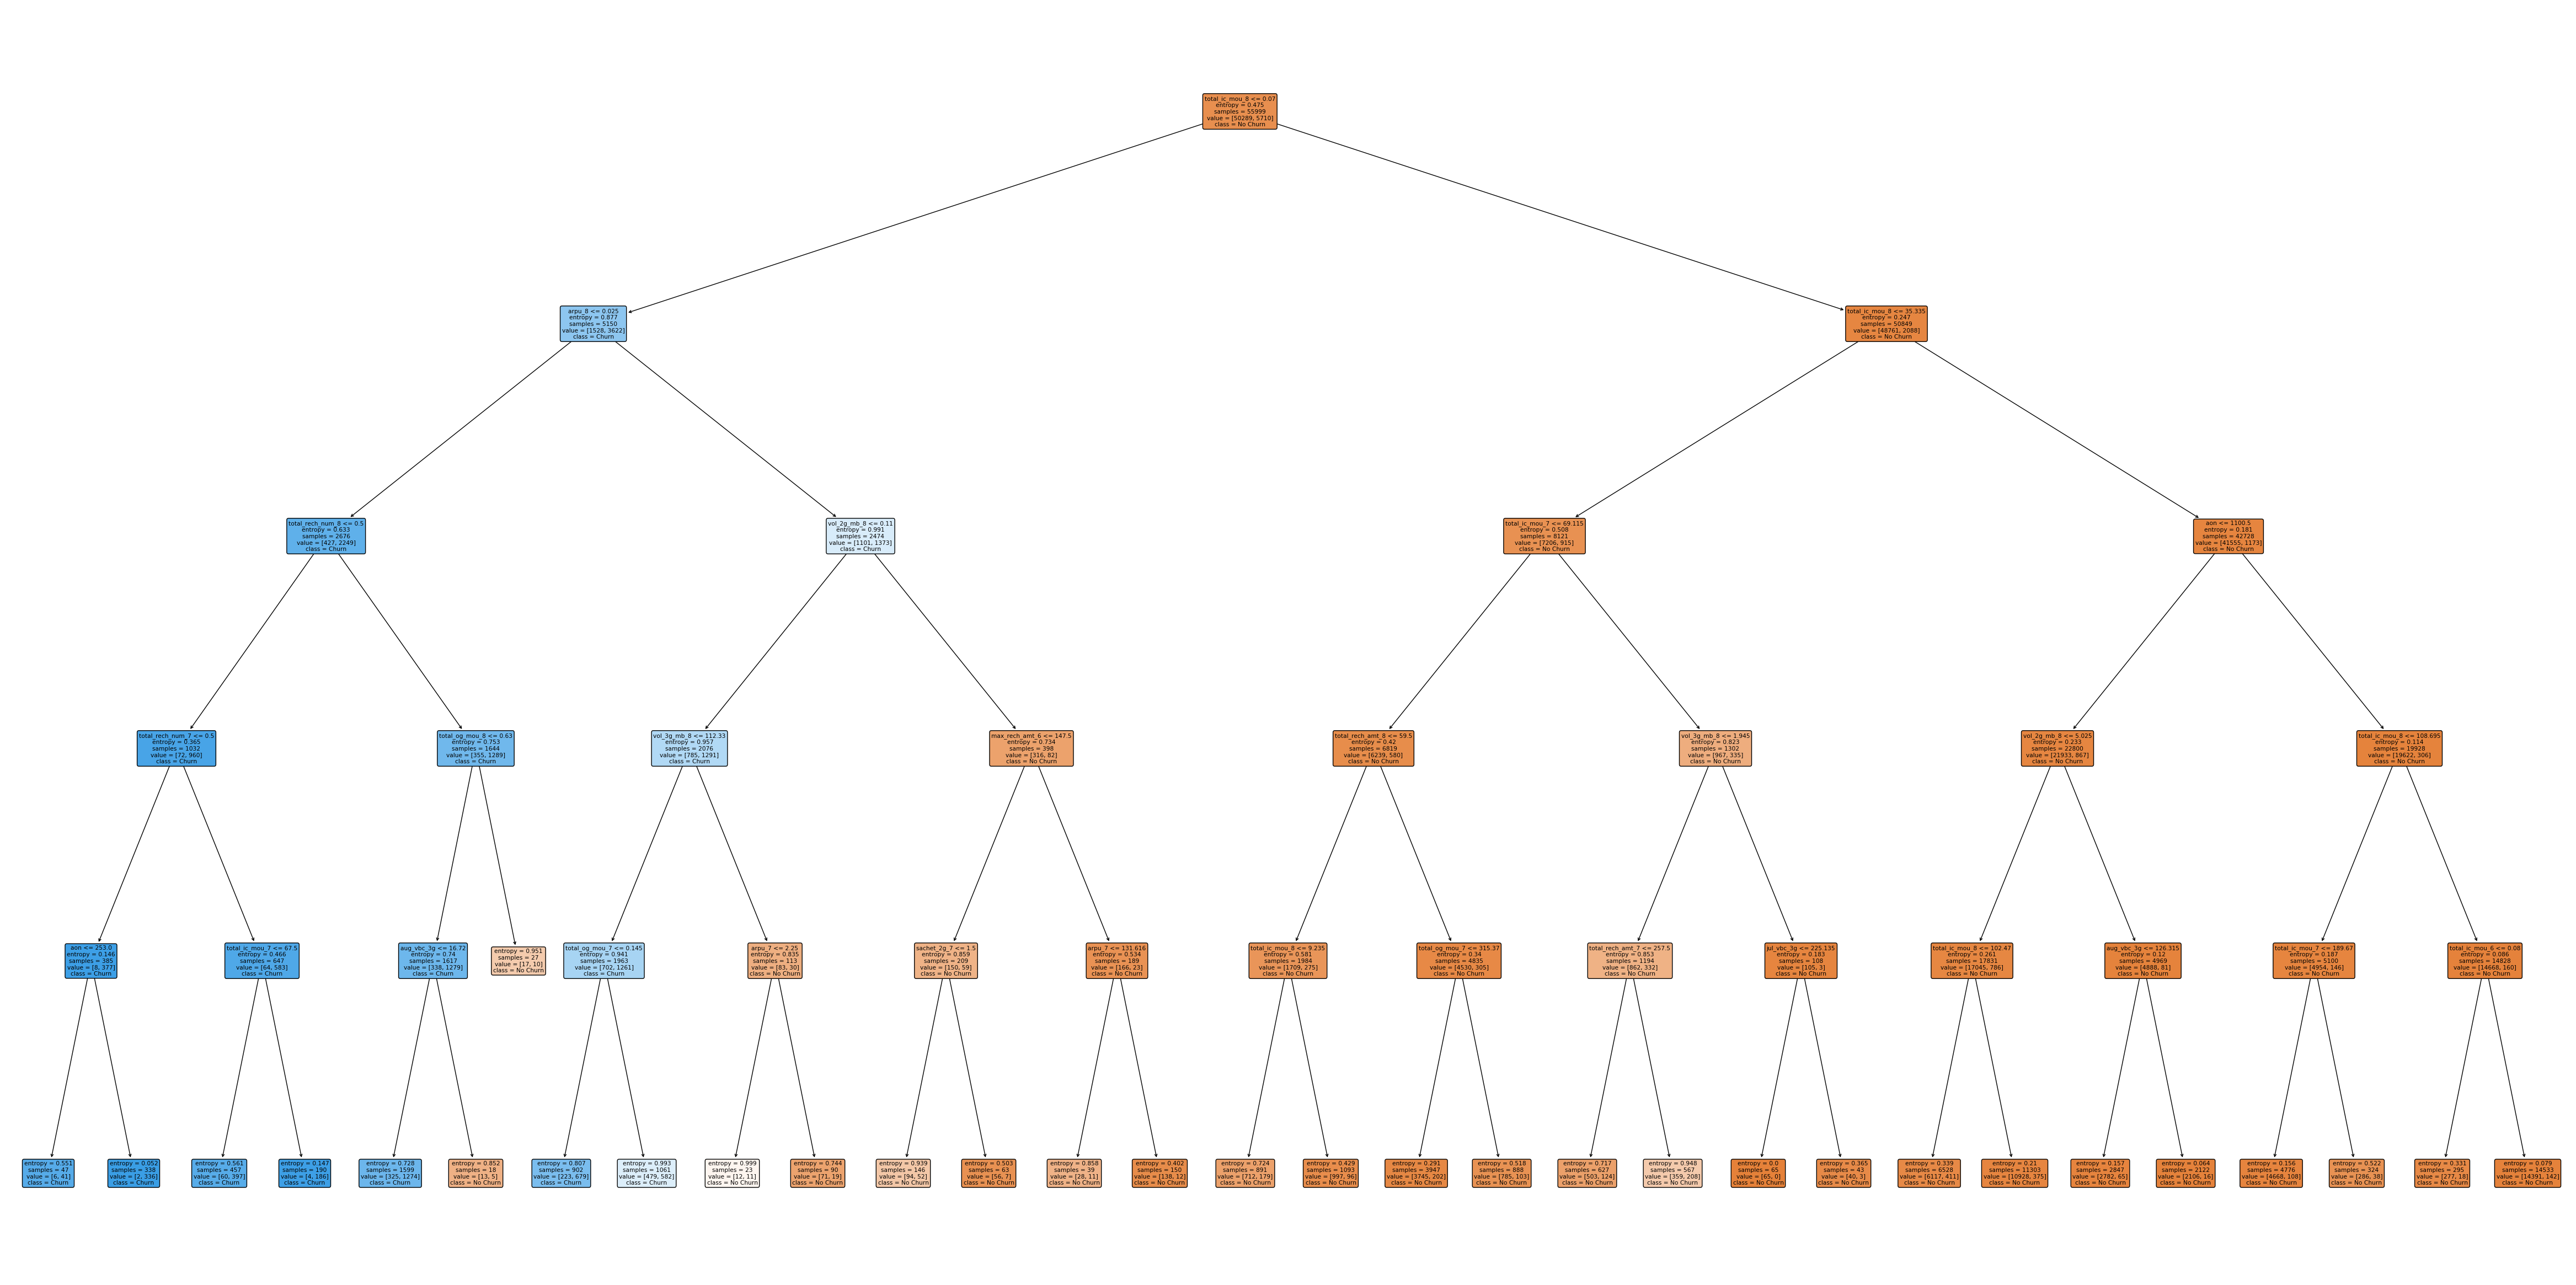

In [319]:
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X_train.columns,class_names=['No Churn', "Churn"],filled=True, rounded=True)

In [184]:
## Predicting results on train and test set based on new DT model.
y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

In [186]:
## Calculating accuracy, precision and recall metrics for best decision tree model.

print('Accuracy score for train set :',accuracy_score(y_train,y_train_pred_dt))
print('Accuracy score for test set :',accuracy_score(y_test,y_test_pred_dt))
print(' ')
print("Classification Report for train set")
print(classification_report(y_train,y_train_pred_dt))
print(' ')
print("Classification Report for test set")
print(classification_report(y_test,y_test_pred_dt))

Accuracy score for train set : 0.9408203717923534
Accuracy score for test set : 0.9419285714285714
 
Classification Report for train set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     50289
           1       0.76      0.61      0.68      5710

    accuracy                           0.94     55999
   macro avg       0.86      0.80      0.82     55999
weighted avg       0.94      0.94      0.94     55999

 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     12578
           1       0.76      0.63      0.69      1422

    accuracy                           0.94     14000
   macro avg       0.86      0.80      0.83     14000
weighted avg       0.94      0.94      0.94     14000



In [325]:
## Predicting on provided test data set

telecom_predict_dt = dt.predict(telecom_test_filtered1)
output_dt = pd.DataFrame({'id':telecom_test_ID,'churn_probability':telecom_predict_dt})
output_dt.to_csv('submission_initial_decisiontree_2.csv',index=False)

In [188]:
## Checking important features as per decision tree.
feature_importance_dt = pd.DataFrame({'Feature':X_train.columns,'Importance':dt.feature_importances_})

In [190]:
feature_importance_dt.sort_values(by='Importance', ascending=False).head(10)

Feature  Importance
8     total_ic_mou_8    0.872272
2             arpu_8    0.031196
7     total_ic_mou_7    0.021123
20       vol_2g_mb_8    0.020618
36               aon    0.014110
4     total_og_mou_7    0.008160
11  total_rech_num_8    0.006775
23       vol_3g_mb_8    0.006589
14  total_rech_amt_8    0.005776
13  total_rech_amt_7    0.002589

**Results from Decision Tree  Model:-**

- Here ***Total incoming minutes of usage for month of August*** has very high importance compared to other features with are significantly low.
- Feature importance in Decreasing order : ***Total incoming minutes of usage for month of August, average revenue per user for August, Total incoming minutes of usage for month of July, Volume of 2g usage for August, Age on network.***
- Best train metrics - Accuracy : 94.08%, Precision : 76%, Recall : 61%
- Best test metrics - Accuracy : 94.19%, Precision : 76%, Recall : 63%
- Score in Kaggle - 94.23%

#### RANDOM FOREST CLASSIFIER MODEL

In [201]:
## Creating an initina random forest classifier object.
rf = RandomForestClassifier(max_depth=3,random_state=42, n_jobs=-1)

In [203]:
#F Fitting train data on initial basic model model.
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=42)

In [205]:
## Predicting data for train and test set.
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [209]:
## Calculating accuracy, precision and recall metrics for initial random forest model.

print('Accuracy score for train set :',accuracy_score(y_train,y_train_pred_rf))
print('Accuracy score for test set :',accuracy_score(y_test,y_test_pred_rf))
print(' ')
print("Classification Report for train set")
print(classification_report(y_train,y_train_pred_rf))
print(' ')
print("Classification Report for test set")
print(classification_report(y_test,y_test_pred_rf))

Accuracy score for train set : 0.9354988481937178
Accuracy score for test set : 0.9362142857142857
 
Classification Report for train set
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     50289
           1       0.81      0.48      0.60      5710

    accuracy                           0.94     55999
   macro avg       0.88      0.73      0.78     55999
weighted avg       0.93      0.94      0.93     55999

 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     12578
           1       0.81      0.49      0.61      1422

    accuracy                           0.94     14000
   macro avg       0.88      0.74      0.79     14000
weighted avg       0.93      0.94      0.93     14000



In [377]:
## Performing hyperparameter tuning on random forest model using Grid search CV.

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': list(range(3,7)),
    'min_samples_leaf': [5,10,20,50],
    'min_samples_split':[2,3,4,5,7,8],
    'n_estimators': [10,20,30,40,50]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [379]:
## Fitting grid search object on train data.
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 480 candidates, totalling 1920 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [2, 3, 4, 5, 7, 8],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy', verbose=1)

In [373]:
## Checking for best estimators we got from cv

grid_search.best_estimator_

RandomForestClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=5,
                       n_estimators=40, n_jobs=-1, random_state=42)

In [375]:
#3 Checking best score from cv
grid_search.best_score_

0.9413560853836498

In [211]:
## Creating random forest model from tuned hyper parameters.

rf = RandomForestClassifier(max_depth=6, min_samples_leaf=10, n_estimators=40,random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=10, n_estimators=40,
                       n_jobs=-1, random_state=42)

In [213]:
## Predicting results on tuned model.

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [215]:
## Checking metrics for updated model.

print('Accuracy score for train set :',accuracy_score(y_train,y_train_pred_rf))
print('Accuracy score for test set :',accuracy_score(y_test,y_test_pred_rf))
print(' ')
print("Classification Report for train set")
print(classification_report(y_train,y_train_pred_rf))
print(' ')
print("Classification Report for test set")
print(classification_report(y_test,y_test_pred_rf))

Accuracy score for train set : 0.9419989642672191
Accuracy score for test set : 0.9432142857142857
 
Classification Report for train set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     50289
           1       0.78      0.59      0.68      5710

    accuracy                           0.94     55999
   macro avg       0.87      0.79      0.82     55999
weighted avg       0.94      0.94      0.94     55999

 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     12578
           1       0.78      0.62      0.69      1422

    accuracy                           0.94     14000
   macro avg       0.87      0.80      0.83     14000
weighted avg       0.94      0.94      0.94     14000



In [407]:
## Predicting results on given test test and converting it in required format to upload it in kaggle.

telecom_predict_rf = rf.predict(telecom_test_filtered1)
output_rf = pd.DataFrame({'id':telecom_test_ID,'churn_probability':telecom_predict_rf})
output_rf.to_csv('submission_Random_forest.csv',index=False)

In [217]:
feature_importance_rf = pd.DataFrame({'Feature':X_train.columns,'Importance':rf.feature_importances_})

In [219]:
feature_importance_rf.sort_values(by='Importance', ascending=False).head(10)

Feature  Importance
5     total_og_mou_8    0.313473
8     total_ic_mou_8    0.213610
17    max_rech_amt_8    0.084535
2             arpu_8    0.078353
4     total_og_mou_7    0.058186
7     total_ic_mou_7    0.046027
14  total_rech_amt_8    0.042381
11  total_rech_num_8    0.040463
20       vol_2g_mb_8    0.020635
23       vol_3g_mb_8    0.012671

**Results from Random Forest Model:-**

- Here ***Total Outgoing minutes of usage for month of August*** has highest importance followed by it ***Total Incomming minutes of usage for month of August*** has very high importance.
- Other features has very low weightage.
- Feature importance in Decreasing order : ***Total Outgoing minutes of usage for month of August, Total Incomming minutes of usage for month of August, Max recharge amount for August,  Average Revenue per user for August & Total Outgoing minutes of usage for month of July.***
- Best train metrics - Accuracy : 94.19%, Precision : 78%, Recall : 59%
- Best test metrics - Accuracy : 94.32%, Precision : 78%, Recall : 62%
- Score in Kaggle - 94.39%

#### PERFORMING PCA ON DATA

In [ ]:
## So far we have created models on original data without perfroming PCA for sake of interpretation.
## We will further perform PCA on scaled data to preserve information and improve accuracy.

In [224]:
## Reducing dimentionality keeping 95% of information using PCA.

pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_scaled)

In [226]:
## With PCA we were able to reduce dataset to 26 columns
X_train_pca.shape

(55999, 26)

In [228]:
## transforming test and provide test data as well.
X_test_pca = pca.transform(X_test_scaled)
Telecom_test_pca = pca.transform(telecom_test_scaled)

In [232]:
X_train_pca

array([[-1.56473355, -0.10809349, -0.89336793, ...,  0.30421324,
         1.9488874 ,  0.18044232],
       [-2.11650275, -0.25672617, -0.39255748, ...,  0.23894298,
         0.20799654,  0.02644906],
       [-2.96269086,  0.38686815, -0.27685139, ...,  0.09232746,
         0.10670483, -0.05274116],
       ...,
       [ 5.01098927, 10.29272218, -1.29856374, ...,  0.14909536,
        -0.19607772, -1.52753158],
       [ 3.13853515,  2.58577313,  1.55616247, ...,  0.24795475,
         0.25921644, -0.8218078 ],
       [-0.60487356,  0.09299415, -0.55778592, ...,  0.39092068,
         0.28618413, -0.1619512 ]])

In [234]:
X_test_pca

array([[ 4.82345569, -4.64844577,  0.75975641, ...,  0.1859819 ,
         0.42998389, -1.1319529 ],
       [ 6.20808858,  5.78906135,  4.71074915, ...,  0.66299411,
         0.12345474, -0.7298656 ],
       [ 3.39857822, -5.11734314,  2.14876849, ..., -0.2742189 ,
        -0.23792794,  0.80192196],
       ...,
       [ 5.63814426,  3.73956469, -0.32099831, ...,  0.75554672,
        -0.83411923, -0.23360044],
       [ 2.70870061,  2.86186185, -1.34883899, ..., -0.05339201,
        -0.49018325, -1.1676426 ],
       [-2.5240261 , -0.02821806,  0.12714302, ...,  0.13598856,
        -0.03524764, -0.03917124]])

#### XG BOOST CLASSIFIER MODEL.

In [242]:
## Creating basic XG Boost classifier without any hyper parameters.
xgb_cl = XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

In [244]:
## Training it on PCA train set
xgb_cl.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [246]:
## Predicting on train and test set
y_train_pred_xgb = xgb_cl.predict(X_train_pca)

In [248]:
y_test_pred_xgb = xgb_cl.predict(X_test_pca)

In [250]:
## Checking metrics for baisc XG Boost model.

print('Accuracy score for train set :',accuracy_score(y_train,y_train_pred_xgb))
print('Accuracy score for test set :',accuracy_score(y_test,y_test_pred_xgb))
print(' ')
print("Classification Report for train set")
print(classification_report(y_train,y_train_pred_xgb))
print(' ')
print("Classification Report for test set")
print(classification_report(y_test,y_test_pred_xgb))

Accuracy score for train set : 0.9632672012000214
Accuracy score for test set : 0.9182857142857143
 
Classification Report for train set
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     50289
           1       0.91      0.71      0.80      5710

    accuracy                           0.96     55999
   macro avg       0.94      0.85      0.89     55999
weighted avg       0.96      0.96      0.96     55999

 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     12578
           1       0.65      0.42      0.51      1422

    accuracy                           0.92     14000
   macro avg       0.79      0.70      0.73     14000
weighted avg       0.91      0.92      0.91     14000



In [ ]:
## From metrics we can see that train accuracy is little hugher than that of test accuracy

In [463]:
## Creating parameter grid for tuning hyper parameters

params = {
        'n_estimators' : [50,100, 200,300], 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
        'gamma': [0.1, 0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10]
        }

In [465]:
## Searching for best hyperparameters using grid search.

grid_search = GridSearchCV(estimator=xgb_cl,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 720 candidates, totalling 2880 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.1, 0.5, 1],
                         'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.25],
                         'max_depth': [3, 4, 5, 10],
                         'n_estimators': [50, 100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [467]:
## Checking best estimators
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [469]:
## Checking best score.
grid_search.best_score_

0.9191235470900982

In [254]:
xgb_cl = XGBClassifier(n_jobs = -1,objective = 'binary:logistic', learning_rate=0.05, n_estimators=300,max_depth=5 )

In [256]:
xgb_cl.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [258]:
y_train_pred_xgb = xgb_cl.predict(X_train_pca)
y_test_pred_xgb = xgb_cl.predict(X_test_pca)

In [260]:
## Checking metrics for tuned XG Boost model.

print('Accuracy score for train set :',accuracy_score(y_train,y_train_pred_xgb))
print('Accuracy score for test set :',accuracy_score(y_test,y_test_pred_xgb))
print(' ')
print("Classification Report for train set")
print(classification_report(y_train,y_train_pred_xgb))
print(' ')
print("Classification Report for test set")
print(classification_report(y_test,y_test_pred_xgb))

Accuracy score for train set : 0.9356417078876409
Accuracy score for test set : 0.9202857142857143
 
Classification Report for train set
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     50289
           1       0.78      0.51      0.62      5710

    accuracy                           0.94     55999
   macro avg       0.86      0.75      0.79     55999
weighted avg       0.93      0.94      0.93     55999

 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     12578
           1       0.67      0.42      0.52      1422

    accuracy                           0.92     14000
   macro avg       0.81      0.70      0.74     14000
weighted avg       0.91      0.92      0.91     14000



In [272]:
telecom_predict_xgb_pca = xgb_cl.predict(Telecom_test_pca)
output_xgb_pca = pd.DataFrame({'id':telecom_test_ID,'churn_probability':telecom_predict_xgb_pca})
output_xgb_pca.to_csv('submission_XGB_PCA.csv',index=False)

In [ ]:
## We created this model using data that we processed via PCA, lets try to train model once without PCA processed data.
## We got a lower accuracy score of ~ 92% compared to random forest model.

#### XG BOOST CLASSIFIER MODEL IN ORIGINAL DATA SET WITHOUT PCA.

In [276]:
## Creating a new XG Boost classifier with same hyper parameters.
xgb_cl_npca = XGBClassifier(n_jobs = -1,objective = 'binary:logistic', learning_rate=0.05, n_estimators=300,max_depth=5 )

In [282]:
## Fitting data this time on data we selected from RFE
xgb_cl_npca.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [284]:
## Predicting on train and test scaled set

y_train_pred_xgb_npca = xgb_cl_npca.predict(X_train_scaled)
y_test_pred_xgb_npca = xgb_cl_npca.predict(X_test_scaled)

In [286]:
## Calculating evaluation metrics

print('Accuracy score for train set :',accuracy_score(y_train,y_train_pred_xgb_npca))
print('Accuracy score for test set :',accuracy_score(y_test,y_test_pred_xgb_npca))
print(' ')
print("Classification Report for train set")
print(classification_report(y_train,y_train_pred_xgb_npca))
print(' ')
print("Classification Report for test set")
print(classification_report(y_test,y_test_pred_xgb_npca))

Accuracy score for train set : 0.9489633743459704
Accuracy score for test set : 0.9419285714285714
 
Classification Report for train set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     50289
           1       0.80      0.66      0.73      5710

    accuracy                           0.95     55999
   macro avg       0.88      0.82      0.85     55999
weighted avg       0.95      0.95      0.95     55999

 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     12578
           1       0.75      0.64      0.69      1422

    accuracy                           0.94     14000
   macro avg       0.86      0.81      0.83     14000
weighted avg       0.94      0.94      0.94     14000



In [525]:
Tuning hyper parameters again on scaled data instead of PCA data.

params = {
        'n_estimators' : [50,100, 200,300], 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
        'gamma': [0.1, 0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10]
        }

grid_search = GridSearchCV(estimator=xgb_cl,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 720 candidates, totalling 2880 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.1, 0.5, 1],
                         'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.25],
                         'max_depth': [3, 4, 5, 10],
                         'n_estimators': [50, 100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [537]:
## Checking best estimator and parameters
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [529]:
grid_search.best_params_

{'gamma': 0.1,
 'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 300,
 'subsample': 0.6}

In [533]:
## Checking best score
grid_search.best_score_

0.9418204004367658

In [288]:
## Creating model on scaled data without PCA on tuned hyper parameters.

xgb_cl_npca = XGBClassifier(n_jobs = -1,objective = 'binary:logistic', gamma=0.1,learning_rate=0.01, max_depth=4, n_estimators= 300,subsample= 0.6  )
xgb_cl_npca.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [290]:
## Predicting results on train and test set.

y_train_pred_xgb_npca = xgb_cl_npca.predict(X_train_scaled)
y_test_pred_xgb_npca = xgb_cl_npca.predict(X_test_scaled)

In [292]:
## Checking accuracy score for new model with tuned hyperparameters and scaled data only.

print('Accuracy score for train set :',accuracy_score(y_train,y_train_pred_xgb_npca))
print('Accuracy score for test set :',accuracy_score(y_test,y_test_pred_xgb_npca))
print(' ')
print("Classification Report for train set")
print(classification_report(y_train,y_train_pred_xgb_npca))
print(' ')
print("Classification Report for test set")
print(classification_report(y_test,y_test_pred_xgb_npca))

Accuracy score for train set : 0.9425525455811711
Accuracy score for test set : 0.943
 
Classification Report for train set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     50289
           1       0.78      0.61      0.68      5710

    accuracy                           0.94     55999
   macro avg       0.87      0.79      0.83     55999
weighted avg       0.94      0.94      0.94     55999

 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     12578
           1       0.77      0.63      0.69      1422

    accuracy                           0.94     14000
   macro avg       0.86      0.80      0.83     14000
weighted avg       0.94      0.94      0.94     14000



In [296]:
telecom_predict_xgb_npca = xgb_cl_npca.predict(telecom_test_scaled)
output_xgb_npca = pd.DataFrame({'id':telecom_test_ID,'churn_probability':telecom_predict_xgb_npca})
output_xgb_npca.to_csv('submission_xgb_npca.csv',index=False)

**Results from XGBoost Model:-**

- We saw that when we used PCA data on XGBoost we were gettng lower accuracy compared to when we used scaled data only.
- We got a good train and test accuracy on scaled data very close to that of random forest model.
- Best train metrics - Accuracy : 94.25%, Precision : 78%, Recall : 61%
- Best test metrics - Accuracy : 94.3%, Precision : 77%, Recall : 63%
- Score in Kaggle - 94.38%

#### ADABOOST CLASSIFIER ON PCA DATA.

In [308]:
## creating a ada boost classifier model
abc = AdaBoostClassifier(n_estimators=200, random_state=42)
abc.fit(X_train_pca, y_train)

AdaBoostClassifier(n_estimators=200, random_state=42)

In [310]:
## Training results in train and test set
y_train_pred_abc = abc.predict(X_train_pca)
y_test_pred_abc = abc.predict(X_test_pca)

In [312]:
## Checking metrics for model.

print('Accuracy score for train set :',accuracy_score(y_train,y_train_pred_abc))
print('Accuracy score for test set :',accuracy_score(y_test,y_test_pred_abc))
print(' ')
print("Classification Report for train set")
print(classification_report(y_train,y_train_pred_abc))
print(' ')
print("Classification Report for test set")
print(classification_report(y_test,y_test_pred_abc))

Accuracy score for train set : 0.9140163217200307
Accuracy score for test set : 0.9122857142857143
 
Classification Report for train set
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     50289
           1       0.65      0.34      0.44      5710

    accuracy                           0.91     55999
   macro avg       0.79      0.66      0.70     55999
weighted avg       0.90      0.91      0.90     55999

 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     12578
           1       0.63      0.32      0.43      1422

    accuracy                           0.91     14000
   macro avg       0.78      0.65      0.69     14000
weighted avg       0.90      0.91      0.90     14000



In [314]:
## creating a model for just scaled data without PCA to check which data might give higher accuracy.
abc.fit(X_train_scaled, y_train)

AdaBoostClassifier(n_estimators=200, random_state=42)

In [318]:
## predicting train and test sets
y_train_pred_abc_npca = abc.predict(X_train_scaled)
y_test_pred_abc_npca = abc.predict(X_test_scaled)

In [320]:
## Checking metrics for model.

print('Accuracy score for train set :',accuracy_score(y_train,y_train_pred_abc_npca))
print('Accuracy score for test set :',accuracy_score(y_test,y_test_pred_abc_npca))
print(' ')
print("Classification Report for train set")
print(classification_report(y_train,y_train_pred_abc_npca))
print(' ')
print("Classification Report for test set")
print(classification_report(y_test,y_test_pred_abc_npca))

Accuracy score for train set : 0.9392667726209396
Accuracy score for test set : 0.9390714285714286
 
Classification Report for train set
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     50289
           1       0.76      0.59      0.67      5710

    accuracy                           0.94     55999
   macro avg       0.86      0.79      0.82     55999
weighted avg       0.93      0.94      0.94     55999

 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     12578
           1       0.75      0.61      0.67      1422

    accuracy                           0.94     14000
   macro avg       0.85      0.79      0.82     14000
weighted avg       0.94      0.94      0.94     14000



In [326]:
## Since adaptive boost is computatinally expensive and it is giving us better performance on scaled data than on PCA.
## Hence we are only tuning hyperparameters on scaled data and not on PCA one.

abc = AdaBoostClassifier(random_state=42)
params = {
        'n_estimators' : [50,100,150,200], 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25]
        }
grid_search = GridSearchCV(estimator=abc,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


GridSearchCV(cv=4, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.25],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [328]:
## hecking best estimators from grid search
gridc_search.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=150, random_state=42)

In [330]:
Checking best parameters
grid_search.best_score_

0.9397489272192912

In [332]:
## Training tuned model on train data set
abc = AdaBoostClassifier(n_estimators=150,learning_rate=0.1, random_state=42)
abc.fit(X_train_scaled, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=150, random_state=42)

In [334]:
## Predicting results
y_train_pred_abc_npca = abc.predict(X_train_scaled)
y_test_pred_abc_npca = abc.predict(X_test_scaled)

In [336]:
## Checking metrics for tuned model.

print('Accuracy score for train set :',accuracy_score(y_train,y_train_pred_abc_npca))
print('Accuracy score for test set :',accuracy_score(y_test,y_test_pred_abc_npca))
print(' ')
print("Classification Report for train set")
print(classification_report(y_train,y_train_pred_abc_npca))
print(' ')
print("Classification Report for test set")
print(classification_report(y_test,y_test_pred_abc_npca))

Accuracy score for train set : 0.939784639011411
Accuracy score for test set : 0.9410714285714286
 
Classification Report for train set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     50289
           1       0.76      0.60      0.67      5710

    accuracy                           0.94     55999
   macro avg       0.86      0.79      0.82     55999
weighted avg       0.94      0.94      0.94     55999

 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     12578
           1       0.76      0.61      0.68      1422

    accuracy                           0.94     14000
   macro avg       0.86      0.80      0.82     14000
weighted avg       0.94      0.94      0.94     14000



In [344]:
telecom_predict_abc_npca = abc.predict(telecom_test_scaled)
output_abc_npca = pd.DataFrame({'id':telecom_test_ID,'churn_probability':telecom_predict_abc_npca})
output_abc_npca.to_csv('submission_abc_npca.csv',index=False)

**Results from ADABoost Model:-**

- From adaboost we got better accuracy from scaled data than from PCA processed data
- Best train metrics - Accuracy : 93.97%, Precision : 76%, Recall : 60%
- Best test metrics - Accuracy : 94.10%, Precision : 76%, Recall : 61%
- Score in Kaggle - 94.19%

### FINAL RESULTS AND SUGGESTION:

***Results***

- We got best accuracy score and metrics from Random Forest model where we only used cleaned data.
> We got accuracy of 94.19% and 94.32% for train set and test set respectively, also best kaggle score of 94.39%.

- We got an accuracy score of 90.07% using starter notebook, below are the best scores acheived using different models and their hyperparameter tuning.

  | Model name        | Train accuracy | Test accuracy | Kaggle accuracy |
  |:-----------------:|:--------------:|:-------------:|:---------------:|
  |Logistic Regression|92.04 | 91.31|91.32|
  |Decision Tree|94.08|94.19|94.03|
  |Random Forest|94.19|94.32|94.39|
  |XG Boost|94.25|94.3|94.38|
  |Ada Boost|93.97|94.10|94.19|

***Suggestions***

- From EDA we saw that factors like *average revenue per user, total incomming and out-going calls and recharge amount* decreases on monthly basis for users who churned, telecom provider should analyse decrease in two- three of these factors and provide special offers/ better customer service to these kind of customers. This can help in mitigating customer to churn.
- Collectively from feature importance of predictive models we can say that * Total incomming minutes of usage* is most important feature in determining churn, and as per logistic resression it is inversly proportional to churn. This means if incomming minutes of usage for august are decreasing user are more like to get churned.
- telecom company should monitor id total incomming minutes of usage for customer is decreasing on monthly basis they should sned them some special offers immediately and if possible ask a customer representative for asking their reviews and how their experience can be improved.
- Also telecom providers should keep and eye on number of recharges and max amount of recharges if they are decreasing on monthly basis, these type of customers should be provided with some special benefits that can improve their experience.